In [1]:
import pandas as pd
#data=pd.read_csv(filepath_or_buffer=r'C:/Users/Abhishek/Downloads/gdsc_2_public-master/global_data_science_challenge_2_public-master/data/gdsc2_public.csv',sep=';')
data=pd.read_csv(filepath_or_buffer=r'C:/Users/Abhishek/Downloads/testing.csv')
data.head()

timestamp  work_item work_type work_priority    domain  platform  \
0  02-01-2015 14:39  WI_000001  WT_00001      WP_00003  BD_00001  PL_00001   
1  02-01-2015 15:04  WI_000002  WT_00002      WP_00004  BD_00002  PL_00002   
2  02-01-2015 15:28  WI_000003  WT_00002      WP_00004  BD_00002  PL_00002   
3  02-01-2015 15:33  WI_000004  WT_00002      WP_00004  BD_00002  PL_00002   
4  02-01-2015 16:32  WI_000005  WT_00002      WP_00003  BD_00003  PL_00003   

          components from_phase to_phase from_resource to_resource  
0                NaN        NaN  Analyze           NaN    ER_00043  
1  CO_00037/CO_00071        NaN  Analyze           NaN    ER_00225  
2  CO_00037/CO_00071        NaN  Analyze           NaN    ER_00225  
3  CO_00037/CO_00071        NaN  Analyze           NaN    ER_00225  
4           CO_00113        NaN  Analyze           NaN    ER_00206

In [2]:
import numpy as np
seed = 7
np.random.seed(seed)

In [3]:
len(data)

71957

In [4]:
data['timestamp']=pd.to_datetime(data['timestamp'],format='%d-%m-%y %H:%M:%S',infer_datetime_format=True,dayfirst =True)

data['year']=data.timestamp.dt.year
data['quater']=data.timestamp.dt.quarter
data['month']=data.timestamp.dt.month
data['day']=data.timestamp.dt.day
data['dayofweek']=data.timestamp.dt.dayofweek
data['dayofyear']=data.timestamp.dt.dayofyear
data['hour']=data.timestamp.dt.hour
data['minute']=data.timestamp.dt.minute
data['second']=data.timestamp.dt.second

data['is_leap_year']=data.timestamp.dt.is_leap_year
data['is_month_end']=data.timestamp.dt.is_month_end
data['is_month_start']=data.timestamp.dt.is_month_start
data['is_year_end']=data.timestamp.dt.is_year_end
data['is_year_start']=data.timestamp.dt.is_year_start
data['is_quater_end']=data.timestamp.dt.is_quarter_end
data['is_quarter_start']=data.timestamp.dt.is_quarter_start

data['week']=data.timestamp.dt.week
data['weekday']=data.timestamp.dt.weekday
data['weekofyear']=data.timestamp.dt.weekofyear


data["is_leap_year"] = data["is_leap_year"].astype('category')
data["is_month_end"] = data["is_month_end"].astype('category')
data["is_month_start"] = data["is_month_start"].astype('category')
data["is_year_end"] = data["is_year_end"].astype('category')
data["is_year_start"] = data["is_year_start"].astype('category')
data["is_quater_end"] = data["is_quater_end"].astype('category')
data["is_quarter_start"] = data["is_quarter_start"].astype('category')

data["is_leap_year_cat"] = data["is_leap_year"].cat.codes
data["is_month_end_cat"] = data["is_month_end"].cat.codes
data["is_month_start_cat"] = data["is_month_start"].cat.codes
data["is_month_end_cat"] = data["is_month_end"].cat.codes
data["is_year_end_cat"] = data["is_year_end"].cat.codes
data["is_year_start_cat"] = data["is_year_start"].cat.codes
data["is_quater_end_cat"] = data["is_quater_end"].cat.codes
data["is_quarter_start_cat"] = data["is_quarter_start"].cat.codes

#data.head()

In [5]:
from sklearn import preprocessing

In [6]:
import numpy as np
#print(len(data.work_item.unique()))
wi_le=preprocessing.LabelEncoder()
wi=data.work_item.unique()
wi_le=wi_le.fit(wi)
data['wi_le']=wi_le.transform(data.work_item)

#print(len(data.work_type.unique()))
wt_le=preprocessing.LabelEncoder()
wt=data.work_type.unique()
wt_le=wt_le.fit(wt)
data.work_type=wt_le.transform(data.work_type)

#print(len(data.work_priority.unique()))
wp_oe=preprocessing.LabelEncoder()
wp=data.work_priority.unique()
wp_le=wi_le.fit(wp)
data.work_priority=wp_le.transform(data.work_priority)

#print(len(data.domain.unique()))
domain_le=preprocessing.LabelEncoder()
domain=data.domain.unique()
domain_le=domain_le.fit(domain)
data.domain=domain_le.transform(data.domain)

#print(len(data.platform.unique()))
platform_le=preprocessing.LabelEncoder()
platform=data.platform.unique()
platform_le=platform_le.fit(platform)
data.platform=platform_le.transform(data.platform)

#print(len(data.components.unique()))
components_le=preprocessing.LabelEncoder()
components=data.components.unique()
#components_le=components_le.fit(components.astype(str))
data.components=components_le.fit_transform(data.components.astype(str))

In [7]:
#data.head(5)
data = data.sort_values(by=['work_item', 'timestamp']) # To make sure our entries are ordered
data.head()

timestamp  work_item  work_type  work_priority  domain  \
0   2015-01-02 14:39:00  WI_000001          0              2       0   
24  2015-01-05 11:48:00  WI_000001          0              2       0   
29  2015-01-05 12:35:00  WI_000001          0              2       0   
140 2015-01-07 11:04:00  WI_000001          0              2       0   
145 2015-01-07 14:04:00  WI_000001          0              2       0   

     platform  components from_phase to_phase from_resource  ... weekday  \
0           0         315        NaN  Analyze           NaN  ...       4   
24          0         315    Analyze   Design      ER_00043  ...       0   
29          0         315     Design  Analyze      ER_00149  ...       0   
140         0         315    Analyze   Design      ER_00149  ...       2   
145         0         315     Design  Analyze      ER_00043  ...       2   

     weekofyear  is_leap_year_cat  is_month_end_cat  is_month_start_cat  \
0             1                 0                 0                   0   
24            2                 0                 0                   0   
29            2                 0                 0                   0   
140           2                 0                 0                   0   
145           2                 0                 0                   0   

     is_year_end_cat  is_year_start_cat  is_quater_end_cat  \
0                  0                  0                  0   
24                 0                  0                  0   
29                 0                  0                  0   
140                0                  0                  0   
145                0                  0                  0   

     is_quarter_start_cat  wi_le  
0                       0      0  
24                      0      0  
29                      0      0  
140                     0      0  
145                     0      0  

[5 rows x 38 columns]

In [8]:
#data.work_type=data.work_type.astype('category')
#data.work_priority=data.work_priority.astype('category')
#data.domain=data.domain.astype('category')
#data.platform=data.platform.astype('category')
#data.components=data.components.astype('category')
#data.dtypes

In [9]:

def compute_work_item_times(df):
    """
    Takes a DataFrame with the ticket data and computes the start time, end time,  duration and the
    duration_in_hours.
    :param df: As described above
    :return: As described above
    """
    # We can't be sure that NAs were already renamed. Do it again just to be sure.
    df.from_phase.fillna('Start', inplace=True)
    df.to_phase.fillna('End', inplace=True)
    
    exclude=['is_leap_year','is_month_end','from_phase','to_phase','from_resource','to_resource',
            'is_month_start','is_year_end','is_year_start','is_quater_end','is_quarter_start']
    relevant_columns = [i for i in data.columns if i not in exclude]
    start_times = df[df.from_phase == 'Start'][relevant_columns]
    end_times = df[df.to_phase == 'End'][relevant_columns]
    times = pd.merge(start_times, end_times, on='work_item', how='left')
    times.rename(columns={'timestamp_x': 'start', 'timestamp_y': 'end','work_type_x':'work_type',
                          'work_priority_x':'work_priority', 'domain_x':'domain','platform_x':'platform', 
                          'components_x':'components', 'year_x':'year', 'month_x':'month', 'day_x':'day',
                          'dayofweek_x':'dayofweek', 'dayofyear_x':'dayofyear', 'hour_x':'hour', 'minute_x':'minute', 
                          'second_x':'second','week_x':'week', 'weekday_x':'weekday', 'weekofyear_x':'weekofyear',
                          'is_leap_year_cat_x':'is_leap_year','is_month_end_cat_x':'is_month_end',
                         'components_x':'components','quater_x':'quater',
                         
                          'is_month_start_cat_x':'is_month_start', 'is_year_end_cat_x':'is_year_end', 
                          'is_year_start_cat_x':'is_year_start','is_quater_end_cat_x':'is_quater_end',
                            'is_quarter_start_cat_x':'is_quarter_start', 'wi_le_x':'wi_le'}, inplace=True)
    times['duration'] = pd.to_datetime(times['end'],format='%d-%m-%y %H:%M',infer_datetime_format=True,dayfirst =True) - pd.to_datetime(times['start'],format='%d-%m-%y %H:%M',infer_datetime_format=True,dayfirst =True)
    times['duration_in_days'] = times['duration'].apply(lambda x: round(x.total_seconds() / (24*3600), 2))
    cols=['work_type_y', 'work_priority_y',
       'domain_y', 'platform_y', 'year_y', 'month_y', 'day_y',
       'dayofweek_y', 'dayofyear_y', 'hour_y', 'minute_y', 'second_y',
       'week_y', 'weekday_y', 'weekofyear_y', 'is_leap_year_cat_y',
       'is_month_end_cat_y','duration','components_y', 'quater_y',
       'is_month_start_cat_y','is_year_end_cat_y', 'is_year_start_cat_y', 'is_quater_end_cat_y',
       'is_quarter_start_cat_y', 'wi_le_y']
    #times['duration'] = times['end'] - times['start']
    #times['duration_in_days'] = times['duration'].apply(lambda x: round(x.total_seconds() / (24*3600), 2))
    return times.drop(columns=cols,axis=1)


In [10]:
df=compute_work_item_times(data)

In [11]:
df.columns

Index(['start', 'work_item', 'work_type', 'work_priority', 'domain',
       'platform', 'components', 'year', 'quater', 'month', 'day', 'dayofweek',
       'dayofyear', 'hour', 'minute', 'second', 'week', 'weekday',
       'weekofyear', 'is_leap_year', 'is_month_end', 'is_month_start',
       'is_year_end', 'is_year_start', 'is_quater_end', 'is_quarter_start',
       'wi_le', 'end', 'duration_in_days'],
      dtype='object')

In [12]:
sep_date_str = '01.01.2018'
#tr,te,cl,op=split_times(df1,sep_date_str)

In [13]:
is_open = pd.isnull(df.duration_in_days)
times_open = df[is_open]  
times_closed = df[~is_open]  # The ~ operator negates a boolean mask
times_closed.head(2)

start  work_item  work_type  work_priority  domain  platform  \
0 2015-01-02 14:39:00  WI_000001          0              2       0         0   
1 2015-01-02 15:04:00  WI_000002          1              3       1         1   

   components  year  quater  month  ...  is_leap_year  is_month_end  \
0         315  2015       1      1  ...             0             0   
1          65  2015       1      1  ...             0             0   

   is_month_start  is_year_end  is_year_start  is_quater_end  \
0               0            0              0              0   
1               0            0              0              0   

   is_quarter_start  wi_le                 end  duration_in_days  
0                 0      0 2015-01-27 11:36:00             24.87  
1                 0      1 2015-01-14 09:46:00             11.78  

[2 rows x 29 columns]

In [14]:
sep_dt=pd.to_datetime(sep_date_str,format='%d.%m.%Y',infer_datetime_format=True,dayfirst =True)
train=times_closed[pd.to_datetime(times_closed.end,format='%d.%m.%Y',infer_datetime_format=True,dayfirst =True) <= sep_dt]
test = times_closed[(pd.to_datetime(times_closed.end,format='%d.%m.%Y',infer_datetime_format=True,dayfirst =True) > sep_dt) & (pd.to_datetime(times_closed.start,format='%d.%m.%Y',infer_datetime_format=True,dayfirst =True) <= sep_dt)]

In [15]:
print(len(train),len(test))

9290 548


In [16]:
train.head(5)

start  work_item  work_type  work_priority  domain  platform  \
0 2015-01-02 14:39:00  WI_000001          0              2       0         0   
1 2015-01-02 15:04:00  WI_000002          1              3       1         1   
2 2015-01-02 15:28:00  WI_000003          1              3       1         1   
3 2015-01-02 15:33:00  WI_000004          1              3       1         1   
4 2015-01-02 16:32:00  WI_000005          1              2       2         2   

   components  year  quater  month  ...  is_leap_year  is_month_end  \
0         315  2015       1      1  ...             0             0   
1          65  2015       1      1  ...             0             0   
2          65  2015       1      1  ...             0             0   
3          65  2015       1      1  ...             0             0   
4         205  2015       1      1  ...             0             0   

   is_month_start  is_year_end  is_year_start  is_quater_end  \
0               0            0              0              0   
1               0            0              0              0   
2               0            0              0              0   
3               0            0              0              0   
4               0            0              0              0   

   is_quarter_start  wi_le                 end  duration_in_days  
0                 0      0 2015-01-27 11:36:00             24.87  
1                 0      1 2015-01-14 09:46:00             11.78  
2                 0      2 2015-02-26 11:50:00             54.85  
3                 0      3 2015-01-28 09:11:00             25.73  
4                 0      4 2015-02-04 12:57:00             32.85  

[5 rows x 29 columns]

In [17]:
import numpy as np
train['duration_lop1p'] = np.log(train.duration_in_days+1)
train.head(5)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


start  work_item  work_type  work_priority  domain  platform  \
0 2015-01-02 14:39:00  WI_000001          0              2       0         0   
1 2015-01-02 15:04:00  WI_000002          1              3       1         1   
2 2015-01-02 15:28:00  WI_000003          1              3       1         1   
3 2015-01-02 15:33:00  WI_000004          1              3       1         1   
4 2015-01-02 16:32:00  WI_000005          1              2       2         2   

   components  year  quater  month  ...  is_month_end  is_month_start  \
0         315  2015       1      1  ...             0               0   
1          65  2015       1      1  ...             0               0   
2          65  2015       1      1  ...             0               0   
3          65  2015       1      1  ...             0               0   
4         205  2015       1      1  ...             0               0   

   is_year_end  is_year_start  is_quater_end  is_quarter_start  wi_le  \
0            0              0              0                 0      0   
1            0              0              0                 0      1   
2            0              0              0                 0      2   
3            0              0              0                 0      3   
4            0              0              0                 0      4   

                  end  duration_in_days  duration_lop1p  
0 2015-01-27 11:36:00             24.87        3.253084  
1 2015-01-14 09:46:00             11.78        2.547881  
2 2015-02-26 11:50:00             54.85        4.022670  
3 2015-01-28 09:11:00             25.73        3.285787  
4 2015-02-04 12:57:00             32.85        3.521939  

[5 rows x 30 columns]

In [18]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m,X_train,y_train,X_val,y_val):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)
          ]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [19]:
cols=[ 'work_type', 'work_priority', 'domain',
       'platform', 'components', 'year', 'quater', 'month', 'day', 'dayofweek',
       'dayofyear', 'hour', 'minute', 'second', 'week', 'weekday',
       'weekofyear', 'is_leap_year', 'is_month_end', 'is_month_start',
       'is_year_end', 'is_year_start', 'is_quater_end', 'is_quarter_start',
       'wi_le']
x=train[cols]
y=train['duration_lop1p']

In [20]:
import xgboost

In [21]:
base_model=xgboost.XGBRegressor(seed=11)
base_model.fit(x,y)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=11, silent=True, subsample=1)

In [22]:
base_model.score(x,y)

0.2754264352235588

In [23]:
%matplotlib inline

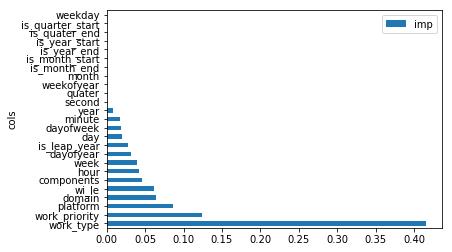

In [24]:
fi=pd.DataFrame(data=x.columns,columns=['cols'])
fi['imp']=base_model.feature_importances_

fi.sort_values(by='imp',ascending=False).plot(x='cols',y='imp',kind='barh',sort_columns='imp')

In [25]:
test['duration_lop1p'] = np.log(test.duration_in_days+1)
x_te=test[cols]
y_te=test['duration_lop1p']
base_model.score(x_te,y_te)

predictions=base_model.predict(x_te)
predictions = np.clip(predictions, y.min(), y.max())
res=rmse(predictions,test.duration_lop1p)
print(res,base_model.score(x_te,y_te))
#predictions

2.4665871953813188 -5.51829301501317


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
print_score(base_model,x,y,test[cols],test['duration_lop1p'])
#base_pred=np.clip(base_model.predict(test[cols]), y.min(), y.max())
res=rmse(np.clip(base_model.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)
print(res)

[1.373720450448181, 2.4665871953813188, 0.2754264352235588, -5.51829301501317]
2.4665871953813188


In [26]:
#fi.sort_values(by='imp',ascending=False)

In [27]:
#test

In [26]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np

def objective(space):
    #print(space)
    clf = xgb.XGBRegressor(n_estimators =space['n_estimators'],colsample_bytree=space['colsample_bytree'],
                           learning_rate = space['learning_rate'],
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                           n_jobs=-1,objective='reg:linear',silent=1,num_round = space['num_round'],
                           booster = space['booster'],grow_policy = space['grow_policy'],#max_leaves = space['max_leaves'],
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'],
                          reg_alpha = space['reg_alpha'],)

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={'learning_rate':hp.uniform ('learning_rate', 0.001, 0.9),
        'max_depth':hp.uniform ('max_depth', 1, 100),
        'min_child_weight':hp.quniform ('min_child', 1, 10, 1),
        'subsample':hp.uniform ('subsample', 0.1, 1),
        'gamma':hp.uniform ('gamma', 0.1,1),
        'colsample_bytree':hp.uniform ('colsample_bytree', 0.1,1),
        'reg_lambda':hp.uniform ('reg_lambda', 0.1,1),
        'reg_alpha':hp.uniform ('reg_alpha', 0.1,1),
        'booster':hp.choice('booster',['dart', 'gbtree']),
        'grow_policy':hp.choice('grow_policy',['depthwise', 'lossguide']),
        #'max_leaves':hp.uniform ('max_leaves', np.arange(1,250,dtype=int)),
        'num_round':hp.uniform ('num_round', 1,100),
        'n_estimators':hp.choice('n_estimators',np.arange(1,500,dtype=int))
        #'n_estimators':hp.choice('n_estimators', np.arange(1,500,dtype=int)
}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials)

print (best)

  0%|                                                                           | 0/1000 [00:00<?, ?it/s, best loss: ?]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  0%|                                                   | 1/1000 [00:01<22:16,  1.34s/it, best loss: 2.570036850026638]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  0%|                                                   | 2/1000 [00:02<19:32,  1.17s/it, best loss: 2.570036850026638]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  0%|▏                                                  | 3/1000 [00:03<21:05,  1.27s/it, best loss: 2.570036850026638]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  0%|▏                                                  | 4/1000 [00:03<15:44,  1.06it/s, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  0%|▎                                                  | 5/1000 [00:04<14:24,  1.15it/s, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▎                                                  | 6/1000 [00:07<26:14,  1.58s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▎                                                  | 7/1000 [00:08<23:06,  1.40s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▍                                                  | 8/1000 [00:09<22:00,  1.33s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▍                                                  | 9/1000 [00:13<33:36,  2.03s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▌                                                 | 10/1000 [00:13<25:10,  1.53s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▌                                                 | 11/1000 [00:15<23:28,  1.42s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▌                                                 | 12/1000 [00:17<28:47,  1.75s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▌                                               | 13/1000 [00:25<1:01:00,  3.71s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  1%|▋                                               | 14/1000 [00:30<1:05:34,  3.99s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|▊                                                 | 15/1000 [00:32<56:46,  3.46s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|▊                                                 | 16/1000 [00:36<59:39,  3.64s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|▊                                                 | 17/1000 [00:37<45:03,  2.75s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|▉                                                 | 18/1000 [00:38<37:17,  2.28s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|▉                                                 | 19/1000 [00:39<27:45,  1.70s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|█                                                 | 20/1000 [00:40<24:33,  1.50s/it, best loss: 2.240061942709321]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|█                                                | 21/1000 [00:40<19:15,  1.18s/it, best loss: 2.2174982533523755]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|█                                                | 22/1000 [00:40<14:32,  1.12it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|█▏                                               | 23/1000 [00:40<11:12,  1.45it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|█▏                                               | 24/1000 [00:41<08:52,  1.83it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  2%|█▏                                               | 25/1000 [00:41<08:29,  1.91it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▎                                               | 26/1000 [00:41<06:56,  2.34it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▎                                               | 27/1000 [00:42<06:14,  2.60it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▎                                               | 28/1000 [00:42<07:04,  2.29it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▍                                               | 29/1000 [00:42<06:21,  2.55it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▍                                               | 30/1000 [00:43<06:39,  2.43it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▌                                               | 31/1000 [00:43<05:54,  2.73it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▌                                               | 32/1000 [00:44<06:27,  2.50it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▌                                               | 33/1000 [00:44<06:38,  2.43it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  3%|█▋                                               | 34/1000 [00:45<09:45,  1.65it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|█▋                                               | 35/1000 [00:45<07:51,  2.05it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|█▊                                               | 36/1000 [00:46<08:42,  1.85it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|█▊                                               | 37/1000 [00:47<08:34,  1.87it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|█▊                                               | 38/1000 [00:49<15:58,  1.00it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|█▉                                               | 39/1000 [00:49<13:08,  1.22it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|█▉                                               | 40/1000 [00:50<11:45,  1.36it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|██                                               | 41/1000 [00:50<10:01,  1.59it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|██                                               | 42/1000 [00:50<09:02,  1.77it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|██                                               | 43/1000 [00:51<07:28,  2.13it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|██▏                                              | 44/1000 [00:52<13:11,  1.21it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  4%|██▏                                              | 45/1000 [00:53<11:21,  1.40it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▎                                              | 46/1000 [00:53<09:58,  1.59it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▎                                              | 47/1000 [00:53<08:20,  1.90it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▎                                              | 48/1000 [00:54<07:48,  2.03it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▍                                              | 49/1000 [00:54<08:19,  1.90it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▍                                              | 50/1000 [00:55<10:00,  1.58it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▍                                              | 51/1000 [00:56<09:41,  1.63it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▌                                              | 52/1000 [00:57<12:45,  1.24it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▌                                              | 53/1000 [00:57<10:23,  1.52it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  5%|██▋                                              | 54/1000 [00:58<09:28,  1.66it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▋                                              | 55/1000 [00:58<08:39,  1.82it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▋                                              | 56/1000 [00:59<09:45,  1.61it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▊                                              | 57/1000 [01:00<09:09,  1.72it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▊                                              | 58/1000 [01:00<08:25,  1.86it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▉                                              | 59/1000 [01:01<08:18,  1.89it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▉                                              | 60/1000 [01:01<06:59,  2.24it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|██▉                                              | 61/1000 [01:01<06:23,  2.45it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|███                                              | 62/1000 [01:02<06:55,  2.26it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|███                                              | 63/1000 [01:02<07:35,  2.06it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|███▏                                             | 64/1000 [01:03<07:43,  2.02it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  6%|███▏                                             | 65/1000 [01:04<09:27,  1.65it/s, best loss: 2.1524768656523405]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▎                                              | 66/1000 [01:04<07:24,  2.10it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▎                                              | 67/1000 [01:04<05:52,  2.65it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▍                                              | 68/1000 [01:04<05:13,  2.97it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▍                                              | 69/1000 [01:05<05:06,  3.03it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▌                                              | 70/1000 [01:05<05:01,  3.08it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▌                                              | 71/1000 [01:05<05:15,  2.95it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▌                                              | 72/1000 [01:06<05:07,  3.02it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▋                                              | 73/1000 [01:06<04:44,  3.25it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  7%|███▋                                              | 74/1000 [01:06<05:02,  3.06it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|███▊                                              | 75/1000 [01:06<04:39,  3.31it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|███▊                                              | 76/1000 [01:07<04:24,  3.49it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|███▊                                              | 77/1000 [01:07<06:36,  2.33it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|███▉                                              | 78/1000 [01:08<08:19,  1.85it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|███▉                                              | 79/1000 [01:09<07:51,  1.95it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|████                                              | 80/1000 [01:09<08:10,  1.88it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|████                                              | 81/1000 [01:10<10:33,  1.45it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|████                                              | 82/1000 [01:11<09:03,  1.69it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|████▏                                             | 83/1000 [01:11<08:07,  1.88it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|████▏                                             | 84/1000 [01:12<08:28,  1.80it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  8%|████▎                                             | 85/1000 [01:12<08:02,  1.90it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▎                                             | 86/1000 [01:12<06:57,  2.19it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▎                                             | 87/1000 [01:13<06:08,  2.47it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▍                                             | 88/1000 [01:15<13:07,  1.16it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▍                                             | 89/1000 [01:15<10:37,  1.43it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▌                                             | 90/1000 [01:15<10:01,  1.51it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▌                                             | 91/1000 [01:21<30:21,  2.00s/it, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▌                                             | 92/1000 [01:23<31:07,  2.06s/it, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▋                                             | 93/1000 [01:23<24:35,  1.63s/it, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



  9%|████▋                                             | 94/1000 [01:24<18:39,  1.24s/it, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▊                                             | 95/1000 [01:24<14:26,  1.04it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▊                                             | 96/1000 [01:25<12:09,  1.24it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▊                                             | 97/1000 [01:25<09:35,  1.57it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▉                                             | 98/1000 [01:25<08:29,  1.77it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▉                                             | 99/1000 [01:25<07:10,  2.09it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▉                                            | 100/1000 [01:26<05:41,  2.63it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▉                                            | 101/1000 [01:26<05:35,  2.68it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|████▉                                            | 102/1000 [01:26<05:08,  2.91it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|█████                                            | 103/1000 [01:27<05:05,  2.94it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|█████                                            | 104/1000 [01:27<04:06,  3.64it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 10%|█████▏                                           | 105/1000 [01:27<04:28,  3.34it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▏                                           | 106/1000 [01:28<06:57,  2.14it/s, best loss: 2.140265050510999]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▏                                           | 107/1000 [01:28<05:59,  2.48it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▎                                           | 108/1000 [01:29<06:06,  2.43it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▎                                           | 109/1000 [01:29<05:45,  2.58it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▍                                           | 110/1000 [01:29<05:52,  2.52it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▍                                           | 111/1000 [01:30<07:10,  2.07it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▍                                           | 112/1000 [01:31<08:11,  1.81it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▌                                           | 113/1000 [01:31<07:29,  1.97it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 11%|█████▌                                           | 114/1000 [01:32<08:01,  1.84it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▋                                           | 115/1000 [01:32<07:21,  2.00it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▋                                           | 116/1000 [01:33<06:56,  2.12it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▋                                           | 117/1000 [01:33<07:12,  2.04it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▊                                           | 118/1000 [01:34<08:44,  1.68it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▊                                           | 119/1000 [01:34<08:04,  1.82it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▉                                           | 120/1000 [01:35<07:07,  2.06it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▉                                           | 121/1000 [01:35<08:05,  1.81it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|█████▉                                           | 122/1000 [01:36<08:35,  1.70it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|██████                                           | 123/1000 [01:36<07:19,  1.99it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|██████                                           | 124/1000 [01:39<17:08,  1.17s/it, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 12%|██████▏                                          | 125/1000 [01:40<13:43,  1.06it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▏                                          | 126/1000 [01:40<10:50,  1.34it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▏                                          | 127/1000 [01:40<09:56,  1.46it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▎                                          | 128/1000 [01:41<08:52,  1.64it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▎                                          | 129/1000 [01:41<08:00,  1.81it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▎                                          | 130/1000 [01:42<07:01,  2.06it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▍                                          | 131/1000 [01:42<06:19,  2.29it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▍                                          | 132/1000 [01:42<05:42,  2.53it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▌                                          | 133/1000 [01:43<06:48,  2.12it/s, best loss: 2.140016676454536]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 13%|██████▍                                         | 134/1000 [01:43<05:36,  2.57it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▍                                         | 135/1000 [01:44<06:43,  2.14it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▌                                         | 136/1000 [01:44<05:43,  2.51it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▌                                         | 137/1000 [01:44<04:57,  2.90it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▌                                         | 138/1000 [01:45<07:12,  1.99it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▋                                         | 139/1000 [01:45<06:01,  2.38it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▋                                         | 140/1000 [01:46<05:46,  2.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▊                                         | 141/1000 [01:46<05:08,  2.78it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▊                                         | 142/1000 [01:46<05:55,  2.41it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▊                                         | 143/1000 [01:47<07:04,  2.02it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▉                                         | 144/1000 [01:48<07:00,  2.03it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 14%|██████▉                                         | 145/1000 [01:48<06:55,  2.06it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████                                         | 146/1000 [01:48<06:12,  2.29it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████                                         | 147/1000 [01:49<05:25,  2.62it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████                                         | 148/1000 [01:49<04:57,  2.86it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████▏                                        | 149/1000 [01:49<04:35,  3.09it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████▏                                        | 150/1000 [01:50<05:01,  2.82it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████▏                                        | 151/1000 [01:50<04:50,  2.93it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████▎                                        | 152/1000 [01:50<04:47,  2.95it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████▎                                        | 153/1000 [01:51<04:46,  2.96it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 15%|███████▍                                        | 154/1000 [01:51<04:51,  2.91it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▍                                        | 155/1000 [01:51<04:52,  2.89it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▍                                        | 156/1000 [01:52<04:39,  3.02it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▌                                        | 157/1000 [01:52<04:25,  3.17it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▌                                        | 158/1000 [01:52<04:18,  3.25it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▋                                        | 159/1000 [01:52<03:57,  3.54it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▋                                        | 160/1000 [01:53<04:07,  3.40it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▋                                        | 161/1000 [01:53<04:36,  3.04it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▊                                        | 162/1000 [01:53<04:42,  2.97it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▊                                        | 163/1000 [01:54<04:34,  3.04it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▊                                        | 164/1000 [01:54<04:53,  2.85it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 16%|███████▉                                        | 165/1000 [01:54<04:38,  3.00it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|███████▉                                        | 166/1000 [01:55<04:34,  3.03it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████                                        | 167/1000 [01:55<05:15,  2.64it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████                                        | 168/1000 [01:56<04:48,  2.88it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████                                        | 169/1000 [01:56<05:01,  2.76it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████▏                                       | 170/1000 [01:56<05:16,  2.62it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████▏                                       | 171/1000 [01:57<05:36,  2.46it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████▎                                       | 172/1000 [01:57<05:25,  2.55it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████▎                                       | 173/1000 [01:58<05:20,  2.58it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 17%|████████▎                                       | 174/1000 [01:58<06:18,  2.18it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▍                                       | 175/1000 [01:58<05:37,  2.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▍                                       | 176/1000 [01:59<05:02,  2.72it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▍                                       | 177/1000 [01:59<04:16,  3.21it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▌                                       | 178/1000 [01:59<04:53,  2.80it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▌                                       | 179/1000 [02:00<05:10,  2.65it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▋                                       | 180/1000 [02:00<05:15,  2.60it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▋                                       | 181/1000 [02:01<05:33,  2.45it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▋                                       | 182/1000 [02:01<06:51,  1.99it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▊                                       | 183/1000 [02:02<06:45,  2.01it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▊                                       | 184/1000 [02:03<08:08,  1.67it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 18%|████████▉                                       | 185/1000 [02:04<11:26,  1.19it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|████████▉                                       | 186/1000 [02:05<10:02,  1.35it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|████████▉                                       | 187/1000 [02:05<08:06,  1.67it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████                                       | 188/1000 [02:05<06:52,  1.97it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████                                       | 189/1000 [02:06<07:49,  1.73it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████                                       | 190/1000 [02:06<06:31,  2.07it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████▏                                      | 191/1000 [02:07<06:14,  2.16it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████▏                                      | 192/1000 [02:07<06:06,  2.20it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████▎                                      | 193/1000 [02:08<07:34,  1.78it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 19%|█████████▎                                      | 194/1000 [02:08<06:00,  2.24it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▎                                      | 195/1000 [02:09<09:32,  1.41it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▍                                      | 196/1000 [02:10<09:19,  1.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▍                                      | 197/1000 [02:11<08:37,  1.55it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▌                                      | 198/1000 [02:11<06:37,  2.02it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▌                                      | 199/1000 [02:11<05:41,  2.35it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▌                                      | 200/1000 [02:11<06:00,  2.22it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▋                                      | 201/1000 [02:12<06:29,  2.05it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▋                                      | 202/1000 [02:12<06:07,  2.17it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▋                                      | 203/1000 [02:13<05:27,  2.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▊                                      | 204/1000 [02:13<04:58,  2.66it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 20%|█████████▊                                      | 205/1000 [02:13<04:37,  2.87it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|█████████▉                                      | 206/1000 [02:14<04:47,  2.76it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|█████████▉                                      | 207/1000 [02:14<04:12,  3.14it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|█████████▉                                      | 208/1000 [02:14<04:17,  3.08it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|██████████                                      | 209/1000 [02:15<04:02,  3.26it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|██████████                                      | 210/1000 [02:15<03:44,  3.52it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|██████████▏                                     | 211/1000 [02:15<03:57,  3.33it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|██████████▏                                     | 212/1000 [02:15<03:55,  3.34it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|██████████▏                                     | 213/1000 [02:16<06:48,  1.93it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 21%|██████████▎                                     | 214/1000 [02:17<06:11,  2.11it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▎                                     | 215/1000 [02:17<06:34,  1.99it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▎                                     | 216/1000 [02:18<07:20,  1.78it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▍                                     | 217/1000 [02:19<06:57,  1.88it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▍                                     | 218/1000 [02:19<06:32,  1.99it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▌                                     | 219/1000 [02:19<06:19,  2.06it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▌                                     | 220/1000 [02:20<05:54,  2.20it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▌                                     | 221/1000 [02:20<05:10,  2.51it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▋                                     | 222/1000 [02:20<05:17,  2.45it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▋                                     | 223/1000 [02:21<04:37,  2.80it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▊                                     | 224/1000 [02:21<04:25,  2.92it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 22%|██████████▊                                     | 225/1000 [02:22<06:43,  1.92it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|██████████▊                                     | 226/1000 [02:22<06:25,  2.01it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|██████████▉                                     | 227/1000 [02:23<06:05,  2.12it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|██████████▉                                     | 228/1000 [02:23<05:10,  2.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|██████████▉                                     | 229/1000 [02:23<04:34,  2.80it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|███████████                                     | 230/1000 [02:24<04:55,  2.61it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|██████████▋                                   | 231/1000 [02:51<1:48:29,  8.46s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|██████████▋                                   | 232/1000 [02:51<1:17:07,  6.03s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|███████████▏                                    | 233/1000 [02:52<55:16,  4.32s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 23%|███████████▏                                    | 234/1000 [02:52<40:32,  3.18s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▎                                    | 235/1000 [02:53<30:50,  2.42s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▎                                    | 236/1000 [02:53<22:36,  1.78s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▍                                    | 237/1000 [02:54<17:05,  1.34s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▍                                    | 238/1000 [02:54<15:06,  1.19s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▍                                    | 239/1000 [02:55<12:04,  1.05it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▌                                    | 240/1000 [02:55<11:05,  1.14it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▌                                    | 241/1000 [02:56<08:49,  1.43it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▌                                    | 242/1000 [02:56<07:24,  1.70it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▋                                    | 243/1000 [02:56<06:12,  2.03it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▋                                    | 244/1000 [02:57<08:14,  1.53it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 24%|███████████▊                                    | 245/1000 [02:58<06:29,  1.94it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|███████████▊                                    | 246/1000 [02:59<09:43,  1.29it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|███████████▊                                    | 247/1000 [03:00<10:19,  1.22it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|███████████▉                                    | 248/1000 [03:01<10:34,  1.18it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|███████████▉                                    | 249/1000 [03:01<09:41,  1.29it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|████████████                                    | 250/1000 [03:02<08:19,  1.50it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|████████████                                    | 251/1000 [03:02<06:51,  1.82it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|████████████                                    | 252/1000 [03:03<06:48,  1.83it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|████████████▏                                   | 253/1000 [03:03<05:59,  2.08it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 25%|████████████▏                                   | 254/1000 [03:03<05:22,  2.32it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▏                                   | 255/1000 [03:04<05:33,  2.24it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▎                                   | 256/1000 [03:05<08:37,  1.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▎                                   | 257/1000 [03:05<07:35,  1.63it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▍                                   | 258/1000 [03:06<06:20,  1.95it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▍                                   | 259/1000 [03:06<05:44,  2.15it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▍                                   | 260/1000 [03:06<05:13,  2.36it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▌                                   | 261/1000 [03:07<04:53,  2.52it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▌                                   | 262/1000 [03:07<04:33,  2.70it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▌                                   | 263/1000 [03:07<04:52,  2.52it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▋                                   | 264/1000 [03:08<04:48,  2.55it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 26%|████████████▋                                   | 265/1000 [03:08<04:27,  2.75it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|████████████▊                                   | 266/1000 [03:09<04:57,  2.47it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|████████████▊                                   | 267/1000 [03:09<04:37,  2.64it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|████████████▊                                   | 268/1000 [03:09<04:54,  2.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|████████████▉                                   | 269/1000 [03:10<05:16,  2.31it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|████████████▉                                   | 270/1000 [03:10<05:05,  2.39it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|█████████████                                   | 271/1000 [03:11<05:12,  2.33it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|█████████████                                   | 272/1000 [03:11<04:42,  2.58it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|█████████████                                   | 273/1000 [03:11<04:25,  2.73it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 27%|█████████████▏                                  | 274/1000 [03:12<04:14,  2.85it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▏                                  | 275/1000 [03:12<04:20,  2.78it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▏                                  | 276/1000 [03:12<04:25,  2.73it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▎                                  | 277/1000 [03:13<04:34,  2.63it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▎                                  | 278/1000 [03:13<04:28,  2.69it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▍                                  | 279/1000 [03:14<04:11,  2.87it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▍                                  | 280/1000 [03:14<04:04,  2.94it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▍                                  | 281/1000 [03:14<03:56,  3.04it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▌                                  | 282/1000 [03:15<04:29,  2.66it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▌                                  | 283/1000 [03:15<04:55,  2.43it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▋                                  | 284/1000 [03:15<04:28,  2.66it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 28%|█████████████▋                                  | 285/1000 [03:16<04:08,  2.88it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|█████████████▋                                  | 286/1000 [03:16<04:19,  2.75it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|█████████████▊                                  | 287/1000 [03:16<04:17,  2.77it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|█████████████▊                                  | 288/1000 [03:17<04:24,  2.70it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|█████████████▊                                  | 289/1000 [03:18<05:45,  2.06it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|█████████████▉                                  | 290/1000 [03:18<05:06,  2.31it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|█████████████▉                                  | 291/1000 [03:18<05:04,  2.33it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|██████████████                                  | 292/1000 [03:19<06:52,  1.72it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|██████████████                                  | 293/1000 [03:20<06:51,  1.72it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 29%|██████████████                                  | 294/1000 [03:20<06:24,  1.84it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▏                                 | 295/1000 [03:21<05:28,  2.15it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▏                                 | 296/1000 [03:23<14:01,  1.19s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▎                                 | 297/1000 [03:24<12:13,  1.04s/it, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▎                                 | 298/1000 [03:24<09:38,  1.21it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▎                                 | 299/1000 [03:25<08:07,  1.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▍                                 | 300/1000 [03:25<06:46,  1.72it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▍                                 | 301/1000 [03:26<06:08,  1.90it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▍                                 | 302/1000 [03:26<06:30,  1.79it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▌                                 | 303/1000 [03:27<05:39,  2.05it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▌                                 | 304/1000 [03:27<05:38,  2.06it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 30%|██████████████▋                                 | 305/1000 [03:27<05:28,  2.11it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▋                                 | 306/1000 [03:28<04:46,  2.42it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▋                                 | 307/1000 [03:28<04:50,  2.39it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▊                                 | 308/1000 [03:30<11:06,  1.04it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▊                                 | 309/1000 [03:31<09:39,  1.19it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▉                                 | 310/1000 [03:31<07:58,  1.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▉                                 | 311/1000 [03:32<06:39,  1.73it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|██████████████▉                                 | 312/1000 [03:32<06:11,  1.85it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|███████████████                                 | 313/1000 [03:32<05:21,  2.13it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 31%|███████████████                                 | 314/1000 [03:34<07:43,  1.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████                                 | 315/1000 [03:34<06:16,  1.82it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▏                                | 316/1000 [03:35<09:16,  1.23it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▏                                | 317/1000 [03:36<08:40,  1.31it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▎                                | 318/1000 [03:37<08:44,  1.30it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▎                                | 319/1000 [03:37<07:15,  1.56it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▎                                | 320/1000 [03:38<07:49,  1.45it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▍                                | 321/1000 [03:39<08:25,  1.34it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▍                                | 322/1000 [03:39<07:24,  1.53it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▌                                | 323/1000 [03:40<07:22,  1.53it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▌                                | 324/1000 [03:40<06:28,  1.74it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 32%|███████████████▌                                | 325/1000 [03:40<05:32,  2.03it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▋                                | 326/1000 [03:41<05:36,  2.00it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▋                                | 327/1000 [03:41<05:17,  2.12it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▋                                | 328/1000 [03:42<06:18,  1.77it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▊                                | 329/1000 [03:43<06:17,  1.78it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▊                                | 330/1000 [03:44<07:55,  1.41it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▉                                | 331/1000 [03:44<07:43,  1.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▉                                | 332/1000 [03:45<07:02,  1.58it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|███████████████▉                                | 333/1000 [03:45<05:47,  1.92it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 33%|████████████████                                | 334/1000 [03:46<05:28,  2.03it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████                                | 335/1000 [03:46<06:07,  1.81it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▏                               | 336/1000 [03:47<07:19,  1.51it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▏                               | 337/1000 [03:48<07:39,  1.44it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▏                               | 338/1000 [03:48<06:44,  1.64it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▎                               | 339/1000 [03:49<06:12,  1.77it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▎                               | 340/1000 [03:49<06:18,  1.74it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▎                               | 341/1000 [03:50<05:27,  2.01it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▍                               | 342/1000 [03:50<05:11,  2.11it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▍                               | 343/1000 [03:52<08:51,  1.24it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▌                               | 344/1000 [03:52<07:23,  1.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 34%|████████████████▌                               | 345/1000 [03:52<06:10,  1.77it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▌                               | 346/1000 [03:53<05:18,  2.05it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▋                               | 347/1000 [03:53<05:34,  1.95it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▋                               | 348/1000 [03:54<07:05,  1.53it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▊                               | 349/1000 [03:55<06:06,  1.77it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▊                               | 350/1000 [03:55<05:29,  1.97it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▊                               | 351/1000 [03:55<05:16,  2.05it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▉                               | 352/1000 [03:56<04:48,  2.25it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▉                               | 353/1000 [03:56<04:26,  2.42it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 35%|████████████████▉                               | 354/1000 [03:57<04:56,  2.18it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████                               | 355/1000 [03:57<04:19,  2.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████                               | 356/1000 [03:58<06:45,  1.59it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▏                              | 357/1000 [03:59<06:35,  1.63it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▏                              | 358/1000 [03:59<05:34,  1.92it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▏                              | 359/1000 [03:59<04:18,  2.48it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▎                              | 360/1000 [04:00<04:20,  2.45it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▎                              | 361/1000 [04:00<04:43,  2.25it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▍                              | 362/1000 [04:01<04:52,  2.18it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▍                              | 363/1000 [04:01<04:32,  2.33it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▍                              | 364/1000 [04:01<04:41,  2.26it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 36%|█████████████████▌                              | 365/1000 [04:02<04:17,  2.47it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▌                              | 366/1000 [04:02<03:57,  2.67it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▌                              | 367/1000 [04:03<05:03,  2.08it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▋                              | 368/1000 [04:03<04:36,  2.28it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▋                              | 369/1000 [04:04<05:39,  1.86it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▊                              | 370/1000 [04:05<06:24,  1.64it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▊                              | 371/1000 [04:05<06:15,  1.68it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▊                              | 372/1000 [04:06<05:36,  1.87it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▉                              | 373/1000 [04:06<05:37,  1.86it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 37%|█████████████████▉                              | 374/1000 [04:07<04:54,  2.12it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████                              | 375/1000 [04:07<04:51,  2.15it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████                              | 376/1000 [04:08<05:28,  1.90it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████                              | 377/1000 [04:09<06:57,  1.49it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▏                             | 378/1000 [04:09<05:46,  1.79it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▏                             | 379/1000 [04:09<05:00,  2.07it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▏                             | 380/1000 [04:10<04:51,  2.13it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▎                             | 381/1000 [04:11<06:47,  1.52it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▎                             | 382/1000 [04:11<06:10,  1.67it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▍                             | 383/1000 [04:12<05:33,  1.85it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▍                             | 384/1000 [04:12<05:08,  2.00it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 38%|██████████████████▍                             | 385/1000 [04:12<04:36,  2.23it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▌                             | 386/1000 [04:13<04:17,  2.38it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▌                             | 387/1000 [04:13<04:38,  2.20it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▌                             | 388/1000 [04:14<04:24,  2.31it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▋                             | 389/1000 [04:14<04:01,  2.53it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▋                             | 390/1000 [04:14<04:10,  2.43it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▊                             | 391/1000 [04:15<03:42,  2.74it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▊                             | 392/1000 [04:15<04:16,  2.37it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▊                             | 393/1000 [04:16<04:02,  2.50it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 39%|██████████████████▉                             | 394/1000 [04:16<04:23,  2.30it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|██████████████████▉                             | 395/1000 [04:17<05:42,  1.77it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████                             | 396/1000 [04:17<04:54,  2.05it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████                             | 397/1000 [04:18<04:56,  2.03it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████                             | 398/1000 [04:18<04:38,  2.16it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▏                            | 399/1000 [04:20<08:24,  1.19it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▏                            | 400/1000 [04:20<06:52,  1.45it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▏                            | 401/1000 [04:21<06:03,  1.65it/s, best loss: 2.1191339069282358]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▎                            | 402/1000 [04:21<05:02,  1.98it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▎                            | 403/1000 [04:21<04:18,  2.31it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▍                            | 404/1000 [04:22<04:05,  2.43it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 40%|███████████████████▍                            | 405/1000 [04:22<03:41,  2.69it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▍                            | 406/1000 [04:22<03:29,  2.84it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▌                            | 407/1000 [04:22<03:12,  3.08it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▌                            | 408/1000 [04:23<03:12,  3.07it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▋                            | 409/1000 [04:23<03:12,  3.07it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▋                            | 410/1000 [04:23<03:01,  3.24it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▋                            | 411/1000 [04:24<03:09,  3.11it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▊                            | 412/1000 [04:24<03:11,  3.08it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▊                            | 413/1000 [04:24<03:09,  3.11it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 41%|███████████████████▊                            | 414/1000 [04:25<03:19,  2.93it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|███████████████████▉                            | 415/1000 [04:25<03:13,  3.02it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|███████████████████▉                            | 416/1000 [04:25<03:09,  3.08it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████                            | 417/1000 [04:26<03:20,  2.90it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████                            | 418/1000 [04:26<03:21,  2.88it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████                            | 419/1000 [04:26<03:20,  2.90it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████▏                           | 420/1000 [04:27<03:12,  3.01it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████▏                           | 421/1000 [04:27<03:13,  2.99it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████▎                           | 422/1000 [04:27<03:22,  2.85it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████▎                           | 423/1000 [04:28<03:13,  2.98it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████▎                           | 424/1000 [04:28<03:02,  3.16it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 42%|████████████████████▍                           | 425/1000 [04:28<03:20,  2.87it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▍                           | 426/1000 [04:29<03:48,  2.51it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▍                           | 427/1000 [04:29<03:24,  2.80it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▌                           | 428/1000 [04:30<03:26,  2.77it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▌                           | 429/1000 [04:30<03:24,  2.79it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▋                           | 430/1000 [04:30<03:31,  2.70it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▋                           | 431/1000 [04:31<03:27,  2.74it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▋                           | 432/1000 [04:31<03:38,  2.60it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▊                           | 433/1000 [04:31<03:18,  2.85it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 43%|████████████████████▊                           | 434/1000 [04:32<03:37,  2.61it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|████████████████████▉                           | 435/1000 [04:32<03:34,  2.63it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|████████████████████▉                           | 436/1000 [04:33<03:40,  2.55it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|████████████████████▉                           | 437/1000 [04:33<03:39,  2.56it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████                           | 438/1000 [04:33<03:31,  2.66it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████                           | 439/1000 [04:34<03:12,  2.91it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████                           | 440/1000 [04:34<03:04,  3.04it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████▏                          | 441/1000 [04:34<03:18,  2.82it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████▏                          | 442/1000 [04:35<03:41,  2.52it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████▎                          | 443/1000 [04:35<03:43,  2.49it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████▎                          | 444/1000 [04:36<03:24,  2.72it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 44%|█████████████████████▎                          | 445/1000 [04:36<04:59,  1.85it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▍                          | 446/1000 [04:37<04:24,  2.10it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▍                          | 447/1000 [04:37<04:39,  1.98it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▌                          | 448/1000 [04:38<04:24,  2.08it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▌                          | 449/1000 [04:38<04:16,  2.15it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▌                          | 450/1000 [04:39<04:06,  2.23it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▋                          | 451/1000 [04:39<04:11,  2.19it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▋                          | 452/1000 [04:39<03:57,  2.31it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▋                          | 453/1000 [04:40<03:45,  2.43it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 45%|█████████████████████▊                          | 454/1000 [04:40<04:01,  2.26it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|█████████████████████▊                          | 455/1000 [04:41<03:50,  2.37it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|█████████████████████▉                          | 456/1000 [04:41<03:44,  2.42it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|█████████████████████▉                          | 457/1000 [04:41<03:27,  2.61it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|█████████████████████▉                          | 458/1000 [04:42<03:32,  2.55it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████                          | 459/1000 [04:43<05:10,  1.74it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████                          | 460/1000 [04:43<04:27,  2.02it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████▏                         | 461/1000 [04:43<03:58,  2.26it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████▏                         | 462/1000 [04:44<03:53,  2.31it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████▏                         | 463/1000 [04:44<03:39,  2.44it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████▎                         | 464/1000 [04:45<03:55,  2.28it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 46%|██████████████████████▎                         | 465/1000 [04:45<03:30,  2.55it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▎                         | 466/1000 [04:46<05:01,  1.77it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▍                         | 467/1000 [04:46<04:29,  1.98it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▍                         | 468/1000 [04:47<04:36,  1.92it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▌                         | 469/1000 [04:47<04:10,  2.12it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▌                         | 470/1000 [04:48<04:07,  2.14it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▌                         | 471/1000 [04:48<03:41,  2.38it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▋                         | 472/1000 [04:48<03:18,  2.66it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▋                         | 473/1000 [04:49<03:26,  2.55it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 47%|██████████████████████▊                         | 474/1000 [04:49<03:28,  2.53it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|██████████████████████▊                         | 475/1000 [04:50<03:40,  2.38it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|██████████████████████▊                         | 476/1000 [04:50<03:45,  2.32it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|██████████████████████▉                         | 477/1000 [04:51<04:35,  1.90it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|██████████████████████▉                         | 478/1000 [04:51<03:55,  2.22it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|██████████████████████▉                         | 479/1000 [04:51<03:37,  2.40it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|███████████████████████                         | 480/1000 [04:52<03:37,  2.39it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|███████████████████████                         | 481/1000 [04:52<03:37,  2.39it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|███████████████████████▏                        | 482/1000 [04:53<03:26,  2.50it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|███████████████████████▏                        | 483/1000 [04:56<10:10,  1.18s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|███████████████████████▏                        | 484/1000 [04:56<07:58,  1.08it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 48%|███████████████████████▎                        | 485/1000 [04:56<06:48,  1.26it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▎                        | 486/1000 [04:57<06:24,  1.34it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▍                        | 487/1000 [04:58<06:24,  1.33it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▍                        | 488/1000 [05:03<17:12,  2.02s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▍                        | 489/1000 [05:03<12:50,  1.51s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▌                        | 490/1000 [05:04<10:00,  1.18s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▌                        | 491/1000 [05:04<07:56,  1.07it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▌                        | 492/1000 [05:04<06:45,  1.25it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▋                        | 493/1000 [05:05<05:36,  1.51it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 49%|███████████████████████▋                        | 494/1000 [05:05<04:37,  1.82it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|███████████████████████▊                        | 495/1000 [05:05<04:09,  2.03it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|███████████████████████▊                        | 496/1000 [05:06<04:00,  2.09it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|███████████████████████▊                        | 497/1000 [05:06<04:15,  1.97it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|███████████████████████▉                        | 498/1000 [05:07<03:39,  2.29it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|███████████████████████▉                        | 499/1000 [05:07<04:34,  1.82it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|████████████████████████                        | 500/1000 [05:08<04:45,  1.75it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|████████████████████████                        | 501/1000 [05:09<05:30,  1.51it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|████████████████████████                        | 502/1000 [05:10<06:06,  1.36it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|████████████████████████▏                       | 503/1000 [05:10<05:03,  1.64it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|████████████████████████▏                       | 504/1000 [05:11<05:54,  1.40it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 50%|████████████████████████▏                       | 505/1000 [05:12<05:31,  1.49it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▎                       | 506/1000 [05:12<05:00,  1.65it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▎                       | 507/1000 [05:13<04:35,  1.79it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▍                       | 508/1000 [05:13<04:39,  1.76it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▍                       | 509/1000 [05:14<04:03,  2.02it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▍                       | 510/1000 [05:14<03:48,  2.15it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▌                       | 511/1000 [05:14<03:30,  2.32it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▌                       | 512/1000 [05:15<03:01,  2.69it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▌                       | 513/1000 [05:15<03:09,  2.57it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 51%|████████████████████████▋                       | 514/1000 [05:15<03:04,  2.64it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|████████████████████████▋                       | 515/1000 [05:16<02:35,  3.11it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|████████████████████████▊                       | 516/1000 [05:16<02:45,  2.92it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|████████████████████████▊                       | 517/1000 [05:16<02:36,  3.09it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|████████████████████████▊                       | 518/1000 [05:17<03:33,  2.26it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|████████████████████████▉                       | 519/1000 [05:18<04:26,  1.81it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|████████████████████████▉                       | 520/1000 [05:18<03:52,  2.06it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|█████████████████████████                       | 521/1000 [05:19<03:55,  2.03it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|█████████████████████████                       | 522/1000 [05:19<03:27,  2.31it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|█████████████████████████                       | 523/1000 [05:19<03:19,  2.39it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|█████████████████████████▏                      | 524/1000 [05:20<03:26,  2.30it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 52%|█████████████████████████▏                      | 525/1000 [05:20<03:06,  2.55it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▏                      | 526/1000 [05:20<03:14,  2.43it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▎                      | 527/1000 [05:21<04:12,  1.87it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▎                      | 528/1000 [05:22<03:34,  2.20it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▍                      | 529/1000 [05:22<03:14,  2.42it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▍                      | 530/1000 [05:22<03:25,  2.29it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▍                      | 531/1000 [05:23<03:22,  2.32it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▌                      | 532/1000 [05:23<03:07,  2.50it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▌                      | 533/1000 [05:24<03:46,  2.07it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 53%|█████████████████████████▋                      | 534/1000 [05:24<03:09,  2.46it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▋                      | 535/1000 [05:24<03:01,  2.56it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▋                      | 536/1000 [05:25<02:51,  2.71it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▊                      | 537/1000 [05:25<03:43,  2.07it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▊                      | 538/1000 [05:26<03:29,  2.20it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▊                      | 539/1000 [05:26<03:09,  2.43it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▉                      | 540/1000 [05:27<03:09,  2.43it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|█████████████████████████▉                      | 541/1000 [05:27<03:01,  2.53it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|██████████████████████████                      | 542/1000 [05:27<03:03,  2.49it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|██████████████████████████                      | 543/1000 [05:37<24:12,  3.18s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 54%|██████████████████████████                      | 544/1000 [05:37<17:42,  2.33s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▏                     | 545/1000 [05:38<13:25,  1.77s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▏                     | 546/1000 [05:38<10:02,  1.33s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▎                     | 547/1000 [05:38<07:38,  1.01s/it, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▎                     | 548/1000 [05:39<06:28,  1.16it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▎                     | 549/1000 [05:39<05:23,  1.39it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▍                     | 550/1000 [05:40<04:55,  1.52it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▍                     | 551/1000 [05:40<04:20,  1.73it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▍                     | 552/1000 [05:40<03:44,  2.00it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▌                     | 553/1000 [05:41<03:18,  2.25it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 55%|██████████████████████████▌                     | 554/1000 [05:41<03:19,  2.24it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▋                     | 555/1000 [05:42<03:55,  1.89it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▋                     | 556/1000 [05:42<03:26,  2.15it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▋                     | 557/1000 [05:43<03:15,  2.26it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▊                     | 558/1000 [05:43<03:21,  2.19it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▊                     | 559/1000 [05:44<03:07,  2.35it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▉                     | 560/1000 [05:44<03:20,  2.20it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▉                     | 561/1000 [05:44<02:59,  2.45it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|██████████████████████████▉                     | 562/1000 [05:45<02:46,  2.63it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|███████████████████████████                     | 563/1000 [05:45<02:38,  2.76it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|███████████████████████████                     | 564/1000 [05:45<02:58,  2.44it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 56%|███████████████████████████                     | 565/1000 [05:46<02:55,  2.47it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▏                    | 566/1000 [05:46<02:44,  2.65it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▏                    | 567/1000 [05:46<02:30,  2.88it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▎                    | 568/1000 [05:47<02:36,  2.75it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▎                    | 569/1000 [05:48<03:30,  2.05it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▎                    | 570/1000 [05:49<04:39,  1.54it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▍                    | 571/1000 [05:50<06:25,  1.11it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▍                    | 572/1000 [05:50<05:06,  1.40it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▌                    | 573/1000 [05:51<05:07,  1.39it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▌                    | 574/1000 [05:52<04:21,  1.63it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 57%|███████████████████████████▌                    | 575/1000 [05:52<04:02,  1.76it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▋                    | 576/1000 [05:52<03:16,  2.15it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▋                    | 577/1000 [05:53<03:10,  2.22it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▋                    | 578/1000 [05:53<02:52,  2.44it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▊                    | 579/1000 [05:53<02:30,  2.80it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▊                    | 580/1000 [05:54<03:10,  2.21it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▉                    | 581/1000 [05:54<03:07,  2.24it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▉                    | 582/1000 [05:55<02:38,  2.64it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|███████████████████████████▉                    | 583/1000 [05:55<02:46,  2.51it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|████████████████████████████                    | 584/1000 [05:55<02:29,  2.77it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 58%|████████████████████████████                    | 585/1000 [05:56<03:16,  2.12it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▏                   | 586/1000 [05:57<03:44,  1.85it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▏                   | 587/1000 [05:57<03:26,  2.00it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▏                   | 588/1000 [05:57<02:54,  2.36it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▎                   | 589/1000 [05:58<02:27,  2.79it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▎                   | 590/1000 [05:58<02:09,  3.17it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▎                   | 591/1000 [05:58<02:00,  3.38it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▍                   | 592/1000 [05:58<02:23,  2.84it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▍                   | 593/1000 [05:59<02:45,  2.45it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 59%|████████████████████████████▌                   | 594/1000 [06:00<03:30,  1.93it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▌                   | 595/1000 [06:00<03:01,  2.23it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▌                   | 596/1000 [06:00<02:40,  2.51it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▋                   | 597/1000 [06:01<02:59,  2.25it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▋                   | 598/1000 [06:01<02:34,  2.60it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▊                   | 599/1000 [06:01<02:21,  2.82it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▊                   | 600/1000 [06:02<02:43,  2.44it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▊                   | 601/1000 [06:03<03:25,  1.94it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▉                   | 602/1000 [06:03<02:59,  2.21it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▉                   | 603/1000 [06:03<02:54,  2.28it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|████████████████████████████▉                   | 604/1000 [06:04<03:33,  1.86it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 60%|█████████████████████████████                   | 605/1000 [06:04<02:59,  2.20it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████                   | 606/1000 [06:05<02:58,  2.21it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▏                  | 607/1000 [06:06<03:21,  1.95it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▏                  | 608/1000 [06:06<03:08,  2.08it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▏                  | 609/1000 [06:07<03:43,  1.75it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▎                  | 610/1000 [06:07<03:30,  1.85it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▎                  | 611/1000 [06:07<02:51,  2.26it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▍                  | 612/1000 [06:08<02:27,  2.63it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▍                  | 613/1000 [06:08<02:31,  2.56it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 61%|█████████████████████████████▍                  | 614/1000 [06:08<02:10,  2.97it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▌                  | 615/1000 [06:09<02:52,  2.24it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▌                  | 616/1000 [06:10<03:14,  1.98it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▌                  | 617/1000 [06:10<03:07,  2.05it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▋                  | 618/1000 [06:11<02:55,  2.18it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▋                  | 619/1000 [06:11<03:18,  1.92it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▊                  | 620/1000 [06:12<03:31,  1.80it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▊                  | 621/1000 [06:12<03:19,  1.90it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▊                  | 622/1000 [06:13<03:03,  2.06it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▉                  | 623/1000 [06:13<02:34,  2.44it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|█████████████████████████████▉                  | 624/1000 [06:13<02:56,  2.13it/s, best loss: 2.1067730018662965]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 62%|██████████████████████████████▋                  | 625/1000 [06:14<02:27,  2.53it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▋                  | 626/1000 [06:14<02:46,  2.25it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▋                  | 627/1000 [06:15<02:39,  2.34it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▊                  | 628/1000 [06:15<02:43,  2.28it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▊                  | 629/1000 [06:15<02:22,  2.61it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▊                  | 630/1000 [06:16<02:32,  2.43it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▉                  | 631/1000 [06:16<02:41,  2.28it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|██████████████████████████████▉                  | 632/1000 [06:17<02:52,  2.13it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|███████████████████████████████                  | 633/1000 [06:17<02:50,  2.15it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 63%|███████████████████████████████                  | 634/1000 [06:18<02:53,  2.11it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|███████████████████████████████                  | 635/1000 [06:19<03:44,  1.63it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|███████████████████████████████▏                 | 636/1000 [06:19<03:01,  2.00it/s, best loss: 2.101682051525843]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▌                 | 637/1000 [06:19<02:34,  2.35it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▌                 | 638/1000 [06:20<02:13,  2.71it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▋                 | 639/1000 [06:20<02:40,  2.25it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▋                 | 640/1000 [06:21<02:43,  2.20it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▊                 | 641/1000 [06:21<03:05,  1.94it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▊                 | 642/1000 [06:22<02:50,  2.10it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▊                 | 643/1000 [06:22<02:55,  2.03it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▉                 | 644/1000 [06:23<03:11,  1.86it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 64%|██████████████████████████████▉                 | 645/1000 [06:23<02:44,  2.16it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████                 | 646/1000 [06:24<02:59,  1.97it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████                 | 647/1000 [06:24<02:48,  2.10it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████                 | 648/1000 [06:24<02:28,  2.37it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████▏                | 649/1000 [06:25<02:50,  2.05it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████▏                | 650/1000 [06:25<02:32,  2.30it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████▏                | 651/1000 [06:26<02:48,  2.07it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████▎                | 652/1000 [06:26<02:27,  2.37it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████▎                | 653/1000 [06:27<02:09,  2.68it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 65%|███████████████████████████████▍                | 654/1000 [06:27<02:24,  2.40it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▍                | 655/1000 [06:27<02:21,  2.43it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▍                | 656/1000 [06:28<02:31,  2.27it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▌                | 657/1000 [06:28<02:19,  2.46it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▌                | 658/1000 [06:29<02:16,  2.50it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▋                | 659/1000 [06:29<02:02,  2.77it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▋                | 660/1000 [06:30<02:37,  2.17it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▋                | 661/1000 [06:30<02:53,  1.95it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▊                | 662/1000 [06:31<03:12,  1.76it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▊                | 663/1000 [06:31<02:44,  2.05it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▊                | 664/1000 [06:32<02:45,  2.04it/s, best loss: 2.0817184784217475]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 66%|███████████████████████████████▉                | 665/1000 [06:32<02:18,  2.42it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|███████████████████████████████▉                | 666/1000 [06:33<02:48,  1.98it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████                | 667/1000 [06:33<02:30,  2.21it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████                | 668/1000 [06:33<02:19,  2.38it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████                | 669/1000 [06:34<02:23,  2.31it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████▏               | 670/1000 [06:34<02:43,  2.02it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████▏               | 671/1000 [06:35<03:12,  1.71it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████▎               | 672/1000 [06:36<03:31,  1.55it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████▎               | 673/1000 [06:36<02:59,  1.82it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 67%|████████████████████████████████▎               | 674/1000 [06:37<02:43,  1.99it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▍               | 675/1000 [06:37<02:50,  1.91it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▍               | 676/1000 [06:38<02:31,  2.14it/s, best loss: 2.0807712523546615]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▍               | 677/1000 [06:38<02:09,  2.49it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▌               | 678/1000 [06:38<02:03,  2.61it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▌               | 679/1000 [06:39<02:15,  2.37it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▋               | 680/1000 [06:40<02:52,  1.86it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▋               | 681/1000 [06:40<02:29,  2.13it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▋               | 682/1000 [06:41<02:45,  1.92it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▊               | 683/1000 [06:41<02:30,  2.10it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▊               | 684/1000 [06:41<02:01,  2.61it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 68%|████████████████████████████████▉               | 685/1000 [06:41<01:46,  2.95it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|████████████████████████████████▉               | 686/1000 [06:42<02:04,  2.52it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|████████████████████████████████▉               | 687/1000 [06:42<02:21,  2.21it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████               | 688/1000 [06:43<02:08,  2.43it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████               | 689/1000 [06:43<01:52,  2.77it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████               | 690/1000 [06:44<02:20,  2.20it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████▏              | 691/1000 [06:44<02:11,  2.35it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████▏              | 692/1000 [06:44<02:04,  2.47it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████▎              | 693/1000 [06:45<01:48,  2.83it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 69%|█████████████████████████████████▎              | 694/1000 [06:45<02:17,  2.22it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▎              | 695/1000 [06:46<02:34,  1.98it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▍              | 696/1000 [06:46<02:23,  2.12it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▍              | 697/1000 [06:47<02:09,  2.34it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▌              | 698/1000 [06:47<01:51,  2.71it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▌              | 699/1000 [06:47<02:08,  2.34it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▌              | 700/1000 [06:48<01:53,  2.64it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▋              | 701/1000 [06:48<02:12,  2.25it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▋              | 702/1000 [06:49<02:19,  2.13it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▋              | 703/1000 [06:49<02:31,  1.96it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▊              | 704/1000 [06:50<02:25,  2.03it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 70%|█████████████████████████████████▊              | 705/1000 [06:50<02:05,  2.34it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|█████████████████████████████████▉              | 706/1000 [06:50<01:52,  2.62it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|█████████████████████████████████▉              | 707/1000 [06:51<02:11,  2.23it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|█████████████████████████████████▉              | 708/1000 [06:51<02:06,  2.31it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|██████████████████████████████████              | 709/1000 [06:52<01:50,  2.64it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|██████████████████████████████████              | 710/1000 [06:52<02:20,  2.07it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|██████████████████████████████████▏             | 711/1000 [06:53<02:21,  2.04it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|██████████████████████████████████▏             | 712/1000 [06:53<02:27,  1.95it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|██████████████████████████████████▏             | 713/1000 [06:54<02:30,  1.91it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 71%|██████████████████████████████████▎             | 714/1000 [06:54<02:13,  2.15it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▎             | 715/1000 [06:55<02:03,  2.30it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▎             | 716/1000 [06:56<02:50,  1.66it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▍             | 717/1000 [06:56<02:58,  1.58it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▍             | 718/1000 [06:57<02:31,  1.86it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▌             | 719/1000 [06:57<02:25,  1.93it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▌             | 720/1000 [06:58<02:16,  2.05it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▌             | 721/1000 [06:58<02:21,  1.98it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▋             | 722/1000 [06:58<01:58,  2.34it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▋             | 723/1000 [06:59<02:04,  2.22it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▊             | 724/1000 [06:59<02:08,  2.14it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 72%|██████████████████████████████████▊             | 725/1000 [07:00<01:49,  2.51it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|██████████████████████████████████▊             | 726/1000 [07:00<02:09,  2.11it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|██████████████████████████████████▉             | 727/1000 [07:01<01:52,  2.42it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|██████████████████████████████████▉             | 728/1000 [07:01<02:06,  2.16it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|██████████████████████████████████▉             | 729/1000 [07:02<02:04,  2.18it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|███████████████████████████████████             | 730/1000 [07:02<02:13,  2.03it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|███████████████████████████████████             | 731/1000 [07:03<02:22,  1.89it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|███████████████████████████████████▏            | 732/1000 [07:04<02:35,  1.73it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|███████████████████████████████████▏            | 733/1000 [07:04<02:11,  2.03it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 73%|███████████████████████████████████▏            | 734/1000 [07:04<02:08,  2.07it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▎            | 735/1000 [07:05<02:18,  1.91it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▎            | 736/1000 [07:05<02:14,  1.97it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▍            | 737/1000 [07:06<02:02,  2.15it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▍            | 738/1000 [07:06<01:50,  2.37it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▍            | 739/1000 [07:06<01:39,  2.61it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▌            | 740/1000 [07:07<01:45,  2.47it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▌            | 741/1000 [07:07<01:32,  2.80it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▌            | 742/1000 [07:08<02:03,  2.09it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▋            | 743/1000 [07:08<02:10,  1.96it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▋            | 744/1000 [07:09<01:49,  2.34it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 74%|███████████████████████████████████▊            | 745/1000 [07:10<02:35,  1.64it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|███████████████████████████████████▊            | 746/1000 [07:11<03:23,  1.25it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|███████████████████████████████████▊            | 747/1000 [07:11<02:36,  1.61it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|███████████████████████████████████▉            | 748/1000 [07:12<02:30,  1.67it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|███████████████████████████████████▉            | 749/1000 [07:13<02:51,  1.46it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|████████████████████████████████████            | 750/1000 [07:13<02:46,  1.51it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|████████████████████████████████████            | 751/1000 [07:14<02:27,  1.69it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|████████████████████████████████████            | 752/1000 [07:14<02:06,  1.96it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|████████████████████████████████████▏           | 753/1000 [07:14<01:57,  2.09it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 75%|████████████████████████████████████▏           | 754/1000 [07:15<01:41,  2.42it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▏           | 755/1000 [07:16<02:33,  1.59it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▎           | 756/1000 [07:16<02:08,  1.90it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▎           | 757/1000 [07:17<02:26,  1.66it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▍           | 758/1000 [07:17<02:30,  1.60it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▍           | 759/1000 [07:19<03:03,  1.31it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▍           | 760/1000 [07:19<02:43,  1.47it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▌           | 761/1000 [07:19<02:23,  1.66it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▌           | 762/1000 [07:20<02:21,  1.68it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▌           | 763/1000 [07:20<02:09,  1.82it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▋           | 764/1000 [07:21<02:04,  1.89it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 76%|████████████████████████████████████▋           | 765/1000 [07:22<02:16,  1.72it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|████████████████████████████████████▊           | 766/1000 [07:22<01:58,  1.98it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|████████████████████████████████████▊           | 767/1000 [07:22<01:46,  2.19it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|████████████████████████████████████▊           | 768/1000 [07:23<01:58,  1.96it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|████████████████████████████████████▉           | 769/1000 [07:23<01:40,  2.31it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|████████████████████████████████████▉           | 770/1000 [07:24<01:59,  1.93it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|█████████████████████████████████████           | 771/1000 [07:24<01:41,  2.26it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|█████████████████████████████████████           | 772/1000 [07:25<01:37,  2.33it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|█████████████████████████████████████           | 773/1000 [07:25<01:42,  2.21it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 77%|█████████████████████████████████████▏          | 774/1000 [07:26<02:07,  1.77it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▏          | 775/1000 [07:26<01:57,  1.91it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▏          | 776/1000 [07:27<01:51,  2.01it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▎          | 777/1000 [07:27<01:36,  2.32it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▎          | 778/1000 [07:28<01:59,  1.86it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▍          | 779/1000 [07:28<01:41,  2.17it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▍          | 780/1000 [07:29<01:38,  2.23it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▍          | 781/1000 [07:29<01:26,  2.54it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▌          | 782/1000 [07:30<02:17,  1.59it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▌          | 783/1000 [07:31<02:13,  1.63it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▋          | 784/1000 [07:31<02:05,  1.72it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 78%|█████████████████████████████████████▋          | 785/1000 [07:32<02:12,  1.62it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|█████████████████████████████████████▋          | 786/1000 [07:32<01:51,  1.92it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|█████████████████████████████████████▊          | 787/1000 [07:32<01:38,  2.17it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|█████████████████████████████████████▊          | 788/1000 [07:33<01:25,  2.47it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|█████████████████████████████████████▊          | 789/1000 [07:33<01:23,  2.53it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|█████████████████████████████████████▉          | 790/1000 [07:33<01:13,  2.84it/s, best loss: 2.0761858652317726]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|██████████████████████████████████████▊          | 791/1000 [07:34<01:07,  3.11it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|██████████████████████████████████████▊          | 792/1000 [07:34<01:10,  2.97it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|██████████████████████████████████████▊          | 793/1000 [07:34<01:10,  2.93it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 79%|██████████████████████████████████████▉          | 794/1000 [07:35<01:20,  2.55it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|██████████████████████████████████████▉          | 795/1000 [07:35<01:11,  2.86it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████          | 796/1000 [07:35<01:08,  2.98it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████          | 797/1000 [07:36<01:11,  2.83it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████          | 798/1000 [07:36<01:05,  3.10it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▏         | 799/1000 [07:36<01:07,  2.97it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▏         | 800/1000 [07:37<01:27,  2.28it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▏         | 801/1000 [07:37<01:20,  2.47it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▎         | 802/1000 [07:38<01:10,  2.79it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▎         | 803/1000 [07:38<01:18,  2.50it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▍         | 804/1000 [07:38<01:13,  2.66it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 80%|███████████████████████████████████████▍         | 805/1000 [07:39<01:20,  2.41it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▍         | 806/1000 [07:39<01:11,  2.73it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▌         | 807/1000 [07:40<01:22,  2.33it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▌         | 808/1000 [07:40<01:18,  2.46it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▋         | 809/1000 [07:41<01:22,  2.30it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▋         | 810/1000 [07:41<01:12,  2.64it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▋         | 811/1000 [07:41<01:13,  2.58it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▊         | 812/1000 [07:42<01:16,  2.45it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▊         | 813/1000 [07:42<01:33,  2.00it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 81%|███████████████████████████████████████▉         | 814/1000 [07:43<01:34,  1.97it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|███████████████████████████████████████▉         | 815/1000 [07:44<01:44,  1.77it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|███████████████████████████████████████▉         | 816/1000 [07:44<01:39,  1.85it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████         | 817/1000 [07:44<01:24,  2.17it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████         | 818/1000 [07:45<01:36,  1.89it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▏        | 819/1000 [07:45<01:25,  2.12it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▏        | 820/1000 [07:46<01:24,  2.13it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▏        | 821/1000 [07:46<01:12,  2.46it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▎        | 822/1000 [07:47<01:32,  1.93it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▎        | 823/1000 [07:47<01:20,  2.19it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▍        | 824/1000 [07:48<01:24,  2.09it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 82%|████████████████████████████████████████▍        | 825/1000 [07:48<01:33,  1.87it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▍        | 826/1000 [07:49<01:19,  2.18it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▌        | 827/1000 [07:49<01:24,  2.04it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▌        | 828/1000 [07:50<01:16,  2.25it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▌        | 829/1000 [07:50<01:31,  1.87it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▋        | 830/1000 [07:51<01:39,  1.71it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▋        | 831/1000 [07:51<01:22,  2.06it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▊        | 832/1000 [07:52<01:25,  1.96it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▊        | 833/1000 [07:52<01:16,  2.19it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 83%|████████████████████████████████████████▊        | 834/1000 [07:53<01:10,  2.35it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|████████████████████████████████████████▉        | 835/1000 [07:53<01:19,  2.08it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|████████████████████████████████████████▉        | 836/1000 [07:54<01:12,  2.27it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████        | 837/1000 [07:54<01:03,  2.59it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████        | 838/1000 [07:54<01:05,  2.46it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████        | 839/1000 [07:55<01:11,  2.26it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████▏       | 840/1000 [07:55<01:01,  2.59it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████▏       | 841/1000 [07:56<01:20,  1.97it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████▎       | 842/1000 [07:56<01:10,  2.24it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████▎       | 843/1000 [07:57<01:17,  2.02it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████▎       | 844/1000 [07:57<01:06,  2.34it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 84%|█████████████████████████████████████████▍       | 845/1000 [07:57<01:04,  2.40it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▍       | 846/1000 [07:58<01:11,  2.15it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▌       | 847/1000 [07:58<01:05,  2.33it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▌       | 848/1000 [07:59<01:05,  2.31it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▌       | 849/1000 [07:59<00:59,  2.54it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▋       | 850/1000 [07:59<00:56,  2.66it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▋       | 851/1000 [08:00<00:49,  2.99it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▋       | 852/1000 [08:00<00:57,  2.56it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▊       | 853/1000 [08:00<00:55,  2.67it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 85%|█████████████████████████████████████████▊       | 854/1000 [08:01<01:06,  2.20it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|█████████████████████████████████████████▉       | 855/1000 [08:02<01:07,  2.16it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|█████████████████████████████████████████▉       | 856/1000 [08:02<01:13,  1.95it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|█████████████████████████████████████████▉       | 857/1000 [08:03<01:15,  1.89it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████       | 858/1000 [08:03<01:10,  2.03it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████       | 859/1000 [08:04<01:03,  2.23it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████▏      | 860/1000 [08:04<01:10,  1.98it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████▏      | 861/1000 [08:06<02:25,  1.05s/it, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████▏      | 862/1000 [08:07<01:51,  1.24it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████▎      | 863/1000 [08:07<01:33,  1.46it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████▎      | 864/1000 [08:08<01:36,  1.41it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 86%|██████████████████████████████████████████▍      | 865/1000 [08:08<01:20,  1.68it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|██████████████████████████████████████████▍      | 866/1000 [08:09<01:27,  1.54it/s, best loss: 2.062015949903574]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▌      | 867/1000 [08:09<01:11,  1.87it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▋      | 868/1000 [08:10<01:08,  1.92it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▋      | 869/1000 [08:10<00:58,  2.25it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▊      | 870/1000 [08:11<01:02,  2.07it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▊      | 871/1000 [08:11<00:59,  2.16it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▊      | 872/1000 [08:11<00:52,  2.42it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▉      | 873/1000 [08:12<00:58,  2.15it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 87%|█████████████████████████████████████████▉      | 874/1000 [08:13<01:03,  1.98it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████      | 875/1000 [08:13<01:00,  2.06it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████      | 876/1000 [08:13<01:00,  2.06it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████      | 877/1000 [08:14<00:59,  2.08it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▏     | 878/1000 [08:14<00:51,  2.38it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▏     | 879/1000 [08:15<00:47,  2.53it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▏     | 880/1000 [08:15<00:56,  2.13it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▎     | 881/1000 [08:15<00:50,  2.33it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▎     | 882/1000 [08:16<00:49,  2.41it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▍     | 883/1000 [08:17<01:13,  1.59it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▍     | 884/1000 [08:17<01:00,  1.91it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 88%|██████████████████████████████████████████▍     | 885/1000 [08:18<00:51,  2.24it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▌     | 886/1000 [08:18<00:50,  2.28it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▌     | 887/1000 [08:18<00:51,  2.18it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▌     | 888/1000 [08:19<00:49,  2.28it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▋     | 889/1000 [08:19<00:46,  2.39it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▋     | 890/1000 [08:20<00:49,  2.23it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▊     | 891/1000 [08:20<00:53,  2.04it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▊     | 892/1000 [08:21<00:46,  2.32it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▊     | 893/1000 [08:21<00:45,  2.36it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 89%|██████████████████████████████████████████▉     | 894/1000 [08:22<00:50,  2.11it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|██████████████████████████████████████████▉     | 895/1000 [08:22<00:57,  1.82it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████     | 896/1000 [08:23<00:50,  2.05it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████     | 897/1000 [08:23<00:56,  1.81it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████     | 898/1000 [08:24<00:51,  1.97it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▏    | 899/1000 [08:24<00:46,  2.17it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▏    | 900/1000 [08:25<00:46,  2.15it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▏    | 901/1000 [08:25<00:52,  1.87it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▎    | 902/1000 [08:26<00:44,  2.19it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▎    | 903/1000 [08:26<00:38,  2.51it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▍    | 904/1000 [08:27<00:47,  2.03it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 90%|███████████████████████████████████████████▍    | 905/1000 [08:27<00:47,  1.99it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▍    | 906/1000 [08:28<00:48,  1.94it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▌    | 907/1000 [08:28<00:46,  1.98it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▌    | 908/1000 [08:28<00:41,  2.24it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▋    | 909/1000 [08:29<00:35,  2.59it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▋    | 910/1000 [08:29<00:45,  1.96it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▋    | 911/1000 [08:30<00:45,  1.96it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▊    | 912/1000 [08:31<00:45,  1.93it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▊    | 913/1000 [08:31<00:44,  1.97it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 91%|███████████████████████████████████████████▊    | 914/1000 [08:31<00:39,  2.16it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|███████████████████████████████████████████▉    | 915/1000 [08:32<00:34,  2.46it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|███████████████████████████████████████████▉    | 916/1000 [08:32<00:43,  1.95it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████    | 917/1000 [08:33<00:41,  1.99it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████    | 918/1000 [08:33<00:35,  2.34it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████    | 919/1000 [08:34<00:33,  2.43it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████▏   | 920/1000 [08:34<00:31,  2.55it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████▏   | 921/1000 [08:35<00:40,  1.94it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████▎   | 922/1000 [08:35<00:42,  1.83it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████▎   | 923/1000 [08:36<00:44,  1.73it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████▎   | 924/1000 [08:37<00:47,  1.58it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 92%|████████████████████████████████████████████▍   | 925/1000 [08:37<00:42,  1.77it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▍   | 926/1000 [08:38<00:46,  1.61it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▍   | 927/1000 [08:38<00:36,  2.01it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▌   | 928/1000 [08:38<00:34,  2.10it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▌   | 929/1000 [08:39<00:36,  1.92it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▋   | 930/1000 [08:40<00:33,  2.09it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▋   | 931/1000 [08:40<00:29,  2.32it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▋   | 932/1000 [08:40<00:25,  2.62it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▊   | 933/1000 [08:41<00:30,  2.19it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 93%|████████████████████████████████████████████▊   | 934/1000 [08:41<00:30,  2.15it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|████████████████████████████████████████████▉   | 935/1000 [08:42<00:34,  1.89it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|████████████████████████████████████████████▉   | 936/1000 [08:42<00:32,  1.95it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|████████████████████████████████████████████▉   | 937/1000 [08:43<00:29,  2.14it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████   | 938/1000 [08:43<00:29,  2.11it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████   | 939/1000 [08:44<00:26,  2.33it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████   | 940/1000 [08:44<00:24,  2.47it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████▏  | 941/1000 [08:45<00:41,  1.41it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████▏  | 942/1000 [08:46<00:37,  1.54it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████▎  | 943/1000 [08:46<00:32,  1.76it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████▎  | 944/1000 [08:47<00:34,  1.60it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 94%|█████████████████████████████████████████████▎  | 945/1000 [08:48<00:37,  1.48it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▍  | 946/1000 [08:49<00:38,  1.42it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▍  | 947/1000 [08:49<00:30,  1.75it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▌  | 948/1000 [08:49<00:25,  2.06it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▌  | 949/1000 [08:50<00:26,  1.90it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▌  | 950/1000 [08:50<00:22,  2.24it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▋  | 951/1000 [08:51<00:27,  1.79it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▋  | 952/1000 [08:51<00:23,  2.03it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▋  | 953/1000 [08:52<00:28,  1.65it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 95%|█████████████████████████████████████████████▊  | 954/1000 [08:52<00:25,  1.79it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|█████████████████████████████████████████████▊  | 955/1000 [08:53<00:26,  1.69it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|█████████████████████████████████████████████▉  | 956/1000 [08:53<00:20,  2.15it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|█████████████████████████████████████████████▉  | 957/1000 [08:54<00:17,  2.45it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|█████████████████████████████████████████████▉  | 958/1000 [08:54<00:19,  2.17it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████  | 959/1000 [08:54<00:17,  2.34it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████  | 960/1000 [08:55<00:20,  1.96it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████▏ | 961/1000 [08:55<00:17,  2.23it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████▏ | 962/1000 [08:56<00:18,  2.06it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████▏ | 963/1000 [08:56<00:17,  2.14it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████▎ | 964/1000 [08:57<00:18,  1.92it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 96%|██████████████████████████████████████████████▎ | 965/1000 [08:57<00:15,  2.27it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▎ | 966/1000 [08:58<00:15,  2.15it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▍ | 967/1000 [08:58<00:14,  2.33it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▍ | 968/1000 [08:59<00:15,  2.04it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▌ | 969/1000 [09:00<00:17,  1.80it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▌ | 970/1000 [09:00<00:14,  2.07it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▌ | 971/1000 [09:00<00:14,  2.05it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▋ | 972/1000 [09:01<00:15,  1.83it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▋ | 973/1000 [09:02<00:16,  1.60it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 97%|██████████████████████████████████████████████▊ | 974/1000 [09:02<00:13,  1.86it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|██████████████████████████████████████████████▊ | 975/1000 [09:03<00:14,  1.72it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|██████████████████████████████████████████████▊ | 976/1000 [09:03<00:13,  1.80it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|██████████████████████████████████████████████▉ | 977/1000 [09:04<00:11,  1.99it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|██████████████████████████████████████████████▉ | 978/1000 [09:04<00:12,  1.77it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|██████████████████████████████████████████████▉ | 979/1000 [09:05<00:11,  1.75it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|███████████████████████████████████████████████ | 980/1000 [09:06<00:12,  1.62it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|███████████████████████████████████████████████ | 981/1000 [09:07<00:12,  1.54it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|███████████████████████████████████████████████▏| 982/1000 [09:07<00:11,  1.63it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|███████████████████████████████████████████████▏| 983/1000 [09:07<00:08,  1.96it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|███████████████████████████████████████████████▏| 984/1000 [09:08<00:07,  2.22it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 98%|███████████████████████████████████████████████▎| 985/1000 [09:08<00:06,  2.43it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▎| 986/1000 [09:08<00:05,  2.36it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▍| 987/1000 [09:09<00:06,  2.14it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▍| 988/1000 [09:09<00:05,  2.10it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▍| 989/1000 [09:10<00:04,  2.28it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▌| 990/1000 [09:10<00:03,  2.56it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▌| 991/1000 [09:11<00:03,  2.37it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▌| 992/1000 [09:11<00:02,  2.68it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▋| 993/1000 [09:11<00:03,  2.25it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



 99%|███████████████████████████████████████████████▋| 994/1000 [09:12<00:03,  1.80it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



100%|███████████████████████████████████████████████▊| 995/1000 [09:13<00:02,  1.99it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



100%|███████████████████████████████████████████████▊| 996/1000 [09:13<00:01,  2.44it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



100%|███████████████████████████████████████████████▊| 997/1000 [09:13<00:01,  2.38it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



100%|███████████████████████████████████████████████▉| 998/1000 [09:14<00:00,  2.15it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



100%|███████████████████████████████████████████████▉| 999/1000 [09:14<00:00,  2.33it/s, best loss: 2.0585225968337135]

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \

D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \



100%|███████████████████████████████████████████████| 1000/1000 [09:15<00:00,  1.81it/s, best loss: 2.0585225968337135]
{'booster': 0, 'colsample_bytree': 0.8243319371362605, 'gamma': 0.20839054745882382, 'grow_policy': 1, 'learning_rate': 0.7768161425833983, 'max_depth': 1.031871502427201, 'min_child': 5.0, 'n_estimators': 441, 'num_round': 25.44528645894055, 'reg_alpha': 0.5568534461259447, 'reg_lambda': 0.8053426211514778, 'subsample': 0.22708513513559303}


In [27]:
print(best)

{'booster': 0, 'colsample_bytree': 0.8243319371362605, 'gamma': 0.20839054745882382, 'grow_policy': 1, 'learning_rate': 0.7768161425833983, 'max_depth': 1.031871502427201, 'min_child': 5.0, 'n_estimators': 441, 'num_round': 25.44528645894055, 'reg_alpha': 0.5568534461259447, 'reg_lambda': 0.8053426211514778, 'subsample': 0.22708513513559303}


In [27]:
#best loss: 4.1562056007511
m_test=xgboost.XGBRegressor(colsample_bytree= 0.14585163163923548, gamma= 0.6279594032677607, learning_rate= 0.8656735127452687, 
                            max_depth= 1, min_child= 6.0, n_estimators= 66, reg_alpha= 0.8198384760871134,
                            reg_lambda= 0.20199923860297095, subsample= 0.15488818995177778,
                            booster='gbtree',grow_policy='depthwise',num_round=14)
m_test.fit(x,y)
m_test.score(x_te,test.duration_lop1p)
print_score(m_test,x,y,x_te,test.duration_lop1p)
m_test_predictions=m_test.predict(x_te)
m_test_predictions = np.clip(predictions, y.min(), y.max())
res=rmse(m_test_predictions,test.duration_lop1p)
print(res)#2.4665871953813188

#best loss: 2.0585225968337135
xg_base_new=xgboost.XGBRegressor(colsample_bytree= 0.8243319371362605, gamma= 0.20839054745882382, 
                                 learning_rate= 0.7768161425833983, 
                            max_depth= 1, min_child= 5.0, n_estimators= 441, reg_alpha= 0.5568534461259447,
                            reg_lambda= 0.8053426211514778, subsample= 0.22708513513559303,
                            booster='dart',grow_policy='lossguide',num_round=25)
xg_base_new.fit(x,y)
xg_base_new.score(x_te,test.duration_lop1p)
print_score(xg_base_new,x,y,x_te,test.duration_lop1p)
xg_base_new_predictions=xg_base_new.predict(x_te)
xg_base_new_predictions = np.clip(xg_base_new_predictions, y.min(), y.max())
res=rmse(xg_base_new_predictions,test.duration_lop1p)
print(res)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1.4795847264772362, 2.445890217822719, 0.15944635246905925, -5.409362782828942]
2.4665871953813188


D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1.4096827478081242, 2.598413079407381, 0.23699299081315095, -6.2336471628187375]
2.5948447637491943


In [28]:
import lightgbm
from sklearn.metrics import mean_squared_error

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np

In [30]:
#experimet for LGBMRegressor



def objective(space):
    #print(space)
    clf = lightgbm.LGBMRegressor(n_estimators =space['n_estimators'],colsample_bytree=space['colsample_bytree'],
                           learning_rate = space['learning_rate'],boosting =space['boosting'],
                           feature_fraction = space['feature_fraction'],
                                 bagging_fraction = space['bagging_fraction'],
                                 bagging_freq = int(space['bagging_freq']),
                            max_depth = int(space['max_depth']),
                            num_leaves = int(space['num_leaves']),
                            num_iterations = int(space['num_iterations']),
                            min_gain_to_split = int(space['min_gain_to_split']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            random_state=11,
                           n_jobs=-1,save_binary=True,
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'],
                                reg_alpha = space['reg_alpha'],)

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y,
            eval_set=eval_set, eval_metric="rmse",
            #early_stopping_rounds=10,
            verbose=False)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={'learning_rate':hp.uniform ('learning_rate', 0.0005, 0.5),
        'feature_fraction':hp.uniform ('feature_fraction', 0.0005, 0.5),
        'bagging_fraction':hp.uniform ('bagging_fraction', 0.0005, 1),
        'bagging_freq':hp.uniform ('bagging_freq', 0.0005, 100),
        'max_depth':hp.uniform ('max_depth', -1, 100),
        'num_leaves':hp.uniform ('num_leaves', 2, 1000),
        'num_iterations':hp.uniform ('num_iterations', 1, 50),
        'min_gain_to_split':hp.uniform ('min_gain_to_split', 0.1,0.9),
        'min_child_weight':hp.quniform ('min_child', 1, 10, 1),
        'subsample':hp.uniform ('subsample', 0.1, 1),
        'gamma':hp.uniform ('gamma', 0.1,1),
        'colsample_bytree':hp.uniform ('colsample_bytree', 0.1,1),
        'reg_lambda':hp.uniform ('reg_lambda', 0.1,1),
        'reg_alpha':hp.uniform ('reg_alpha', 0.1,1),
        'boosting':hp.choice('boosting',['gbdt', 'gbrt', 'dart']),
        'n_estimators':hp.choice('n_estimators',np.arange(1,500,dtype=int))
        #'n_estimators':hp.choice('n_estimators', np.arange(1,500,dtype=int)
}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5000,
            trials=trials)

print (best)

  0%|                                                                           | 0/5000 [00:00<?, ?it/s, best loss: ?]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 1/5000 [00:00<28:55,  2.88it/s, best loss: 2.2378731623336487]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 2/5000 [00:00<23:39,  3.52it/s, best loss: 2.2378731623336487]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 3/5000 [00:00<20:02,  4.16it/s, best loss: 2.2378731623336487]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 5/5000 [00:00<17:44,  4.69it/s, best loss: 2.1950046350201546]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 6/5000 [00:01<16:47,  4.96it/s, best loss: 2.1950046350201546]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 7/5000 [00:01<15:45,  5.28it/s, best loss: 2.1950046350201546]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 8/5000 [00:01<15:42,  5.30it/s, best loss: 2.1950046350201546]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                  | 9/5000 [00:01<13:55,  5.97it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                 | 10/5000 [00:01<13:58,  5.95it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                 | 11/5000 [00:01<15:34,  5.34it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|                                                 | 12/5000 [00:02<13:41,  6.07it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 13/5000 [00:02<12:23,  6.71it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 14/5000 [00:02<12:30,  6.65it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 15/5000 [00:02<11:39,  7.13it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 16/5000 [00:02<11:08,  7.46it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 17/5000 [00:02<11:21,  7.32it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 18/5000 [00:02<12:02,  6.89it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 19/5000 [00:03<12:31,  6.63it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                | 20/5000 [00:03<12:19,  6.74it/s, best loss: 2.1740154891996726]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                 | 22/5000 [00:03<11:03,  7.50it/s, best loss: 2.172667931392891]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                 | 23/5000 [00:03<10:29,  7.90it/s, best loss: 2.172667931392891]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|▏                                                 | 24/5000 [00:03<10:54,  7.60it/s, best loss: 2.172667931392891]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 26/5000 [00:03<09:52,  8.39it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 27/5000 [00:03<09:28,  8.75it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 28/5000 [00:04<09:48,  8.45it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 29/5000 [00:04<10:44,  7.71it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 30/5000 [00:04<10:30,  7.88it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 32/5000 [00:04<09:52,  8.39it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 33/5000 [00:04<10:56,  7.56it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 34/5000 [00:04<11:38,  7.11it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 36/5000 [00:05<10:26,  7.93it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 37/5000 [00:05<12:56,  6.39it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▎                                                | 38/5000 [00:05<13:13,  6.26it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 39/5000 [00:05<12:20,  6.70it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 40/5000 [00:05<12:14,  6.75it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 42/5000 [00:05<11:18,  7.31it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 43/5000 [00:06<10:51,  7.61it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 44/5000 [00:06<10:09,  8.12it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 45/5000 [00:06<10:28,  7.88it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 46/5000 [00:06<09:52,  8.36it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 47/5000 [00:06<10:07,  8.15it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 48/5000 [00:06<12:25,  6.65it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 49/5000 [00:06<11:43,  7.04it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 50/5000 [00:07<13:41,  6.03it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▍                                                | 51/5000 [00:07<17:29,  4.71it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 53/5000 [00:07<14:46,  5.58it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 54/5000 [00:07<13:23,  6.15it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 55/5000 [00:07<13:16,  6.21it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 56/5000 [00:08<12:59,  6.35it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 57/5000 [00:08<12:27,  6.61it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 58/5000 [00:08<11:14,  7.33it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 60/5000 [00:08<10:56,  7.52it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 61/5000 [00:08<11:58,  6.88it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 62/5000 [00:08<11:11,  7.36it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▌                                                | 63/5000 [00:08<10:38,  7.74it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 65/5000 [00:09<11:39,  7.06it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 66/5000 [00:09<10:41,  7.69it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 67/5000 [00:09<10:27,  7.86it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 68/5000 [00:09<10:29,  7.83it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 69/5000 [00:09<10:08,  8.10it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 70/5000 [00:09<10:41,  7.69it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 71/5000 [00:09<10:17,  7.99it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 72/5000 [00:10<09:43,  8.45it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 73/5000 [00:10<09:26,  8.70it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  1%|▋                                                | 74/5000 [00:10<10:03,  8.16it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▋                                                | 75/5000 [00:10<10:49,  7.58it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▋                                                | 76/5000 [00:10<10:47,  7.60it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 77/5000 [00:10<10:21,  7.92it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 78/5000 [00:10<10:11,  8.05it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 79/5000 [00:11<13:15,  6.19it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 80/5000 [00:11<11:55,  6.88it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 81/5000 [00:11<14:16,  5.74it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 82/5000 [00:11<13:12,  6.20it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 83/5000 [00:11<11:47,  6.95it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 84/5000 [00:11<10:53,  7.52it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 85/5000 [00:11<11:28,  7.13it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 86/5000 [00:12<12:45,  6.42it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 87/5000 [00:12<11:57,  6.85it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▊                                                | 89/5000 [00:12<11:48,  6.93it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 90/5000 [00:12<12:18,  6.65it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 91/5000 [00:12<13:42,  5.97it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 92/5000 [00:13<12:49,  6.38it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 93/5000 [00:13<13:10,  6.21it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 94/5000 [00:13<12:03,  6.78it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 95/5000 [00:13<12:49,  6.37it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 96/5000 [00:13<12:34,  6.50it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 97/5000 [00:13<11:24,  7.16it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 98/5000 [00:13<12:32,  6.52it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                                | 99/5000 [00:14<11:20,  7.20it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                               | 100/5000 [00:14<12:22,  6.59it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                               | 101/5000 [00:14<13:49,  5.91it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                               | 102/5000 [00:14<15:30,  5.26it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|▉                                               | 103/5000 [00:14<13:41,  5.96it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 105/5000 [00:15<11:56,  6.83it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 106/5000 [00:15<17:45,  4.59it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 107/5000 [00:15<15:11,  5.37it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 108/5000 [00:15<14:40,  5.56it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 109/5000 [00:15<14:02,  5.81it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 110/5000 [00:15<12:25,  6.56it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 111/5000 [00:16<12:17,  6.63it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 112/5000 [00:16<11:40,  6.98it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                               | 113/5000 [00:16<10:42,  7.61it/s, best loss: 2.1657986747080145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█                                                | 114/5000 [00:16<10:10,  8.01it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 115/5000 [00:16<10:05,  8.07it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 116/5000 [00:16<11:26,  7.11it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 117/5000 [00:16<11:11,  7.27it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 118/5000 [00:16<10:34,  7.69it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 119/5000 [00:17<10:01,  8.11it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 120/5000 [00:17<09:36,  8.47it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 121/5000 [00:17<10:32,  7.71it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 122/5000 [00:17<10:06,  8.05it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 123/5000 [00:17<09:50,  8.26it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 124/5000 [00:17<10:42,  7.59it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  2%|█▏                                               | 125/5000 [00:17<10:56,  7.42it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▏                                               | 126/5000 [00:17<10:17,  7.90it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▏                                               | 127/5000 [00:18<10:56,  7.42it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 128/5000 [00:18<10:25,  7.79it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 129/5000 [00:18<10:12,  7.95it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 130/5000 [00:18<09:51,  8.24it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 131/5000 [00:18<10:24,  7.80it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 132/5000 [00:18<11:04,  7.33it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 133/5000 [00:18<10:39,  7.61it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 134/5000 [00:18<10:22,  7.82it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 135/5000 [00:19<10:32,  7.70it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 136/5000 [00:19<10:24,  7.79it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 137/5000 [00:19<11:53,  6.82it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 138/5000 [00:19<11:06,  7.29it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 139/5000 [00:19<11:02,  7.33it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▎                                               | 140/5000 [00:19<11:00,  7.36it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 141/5000 [00:19<10:41,  7.58it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 142/5000 [00:20<11:46,  6.88it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 143/5000 [00:20<10:57,  7.39it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 144/5000 [00:20<10:48,  7.49it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 145/5000 [00:20<10:38,  7.60it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 146/5000 [00:20<10:18,  7.85it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 147/5000 [00:20<11:12,  7.22it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 148/5000 [00:20<10:38,  7.60it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 149/5000 [00:21<10:19,  7.83it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 150/5000 [00:21<10:04,  8.02it/s, best loss: 2.160104086166952]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 151/5000 [00:21<09:47,  8.25it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 152/5000 [00:21<10:58,  7.36it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▍                                               | 153/5000 [00:21<10:39,  7.58it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 154/5000 [00:21<10:12,  7.91it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 155/5000 [00:21<09:51,  8.20it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 156/5000 [00:21<09:38,  8.37it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 157/5000 [00:22<10:57,  7.37it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 158/5000 [00:22<10:39,  7.57it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 159/5000 [00:22<10:05,  7.99it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 160/5000 [00:22<10:14,  7.88it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 161/5000 [00:22<10:05,  8.00it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 162/5000 [00:22<10:55,  7.38it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 163/5000 [00:22<11:10,  7.22it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 164/5000 [00:22<10:34,  7.63it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▌                                               | 165/5000 [00:23<10:57,  7.35it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 166/5000 [00:23<10:32,  7.64it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 167/5000 [00:23<11:00,  7.31it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 168/5000 [00:23<10:17,  7.83it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 169/5000 [00:23<10:34,  7.62it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 170/5000 [00:23<10:15,  7.84it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 171/5000 [00:23<10:02,  8.01it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 172/5000 [00:23<09:34,  8.41it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 173/5000 [00:24<10:37,  7.57it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  3%|█▋                                               | 174/5000 [00:24<10:30,  7.65it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▋                                               | 175/5000 [00:24<10:37,  7.56it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▋                                               | 176/5000 [00:24<09:56,  8.09it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▋                                               | 177/5000 [00:24<09:42,  8.29it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▋                                               | 178/5000 [00:24<12:06,  6.64it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 179/5000 [00:24<10:58,  7.32it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 180/5000 [00:25<10:19,  7.78it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 181/5000 [00:25<10:09,  7.90it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 182/5000 [00:25<09:42,  8.28it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 183/5000 [00:25<10:25,  7.71it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 184/5000 [00:25<10:33,  7.60it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 185/5000 [00:25<10:10,  7.89it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 186/5000 [00:25<09:44,  8.24it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 187/5000 [00:25<09:15,  8.66it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 188/5000 [00:26<10:12,  7.86it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 189/5000 [00:26<10:06,  7.93it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 190/5000 [00:26<10:20,  7.75it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▊                                               | 191/5000 [00:26<10:34,  7.58it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 192/5000 [00:26<10:57,  7.31it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 193/5000 [00:26<11:29,  6.97it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 194/5000 [00:26<11:08,  7.19it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 195/5000 [00:26<10:23,  7.71it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 196/5000 [00:27<10:13,  7.84it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 197/5000 [00:27<09:48,  8.16it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 198/5000 [00:27<10:30,  7.62it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 199/5000 [00:27<10:10,  7.86it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 200/5000 [00:27<09:39,  8.29it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 201/5000 [00:27<09:14,  8.65it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                               | 202/5000 [00:27<09:19,  8.57it/s, best loss: 2.159876116760844]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                              | 203/5000 [00:27<10:12,  7.84it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                              | 204/5000 [00:28<09:51,  8.10it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                              | 205/5000 [00:28<09:36,  8.32it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                              | 206/5000 [00:28<09:13,  8.65it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                              | 207/5000 [00:28<09:14,  8.65it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|█▉                                              | 208/5000 [00:28<10:05,  7.91it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 209/5000 [00:28<09:40,  8.26it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 210/5000 [00:28<09:25,  8.48it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 211/5000 [00:28<09:21,  8.52it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 212/5000 [00:29<09:38,  8.28it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 213/5000 [00:29<09:32,  8.37it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 214/5000 [00:29<11:12,  7.12it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 215/5000 [00:29<10:34,  7.54it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 216/5000 [00:29<11:20,  7.03it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 217/5000 [00:29<10:48,  7.38it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 218/5000 [00:29<10:10,  7.83it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 219/5000 [00:30<12:25,  6.42it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 220/5000 [00:30<11:24,  6.98it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██                                              | 221/5000 [00:30<10:34,  7.53it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██▏                                             | 222/5000 [00:30<10:16,  7.75it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██▏                                             | 223/5000 [00:30<10:01,  7.94it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██▏                                             | 224/5000 [00:30<11:08,  7.15it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  4%|██▏                                             | 225/5000 [00:30<12:01,  6.62it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 226/5000 [00:30<11:21,  7.00it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 227/5000 [00:31<10:37,  7.49it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 228/5000 [00:31<10:28,  7.59it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 229/5000 [00:31<11:48,  6.73it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 230/5000 [00:31<10:59,  7.23it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 231/5000 [00:31<10:53,  7.30it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 232/5000 [00:31<10:46,  7.37it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 233/5000 [00:31<11:08,  7.14it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▏                                             | 234/5000 [00:32<11:30,  6.91it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 235/5000 [00:32<12:58,  6.12it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 236/5000 [00:32<13:21,  5.95it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 237/5000 [00:32<12:41,  6.25it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 238/5000 [00:32<11:49,  6.71it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 239/5000 [00:32<12:03,  6.58it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 240/5000 [00:33<11:21,  6.99it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 241/5000 [00:33<11:26,  6.94it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 242/5000 [00:33<10:55,  7.26it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 243/5000 [00:33<10:29,  7.56it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 244/5000 [00:33<12:47,  6.19it/s, best loss: 2.1597814089638394]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 245/5000 [00:33<11:55,  6.65it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 246/5000 [00:33<11:32,  6.86it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▎                                             | 247/5000 [00:34<11:48,  6.71it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 248/5000 [00:34<11:19,  6.99it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 249/5000 [00:34<12:05,  6.54it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 250/5000 [00:34<11:24,  6.94it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 251/5000 [00:34<11:05,  7.14it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 252/5000 [00:34<10:31,  7.52it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 253/5000 [00:34<10:01,  7.90it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 254/5000 [00:35<11:55,  6.63it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 255/5000 [00:35<12:16,  6.44it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 256/5000 [00:35<12:02,  6.57it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 257/5000 [00:35<12:32,  6.30it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 258/5000 [00:35<11:44,  6.73it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 259/5000 [00:35<11:26,  6.91it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▍                                             | 260/5000 [00:36<12:56,  6.10it/s, best loss: 2.1556728050238885]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 261/5000 [00:36<12:02,  6.56it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 262/5000 [00:36<11:29,  6.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 263/5000 [00:36<11:06,  7.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 264/5000 [00:36<10:39,  7.40it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 265/5000 [00:36<11:39,  6.77it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 266/5000 [00:36<11:08,  7.08it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 267/5000 [00:36<10:45,  7.34it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 268/5000 [00:37<10:40,  7.39it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 269/5000 [00:37<10:30,  7.50it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 270/5000 [00:37<11:53,  6.63it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 271/5000 [00:37<11:54,  6.62it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 272/5000 [00:37<11:19,  6.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▌                                             | 273/5000 [00:37<10:54,  7.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  5%|██▋                                             | 274/5000 [00:37<10:28,  7.51it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 275/5000 [00:38<11:32,  6.82it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 276/5000 [00:38<10:59,  7.16it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 277/5000 [00:38<10:31,  7.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 278/5000 [00:38<10:22,  7.58it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 279/5000 [00:38<10:18,  7.64it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 280/5000 [00:38<11:19,  6.94it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 281/5000 [00:38<10:49,  7.27it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 282/5000 [00:39<10:26,  7.53it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 283/5000 [00:39<10:12,  7.71it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 284/5000 [00:39<10:10,  7.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 285/5000 [00:39<11:12,  7.01it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▋                                             | 286/5000 [00:39<10:45,  7.31it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 287/5000 [00:39<10:18,  7.63it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 288/5000 [00:39<10:15,  7.65it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 289/5000 [00:39<10:01,  7.83it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 290/5000 [00:40<11:01,  7.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 291/5000 [00:40<10:26,  7.51it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 292/5000 [00:40<10:02,  7.82it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 293/5000 [00:40<09:46,  8.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 294/5000 [00:40<09:33,  8.21it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 295/5000 [00:40<10:40,  7.34it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 296/5000 [00:40<10:15,  7.64it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 297/5000 [00:40<09:59,  7.84it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 298/5000 [00:41<09:50,  7.97it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▊                                             | 299/5000 [00:41<09:45,  8.02it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 300/5000 [00:41<10:51,  7.21it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 301/5000 [00:41<10:44,  7.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 302/5000 [00:41<10:19,  7.58it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 303/5000 [00:41<09:52,  7.93it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 304/5000 [00:41<09:40,  8.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 305/5000 [00:42<09:34,  8.17it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 306/5000 [00:42<10:45,  7.27it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 307/5000 [00:42<10:17,  7.60it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 308/5000 [00:42<10:01,  7.80it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 309/5000 [00:42<10:02,  7.79it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 310/5000 [00:42<09:55,  7.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 311/5000 [00:42<11:00,  7.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|██▉                                             | 312/5000 [00:42<10:30,  7.43it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 313/5000 [00:43<10:23,  7.51it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 314/5000 [00:43<10:06,  7.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 315/5000 [00:43<09:52,  7.91it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 316/5000 [00:43<10:26,  7.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 317/5000 [00:43<09:54,  7.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 318/5000 [00:43<09:31,  8.19it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 319/5000 [00:43<09:18,  8.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 320/5000 [00:43<10:27,  7.46it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 321/5000 [00:44<13:17,  5.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 322/5000 [00:44<12:57,  6.01it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 323/5000 [00:44<11:52,  6.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 324/5000 [00:44<11:38,  6.69it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  6%|███                                             | 325/5000 [00:44<11:12,  6.95it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 326/5000 [00:44<11:52,  6.56it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 327/5000 [00:45<11:18,  6.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 328/5000 [00:45<10:58,  7.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 329/5000 [00:45<10:40,  7.30it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 330/5000 [00:45<11:40,  6.66it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 331/5000 [00:45<12:10,  6.39it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 332/5000 [00:45<11:21,  6.85it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 333/5000 [00:45<11:00,  7.07it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 334/5000 [00:46<10:56,  7.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 335/5000 [00:46<10:23,  7.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 336/5000 [00:46<11:15,  6.90it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 337/5000 [00:46<11:03,  7.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▏                                            | 338/5000 [00:46<11:14,  6.92it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 339/5000 [00:46<11:38,  6.67it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 340/5000 [00:47<15:00,  5.18it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 341/5000 [00:47<14:10,  5.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 342/5000 [00:47<13:11,  5.89it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 343/5000 [00:47<12:28,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 344/5000 [00:47<11:25,  6.79it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 345/5000 [00:47<11:40,  6.65it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 346/5000 [00:48<12:24,  6.25it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 347/5000 [00:48<12:38,  6.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 348/5000 [00:48<11:57,  6.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 349/5000 [00:48<11:42,  6.62it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 350/5000 [00:48<11:29,  6.75it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▎                                            | 351/5000 [00:48<11:00,  7.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 352/5000 [00:48<13:10,  5.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 353/5000 [00:49<12:25,  6.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 354/5000 [00:49<11:44,  6.59it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 355/5000 [00:49<11:26,  6.77it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 356/5000 [00:49<11:01,  7.02it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 357/5000 [00:49<11:42,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 358/5000 [00:49<11:29,  6.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 359/5000 [00:49<10:54,  7.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 360/5000 [00:50<10:37,  7.28it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 361/5000 [00:50<10:30,  7.36it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 362/5000 [00:50<11:04,  6.98it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 363/5000 [00:50<10:33,  7.32it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▍                                            | 364/5000 [00:50<11:05,  6.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 365/5000 [00:50<10:45,  7.18it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 366/5000 [00:50<10:54,  7.08it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 367/5000 [00:51<12:08,  6.36it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 368/5000 [00:51<12:39,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 369/5000 [00:51<11:33,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 370/5000 [00:51<10:55,  7.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 371/5000 [00:51<10:33,  7.31it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 372/5000 [00:51<11:40,  6.60it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 373/5000 [00:51<11:39,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  7%|███▌                                            | 374/5000 [00:52<10:58,  7.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▌                                            | 375/5000 [00:52<10:47,  7.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▌                                            | 376/5000 [00:52<10:22,  7.43it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▌                                            | 377/5000 [00:52<11:24,  6.76it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 378/5000 [00:52<11:18,  6.81it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 379/5000 [00:52<10:34,  7.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 380/5000 [00:52<09:59,  7.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 381/5000 [00:53<09:49,  7.83it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 382/5000 [00:53<10:50,  7.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 383/5000 [00:53<10:18,  7.47it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 384/5000 [00:53<09:54,  7.77it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 385/5000 [00:53<09:36,  8.01it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 386/5000 [00:53<09:46,  7.86it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 387/5000 [00:53<11:04,  6.95it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 388/5000 [00:54<11:23,  6.75it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 389/5000 [00:54<11:11,  6.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▋                                            | 390/5000 [00:54<11:48,  6.51it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 391/5000 [00:54<11:09,  6.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 392/5000 [00:54<10:56,  7.02it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 393/5000 [00:54<11:33,  6.64it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 394/5000 [00:54<10:49,  7.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 395/5000 [00:55<10:28,  7.33it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 396/5000 [00:55<10:10,  7.54it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 397/5000 [00:55<10:31,  7.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 398/5000 [00:55<12:02,  6.37it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 399/5000 [00:55<11:41,  6.56it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 400/5000 [00:55<11:33,  6.63it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 401/5000 [00:55<10:58,  6.99it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 402/5000 [00:56<10:34,  7.25it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▊                                            | 403/5000 [00:56<11:10,  6.85it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 404/5000 [00:56<10:35,  7.23it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 405/5000 [00:56<11:04,  6.91it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 406/5000 [00:56<10:42,  7.15it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 407/5000 [00:56<10:27,  7.33it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 408/5000 [00:56<11:21,  6.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 409/5000 [00:57<10:56,  6.99it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 410/5000 [00:57<10:31,  7.27it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 411/5000 [00:57<10:15,  7.45it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 412/5000 [00:57<10:07,  7.55it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 413/5000 [00:57<11:05,  6.89it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 414/5000 [00:57<10:30,  7.27it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 415/5000 [00:57<10:07,  7.55it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|███▉                                            | 416/5000 [00:57<09:55,  7.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 417/5000 [00:58<10:18,  7.42it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 418/5000 [00:58<12:11,  6.26it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 419/5000 [00:58<11:38,  6.56it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 420/5000 [00:58<10:59,  6.94it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 421/5000 [00:58<10:32,  7.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 422/5000 [00:58<10:34,  7.21it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 423/5000 [00:59<11:55,  6.40it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 424/5000 [00:59<11:11,  6.81it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  8%|████                                            | 425/5000 [00:59<10:48,  7.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████                                            | 426/5000 [00:59<10:45,  7.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████                                            | 427/5000 [00:59<10:15,  7.43it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████                                            | 428/5000 [00:59<11:19,  6.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████                                            | 429/5000 [00:59<11:08,  6.84it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 430/5000 [01:00<10:30,  7.25it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 431/5000 [01:00<10:38,  7.16it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 432/5000 [01:00<10:39,  7.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 433/5000 [01:00<11:22,  6.69it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 434/5000 [01:00<10:48,  7.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 435/5000 [01:00<10:40,  7.12it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 436/5000 [01:00<10:20,  7.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 437/5000 [01:00<10:11,  7.46it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 438/5000 [01:01<11:33,  6.58it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 439/5000 [01:01<11:07,  6.83it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 440/5000 [01:01<10:58,  6.92it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 441/5000 [01:01<11:03,  6.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▏                                           | 442/5000 [01:01<10:40,  7.12it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 443/5000 [01:01<10:28,  7.26it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 444/5000 [01:02<12:12,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 445/5000 [01:02<11:55,  6.36it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 446/5000 [01:02<11:26,  6.64it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 447/5000 [01:02<11:16,  6.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 448/5000 [01:02<10:46,  7.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 449/5000 [01:02<12:08,  6.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 450/5000 [01:02<11:37,  6.52it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 451/5000 [01:03<11:11,  6.77it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 452/5000 [01:03<10:52,  6.97it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 453/5000 [01:03<10:59,  6.90it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 454/5000 [01:03<11:46,  6.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▎                                           | 455/5000 [01:03<11:53,  6.37it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 456/5000 [01:03<11:43,  6.46it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 457/5000 [01:04<11:07,  6.80it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 458/5000 [01:04<11:07,  6.81it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 459/5000 [01:04<12:20,  6.13it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 460/5000 [01:04<12:59,  5.83it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 461/5000 [01:04<12:10,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 462/5000 [01:04<12:16,  6.16it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 463/5000 [01:04<11:30,  6.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 464/5000 [01:05<12:30,  6.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 465/5000 [01:05<11:50,  6.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 466/5000 [01:05<11:16,  6.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 467/5000 [01:05<10:49,  6.98it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▍                                           | 468/5000 [01:05<11:09,  6.76it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▌                                           | 469/5000 [01:05<12:19,  6.13it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▌                                           | 470/5000 [01:06<11:42,  6.45it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▌                                           | 471/5000 [01:06<11:07,  6.78it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▌                                           | 472/5000 [01:06<11:01,  6.85it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▌                                           | 473/5000 [01:06<10:53,  6.93it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  9%|████▌                                           | 474/5000 [01:06<12:54,  5.85it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 475/5000 [01:06<12:05,  6.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 476/5000 [01:06<11:50,  6.37it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 477/5000 [01:07<11:40,  6.46it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 478/5000 [01:07<11:28,  6.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 479/5000 [01:07<11:57,  6.30it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 480/5000 [01:07<12:05,  6.23it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▌                                           | 481/5000 [01:07<11:45,  6.41it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 482/5000 [01:07<11:16,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 483/5000 [01:08<10:42,  7.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 484/5000 [01:08<12:42,  5.92it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 485/5000 [01:08<12:25,  6.05it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 486/5000 [01:08<11:29,  6.55it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 487/5000 [01:08<10:54,  6.90it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 488/5000 [01:08<10:26,  7.21it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 489/5000 [01:08<11:04,  6.78it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 490/5000 [01:09<11:05,  6.78it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 491/5000 [01:09<12:24,  6.05it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 492/5000 [01:09<11:43,  6.41it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 493/5000 [01:09<15:42,  4.78it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▋                                           | 494/5000 [01:09<14:50,  5.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 495/5000 [01:10<13:13,  5.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 496/5000 [01:10<12:03,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 497/5000 [01:10<11:22,  6.59it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 498/5000 [01:10<11:32,  6.50it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 499/5000 [01:10<14:05,  5.32it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 500/5000 [01:10<13:18,  5.64it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 501/5000 [01:11<12:12,  6.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 502/5000 [01:11<11:55,  6.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 503/5000 [01:11<11:38,  6.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 504/5000 [01:11<12:16,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 505/5000 [01:11<11:34,  6.47it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 506/5000 [01:11<11:45,  6.37it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▊                                           | 507/5000 [01:11<11:27,  6.53it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 508/5000 [01:12<12:03,  6.21it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 509/5000 [01:12<12:02,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 510/5000 [01:12<12:44,  5.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 511/5000 [01:12<12:44,  5.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 512/5000 [01:12<12:22,  6.05it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 513/5000 [01:12<11:37,  6.43it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 514/5000 [01:13<13:40,  5.47it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 515/5000 [01:13<14:16,  5.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 516/5000 [01:13<13:20,  5.60it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 517/5000 [01:13<12:20,  6.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 518/5000 [01:13<14:07,  5.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 519/5000 [01:14<13:33,  5.51it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|████▉                                           | 520/5000 [01:14<13:37,  5.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|█████                                           | 521/5000 [01:14<12:35,  5.93it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|█████                                           | 522/5000 [01:14<12:59,  5.75it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|█████                                           | 523/5000 [01:14<12:04,  6.18it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|█████                                           | 524/5000 [01:14<11:28,  6.50it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 10%|█████                                           | 525/5000 [01:15<12:35,  5.93it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 526/5000 [01:15<11:43,  6.36it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 527/5000 [01:15<11:48,  6.32it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 528/5000 [01:15<11:09,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 529/5000 [01:15<10:53,  6.85it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 530/5000 [01:15<11:56,  6.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 531/5000 [01:16<13:10,  5.65it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 532/5000 [01:16<12:21,  6.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████                                           | 533/5000 [01:16<12:08,  6.13it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 534/5000 [01:16<11:24,  6.52it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 535/5000 [01:16<12:29,  5.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 536/5000 [01:16<12:18,  6.05it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 537/5000 [01:17<12:35,  5.91it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 538/5000 [01:17<12:08,  6.12it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 539/5000 [01:17<14:16,  5.21it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 540/5000 [01:17<15:10,  4.90it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 541/5000 [01:17<13:44,  5.41it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 542/5000 [01:17<12:32,  5.92it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 543/5000 [01:18<12:24,  5.99it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 544/5000 [01:18<11:34,  6.42it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 545/5000 [01:18<12:04,  6.15it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▏                                          | 546/5000 [01:18<11:41,  6.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 547/5000 [01:18<11:17,  6.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 548/5000 [01:18<10:56,  6.78it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 549/5000 [01:18<10:37,  6.98it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 550/5000 [01:19<12:10,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 551/5000 [01:19<11:54,  6.23it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 552/5000 [01:19<11:34,  6.40it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 553/5000 [01:19<11:18,  6.55it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 554/5000 [01:19<10:57,  6.76it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 555/5000 [01:19<12:22,  5.98it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 556/5000 [01:20<13:05,  5.66it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 557/5000 [01:20<12:07,  6.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 558/5000 [01:20<11:41,  6.34it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▎                                          | 559/5000 [01:20<11:12,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 560/5000 [01:20<11:42,  6.32it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 561/5000 [01:20<11:39,  6.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 562/5000 [01:21<11:45,  6.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 563/5000 [01:21<11:11,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 564/5000 [01:21<10:57,  6.75it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 565/5000 [01:21<11:39,  6.34it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 566/5000 [01:21<11:02,  6.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 567/5000 [01:21<10:36,  6.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 568/5000 [01:21<10:16,  7.19it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 569/5000 [01:22<10:01,  7.37it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 570/5000 [01:22<10:54,  6.77it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 571/5000 [01:22<10:45,  6.86it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▍                                          | 572/5000 [01:22<10:30,  7.02it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▌                                          | 573/5000 [01:22<10:26,  7.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 11%|█████▌                                          | 574/5000 [01:22<10:08,  7.28it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 575/5000 [01:22<10:06,  7.30it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 576/5000 [01:23<11:07,  6.62it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 577/5000 [01:23<10:42,  6.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 578/5000 [01:23<10:26,  7.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 579/5000 [01:23<10:27,  7.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 580/5000 [01:23<10:12,  7.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 581/5000 [01:23<11:14,  6.55it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 582/5000 [01:23<10:44,  6.86it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 583/5000 [01:24<10:25,  7.07it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 584/5000 [01:24<10:09,  7.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▌                                          | 585/5000 [01:24<10:52,  6.76it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 586/5000 [01:24<12:02,  6.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 587/5000 [01:24<11:53,  6.19it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 588/5000 [01:24<11:37,  6.33it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 589/5000 [01:25<11:11,  6.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 590/5000 [01:25<11:09,  6.59it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 591/5000 [01:25<11:53,  6.18it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 592/5000 [01:25<11:18,  6.49it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 593/5000 [01:25<11:40,  6.29it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 594/5000 [01:25<11:13,  6.54it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 595/5000 [01:25<10:47,  6.80it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 596/5000 [01:26<12:25,  5.91it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 597/5000 [01:26<11:30,  6.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▋                                          | 598/5000 [01:26<11:06,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 599/5000 [01:26<11:16,  6.50it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 600/5000 [01:26<11:03,  6.63it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 601/5000 [01:26<12:02,  6.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 602/5000 [01:27<11:58,  6.12it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 603/5000 [01:27<11:22,  6.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 604/5000 [01:27<11:12,  6.53it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 605/5000 [01:27<10:57,  6.69it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 606/5000 [01:27<11:33,  6.34it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 607/5000 [01:27<10:55,  6.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 608/5000 [01:27<10:31,  6.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 609/5000 [01:28<10:24,  7.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 610/5000 [01:28<10:07,  7.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▊                                          | 611/5000 [01:28<10:57,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 612/5000 [01:28<10:43,  6.82it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 613/5000 [01:28<10:31,  6.95it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 614/5000 [01:28<10:20,  7.07it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 615/5000 [01:28<10:08,  7.20it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 616/5000 [01:29<11:04,  6.60it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 617/5000 [01:29<10:52,  6.71it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 618/5000 [01:29<10:58,  6.65it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 619/5000 [01:29<11:11,  6.52it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 620/5000 [01:29<11:02,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 621/5000 [01:29<11:45,  6.20it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 622/5000 [01:30<11:08,  6.55it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 623/5000 [01:30<10:54,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|█████▉                                          | 624/5000 [01:30<10:46,  6.77it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 12%|██████                                          | 625/5000 [01:30<10:28,  6.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 626/5000 [01:30<11:19,  6.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 627/5000 [01:30<10:54,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 628/5000 [01:30<10:37,  6.86it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 629/5000 [01:31<10:14,  7.12it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 630/5000 [01:31<10:03,  7.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 631/5000 [01:31<11:02,  6.59it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 632/5000 [01:31<10:39,  6.83it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 633/5000 [01:31<10:47,  6.75it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 634/5000 [01:31<10:34,  6.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 635/5000 [01:31<10:32,  6.91it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 636/5000 [01:32<11:30,  6.32it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 637/5000 [01:32<11:09,  6.51it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████                                          | 638/5000 [01:32<10:54,  6.67it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 639/5000 [01:32<10:28,  6.94it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 640/5000 [01:32<10:57,  6.63it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 641/5000 [01:32<10:34,  6.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 642/5000 [01:33<11:32,  6.30it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 643/5000 [01:33<10:56,  6.64it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 644/5000 [01:33<10:39,  6.81it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 645/5000 [01:33<10:24,  6.97it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 646/5000 [01:33<10:16,  7.06it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 647/5000 [01:33<11:40,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 648/5000 [01:33<11:06,  6.53it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 649/5000 [01:34<11:17,  6.42it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 650/5000 [01:34<10:56,  6.63it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▏                                         | 651/5000 [01:34<10:57,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 652/5000 [01:34<11:49,  6.13it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 653/5000 [01:34<11:27,  6.32it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 654/5000 [01:34<10:56,  6.62it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 655/5000 [01:34<10:59,  6.58it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 656/5000 [01:35<10:43,  6.75it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 657/5000 [01:35<11:24,  6.34it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 658/5000 [01:35<11:00,  6.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 659/5000 [01:35<11:40,  6.20it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 660/5000 [01:35<11:23,  6.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 661/5000 [01:35<11:11,  6.46it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 662/5000 [01:36<11:45,  6.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 663/5000 [01:36<11:19,  6.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▎                                         | 664/5000 [01:36<10:55,  6.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 665/5000 [01:36<10:44,  6.73it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 666/5000 [01:36<10:43,  6.74it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 667/5000 [01:36<11:53,  6.08it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 668/5000 [01:37<11:50,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 669/5000 [01:37<11:27,  6.30it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 670/5000 [01:37<11:25,  6.31it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 671/5000 [01:37<11:06,  6.49it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 672/5000 [01:37<12:05,  5.97it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 673/5000 [01:37<12:38,  5.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 13%|██████▍                                         | 674/5000 [01:38<11:58,  6.02it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▍                                         | 675/5000 [01:38<11:44,  6.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▍                                         | 676/5000 [01:38<11:11,  6.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▍                                         | 677/5000 [01:38<11:57,  6.02it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 678/5000 [01:38<11:31,  6.25it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 679/5000 [01:38<11:09,  6.45it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 680/5000 [01:38<10:46,  6.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 681/5000 [01:39<10:27,  6.89it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 682/5000 [01:39<11:43,  6.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 683/5000 [01:39<12:19,  5.84it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 684/5000 [01:39<12:11,  5.90it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 685/5000 [01:39<12:06,  5.94it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 686/5000 [01:39<11:31,  6.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 687/5000 [01:40<12:55,  5.56it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 688/5000 [01:40<12:12,  5.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 689/5000 [01:40<11:27,  6.27it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▌                                         | 690/5000 [01:40<11:32,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 691/5000 [01:40<11:09,  6.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 692/5000 [01:40<11:45,  6.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 693/5000 [01:41<12:05,  5.94it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 694/5000 [01:41<11:39,  6.16it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 695/5000 [01:41<11:13,  6.39it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 696/5000 [01:41<11:39,  6.16it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 697/5000 [01:41<12:06,  5.92it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 698/5000 [01:41<11:35,  6.19it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 699/5000 [01:42<11:41,  6.13it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 700/5000 [01:42<11:11,  6.41it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 701/5000 [01:42<11:14,  6.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 702/5000 [01:42<12:46,  5.61it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▋                                         | 703/5000 [01:42<11:55,  6.00it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 704/5000 [01:42<12:18,  5.82it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 705/5000 [01:43<11:57,  5.98it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 706/5000 [01:43<11:50,  6.04it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 707/5000 [01:43<11:41,  6.12it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 708/5000 [01:43<12:08,  5.89it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 709/5000 [01:43<12:07,  5.90it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 710/5000 [01:43<11:35,  6.17it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 711/5000 [01:44<11:15,  6.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 712/5000 [01:44<11:42,  6.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 713/5000 [01:44<12:30,  5.71it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 714/5000 [01:44<12:16,  5.82it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 715/5000 [01:44<12:05,  5.91it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▊                                         | 716/5000 [01:44<11:22,  6.27it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 717/5000 [01:45<11:42,  6.09it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 718/5000 [01:45<13:06,  5.44it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 719/5000 [01:45<12:58,  5.50it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 720/5000 [01:45<12:29,  5.71it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 721/5000 [01:45<11:47,  6.05it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 722/5000 [01:45<11:51,  6.01it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 723/5000 [01:46<12:22,  5.76it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 724/5000 [01:46<12:13,  5.83it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 14%|██████▉                                         | 725/5000 [01:46<11:52,  6.00it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|██████▉                                         | 726/5000 [01:46<11:31,  6.18it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|██████▉                                         | 727/5000 [01:46<11:34,  6.15it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|██████▉                                         | 728/5000 [01:46<12:34,  5.66it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|██████▉                                         | 729/5000 [01:47<12:17,  5.79it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 730/5000 [01:47<11:40,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 731/5000 [01:47<11:52,  5.99it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 732/5000 [01:47<11:26,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 733/5000 [01:47<12:05,  5.88it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 734/5000 [01:47<11:34,  6.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 735/5000 [01:48<11:05,  6.40it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 736/5000 [01:48<10:52,  6.54it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 737/5000 [01:48<10:51,  6.54it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 738/5000 [01:48<12:29,  5.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 739/5000 [01:48<11:38,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 740/5000 [01:48<11:10,  6.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 741/5000 [01:49<12:44,  5.57it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████                                         | 742/5000 [01:49<12:05,  5.87it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 743/5000 [01:49<12:29,  5.68it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 744/5000 [01:49<12:27,  5.69it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 745/5000 [01:49<12:25,  5.70it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 746/5000 [01:49<11:45,  6.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 747/5000 [01:50<11:23,  6.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 748/5000 [01:50<12:55,  5.48it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 749/5000 [01:50<12:07,  5.85it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 750/5000 [01:50<11:35,  6.11it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 751/5000 [01:50<11:08,  6.35it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 752/5000 [01:51<14:09,  5.00it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 753/5000 [01:51<13:47,  5.14it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 754/5000 [01:51<12:40,  5.58it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▏                                        | 755/5000 [01:51<12:10,  5.81it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 756/5000 [01:51<11:32,  6.13it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 757/5000 [01:51<11:50,  5.97it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 758/5000 [01:52<12:43,  5.56it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 759/5000 [01:52<11:55,  5.93it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 760/5000 [01:52<11:21,  6.23it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 761/5000 [01:52<11:04,  6.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 762/5000 [01:52<11:05,  6.37it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 763/5000 [01:52<11:59,  5.89it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 764/5000 [01:53<11:34,  6.10it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 765/5000 [01:53<11:42,  6.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 766/5000 [01:53<11:42,  6.03it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 767/5000 [01:53<13:16,  5.31it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▎                                        | 768/5000 [01:53<13:31,  5.22it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▍                                        | 769/5000 [01:53<12:38,  5.58it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▍                                        | 770/5000 [01:54<11:49,  5.96it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▍                                        | 771/5000 [01:54<11:17,  6.24it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▍                                        | 772/5000 [01:54<11:02,  6.38it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▍                                        | 773/5000 [01:54<11:22,  6.19it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 15%|███████▍                                        | 774/5000 [01:54<13:19,  5.28it/s, best loss: 2.1414858246202537]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 775/5000 [01:54<12:27,  5.65it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 776/5000 [01:55<12:07,  5.81it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 777/5000 [01:55<11:33,  6.09it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 778/5000 [01:55<11:13,  6.27it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 779/5000 [01:55<12:01,  5.85it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 780/5000 [01:55<11:29,  6.12it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▍                                        | 781/5000 [01:55<11:13,  6.27it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▌                                        | 782/5000 [01:56<11:37,  6.05it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▌                                        | 783/5000 [01:56<11:26,  6.15it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▌                                        | 784/5000 [01:56<13:12,  5.32it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▌                                        | 785/5000 [01:56<13:12,  5.32it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▌                                        | 786/5000 [01:56<14:40,  4.79it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▌                                        | 787/5000 [01:57<14:16,  4.92it/s, best loss: 2.1306900194873357]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▋                                         | 788/5000 [01:57<13:45,  5.10it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▋                                         | 789/5000 [01:57<14:59,  4.68it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▋                                         | 790/5000 [01:57<14:17,  4.91it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 791/5000 [01:57<13:52,  5.06it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 792/5000 [01:58<13:35,  5.16it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 793/5000 [01:58<13:42,  5.11it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 794/5000 [01:58<15:01,  4.67it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 795/5000 [01:58<14:23,  4.87it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 796/5000 [01:58<13:53,  5.04it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 797/5000 [01:59<13:27,  5.20it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 798/5000 [01:59<13:25,  5.22it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 799/5000 [01:59<14:50,  4.72it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 800/5000 [01:59<14:01,  4.99it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 801/5000 [01:59<13:09,  5.32it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 802/5000 [02:00<12:22,  5.65it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▊                                         | 803/5000 [02:00<11:50,  5.91it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 804/5000 [02:00<12:20,  5.66it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 805/5000 [02:00<11:55,  5.86it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 806/5000 [02:00<11:25,  6.12it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 807/5000 [02:00<11:08,  6.28it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 808/5000 [02:00<11:01,  6.34it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 809/5000 [02:01<12:05,  5.78it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 810/5000 [02:01<11:42,  5.96it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 811/5000 [02:01<11:33,  6.04it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 812/5000 [02:01<11:32,  6.05it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 813/5000 [02:01<11:21,  6.15it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 814/5000 [02:02<12:17,  5.68it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 815/5000 [02:02<12:26,  5.61it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|███████▉                                         | 816/5000 [02:02<12:00,  5.81it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 817/5000 [02:02<11:39,  5.98it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 818/5000 [02:02<12:12,  5.71it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 819/5000 [02:02<12:53,  5.40it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 820/5000 [02:03<12:22,  5.63it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 821/5000 [02:03<11:52,  5.87it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 822/5000 [02:03<11:33,  6.02it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 823/5000 [02:03<13:17,  5.24it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 824/5000 [02:03<13:27,  5.17it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 16%|████████                                         | 825/5000 [02:04<12:41,  5.48it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████                                         | 826/5000 [02:04<12:05,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████                                         | 827/5000 [02:04<11:40,  5.96it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████                                         | 828/5000 [02:04<11:24,  6.10it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████                                         | 829/5000 [02:04<12:04,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 830/5000 [02:04<11:43,  5.93it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 831/5000 [02:04<11:32,  6.02it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 832/5000 [02:05<11:18,  6.15it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 833/5000 [02:05<11:05,  6.26it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 834/5000 [02:05<11:56,  5.82it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 835/5000 [02:05<11:29,  6.04it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 836/5000 [02:05<11:05,  6.25it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 837/5000 [02:05<10:51,  6.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 838/5000 [02:06<10:46,  6.44it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 839/5000 [02:06<10:37,  6.52it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 840/5000 [02:06<11:30,  6.03it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▏                                        | 841/5000 [02:06<11:12,  6.19it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 842/5000 [02:06<10:55,  6.34it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 843/5000 [02:06<10:46,  6.43it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 844/5000 [02:07<10:44,  6.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 845/5000 [02:07<11:46,  5.88it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 846/5000 [02:07<11:27,  6.05it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 847/5000 [02:07<11:14,  6.16it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 848/5000 [02:07<10:57,  6.32it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 849/5000 [02:07<10:43,  6.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 850/5000 [02:08<11:44,  5.89it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 851/5000 [02:08<11:21,  6.09it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 852/5000 [02:08<11:02,  6.26it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 853/5000 [02:08<10:47,  6.40it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▎                                        | 854/5000 [02:08<10:43,  6.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 855/5000 [02:08<11:32,  5.98it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 856/5000 [02:08<11:09,  6.19it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 857/5000 [02:09<10:50,  6.37it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 858/5000 [02:09<10:41,  6.46it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 859/5000 [02:09<10:37,  6.50it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 860/5000 [02:09<11:37,  5.94it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 861/5000 [02:09<11:20,  6.08it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 862/5000 [02:09<11:04,  6.23it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 863/5000 [02:10<11:20,  6.08it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 864/5000 [02:10<11:00,  6.26it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 865/5000 [02:10<13:25,  5.13it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 866/5000 [02:10<13:07,  5.25it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▍                                        | 867/5000 [02:10<13:59,  4.92it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 868/5000 [02:11<12:57,  5.31it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 869/5000 [02:11<12:16,  5.61it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 870/5000 [02:11<12:49,  5.37it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 871/5000 [02:11<12:50,  5.36it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 872/5000 [02:11<12:19,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 873/5000 [02:11<11:58,  5.74it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 17%|████████▌                                        | 874/5000 [02:12<11:47,  5.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▌                                        | 875/5000 [02:12<12:39,  5.43it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▌                                        | 876/5000 [02:12<13:17,  5.17it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▌                                        | 877/5000 [02:12<12:32,  5.48it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▌                                        | 878/5000 [02:12<12:22,  5.55it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▌                                        | 879/5000 [02:13<12:08,  5.66it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▌                                        | 880/5000 [02:13<12:52,  5.33it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 881/5000 [02:13<12:22,  5.54it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 882/5000 [02:13<12:54,  5.31it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 883/5000 [02:13<12:12,  5.62it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 884/5000 [02:13<12:12,  5.62it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 885/5000 [02:14<14:02,  4.88it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 886/5000 [02:14<13:43,  5.00it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 887/5000 [02:14<13:26,  5.10it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 888/5000 [02:14<12:36,  5.44it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 889/5000 [02:14<12:48,  5.35it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 890/5000 [02:15<13:23,  5.12it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 891/5000 [02:15<12:52,  5.32it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▋                                        | 892/5000 [02:15<12:41,  5.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 893/5000 [02:15<12:14,  5.59it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 894/5000 [02:15<12:16,  5.57it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 895/5000 [02:16<12:59,  5.27it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 896/5000 [02:16<12:32,  5.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 897/5000 [02:16<12:17,  5.56it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 898/5000 [02:16<11:50,  5.78it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 899/5000 [02:16<11:52,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 900/5000 [02:16<12:31,  5.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 901/5000 [02:17<11:52,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 902/5000 [02:17<12:35,  5.43it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 903/5000 [02:17<12:00,  5.68it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 904/5000 [02:17<12:20,  5.53it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▊                                        | 905/5000 [02:17<12:00,  5.69it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 906/5000 [02:18<12:32,  5.44it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 907/5000 [02:18<12:32,  5.44it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 908/5000 [02:18<11:51,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 909/5000 [02:18<12:15,  5.56it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 910/5000 [02:18<12:00,  5.68it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 911/5000 [02:18<12:39,  5.38it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 912/5000 [02:19<12:28,  5.46it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 913/5000 [02:19<11:51,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 914/5000 [02:19<11:43,  5.81it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 915/5000 [02:19<11:32,  5.90it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 916/5000 [02:19<12:15,  5.56it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 917/5000 [02:20<12:13,  5.57it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|████████▉                                        | 918/5000 [02:20<11:37,  5.85it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 919/5000 [02:20<11:38,  5.85it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 920/5000 [02:20<12:43,  5.34it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 921/5000 [02:20<13:36,  5.00it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 922/5000 [02:20<12:55,  5.26it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 923/5000 [02:21<12:11,  5.57it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 924/5000 [02:21<13:10,  5.16it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 18%|█████████                                        | 925/5000 [02:21<12:27,  5.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████                                        | 926/5000 [02:21<12:58,  5.23it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████                                        | 927/5000 [02:21<12:14,  5.55it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████                                        | 928/5000 [02:22<11:55,  5.69it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████                                        | 929/5000 [02:22<11:28,  5.91it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████                                        | 930/5000 [02:22<11:05,  6.12it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████                                        | 931/5000 [02:22<12:02,  5.63it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 932/5000 [02:22<11:33,  5.87it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 933/5000 [02:22<11:50,  5.73it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 934/5000 [02:23<11:27,  5.91it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 935/5000 [02:23<11:17,  6.00it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 936/5000 [02:23<12:07,  5.59it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 937/5000 [02:23<11:48,  5.74it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 938/5000 [02:23<11:21,  5.96it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 939/5000 [02:23<11:04,  6.12it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 940/5000 [02:24<11:03,  6.12it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 941/5000 [02:24<11:52,  5.70it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 942/5000 [02:24<11:34,  5.85it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▏                                       | 943/5000 [02:24<11:50,  5.71it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 944/5000 [02:24<11:32,  5.86it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 945/5000 [02:24<11:23,  5.93it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 946/5000 [02:25<12:16,  5.50it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 947/5000 [02:25<12:10,  5.55it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 948/5000 [02:25<12:05,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 949/5000 [02:25<11:47,  5.72it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 950/5000 [02:25<11:24,  5.92it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 951/5000 [02:26<12:12,  5.53it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 952/5000 [02:26<12:20,  5.47it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 953/5000 [02:26<11:50,  5.70it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 954/5000 [02:26<11:34,  5.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 955/5000 [02:26<11:27,  5.88it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▎                                       | 956/5000 [02:26<12:02,  5.60it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 957/5000 [02:27<11:32,  5.84it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 958/5000 [02:27<12:04,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 959/5000 [02:27<11:51,  5.68it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 960/5000 [02:27<12:08,  5.54it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 961/5000 [02:27<13:40,  4.92it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 962/5000 [02:28<13:18,  5.06it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 963/5000 [02:28<13:19,  5.05it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 964/5000 [02:28<13:16,  5.07it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 965/5000 [02:28<13:07,  5.12it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 966/5000 [02:28<14:39,  4.59it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 967/5000 [02:29<14:18,  4.70it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 968/5000 [02:29<14:03,  4.78it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▍                                       | 969/5000 [02:29<13:55,  4.82it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▌                                       | 970/5000 [02:29<13:54,  4.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▌                                       | 971/5000 [02:29<13:45,  4.88it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▌                                       | 972/5000 [02:30<15:24,  4.36it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▌                                       | 973/5000 [02:30<15:04,  4.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 19%|█████████▌                                       | 974/5000 [02:30<13:57,  4.81it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 975/5000 [02:30<13:00,  5.16it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 976/5000 [02:30<12:18,  5.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 977/5000 [02:31<13:43,  4.88it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 978/5000 [02:31<13:01,  5.15it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 979/5000 [02:31<12:15,  5.47it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 980/5000 [02:31<11:59,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 981/5000 [02:31<11:34,  5.78it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                       | 982/5000 [02:32<12:11,  5.49it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 983/5000 [02:32<11:51,  5.64it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 984/5000 [02:32<11:29,  5.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 985/5000 [02:32<11:24,  5.87it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 986/5000 [02:32<11:25,  5.86it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 987/5000 [02:32<12:12,  5.48it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 988/5000 [02:33<12:23,  5.40it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 989/5000 [02:33<12:03,  5.55it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 990/5000 [02:33<11:37,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 991/5000 [02:33<11:14,  5.94it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 992/5000 [02:33<13:34,  4.92it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 993/5000 [02:33<12:42,  5.25it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                       | 994/5000 [02:34<12:34,  5.31it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                       | 995/5000 [02:34<11:57,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                       | 996/5000 [02:34<12:11,  5.47it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                       | 997/5000 [02:34<12:38,  5.27it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                       | 998/5000 [02:34<12:03,  5.53it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                       | 999/5000 [02:35<12:04,  5.53it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                      | 1000/5000 [02:35<11:43,  5.69it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                      | 1001/5000 [02:35<11:20,  5.88it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▌                                      | 1002/5000 [02:35<12:09,  5.48it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1003/5000 [02:35<11:50,  5.63it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1004/5000 [02:35<11:29,  5.80it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1005/5000 [02:36<11:13,  5.93it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1006/5000 [02:36<11:03,  6.02it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1007/5000 [02:36<12:12,  5.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1008/5000 [02:36<12:01,  5.53it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1009/5000 [02:36<11:39,  5.71it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1010/5000 [02:36<11:19,  5.87it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1011/5000 [02:37<11:17,  5.89it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1012/5000 [02:37<12:03,  5.51it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1013/5000 [02:37<11:39,  5.70it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1014/5000 [02:37<11:25,  5.82it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▋                                      | 1015/5000 [02:37<11:06,  5.98it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1016/5000 [02:37<10:59,  6.04it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1017/5000 [02:38<11:54,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1018/5000 [02:38<11:24,  5.81it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1019/5000 [02:38<11:22,  5.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1020/5000 [02:38<11:04,  5.99it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1021/5000 [02:38<10:54,  6.08it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1022/5000 [02:39<11:52,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1023/5000 [02:39<11:22,  5.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1024/5000 [02:39<11:10,  5.93it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 20%|█████████▊                                      | 1025/5000 [02:39<11:03,  5.99it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▊                                      | 1026/5000 [02:39<11:00,  6.01it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▊                                      | 1027/5000 [02:39<12:42,  5.21it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▊                                      | 1028/5000 [02:40<12:12,  5.42it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1029/5000 [02:40<11:45,  5.62it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1030/5000 [02:40<11:33,  5.72it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1031/5000 [02:40<11:24,  5.79it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1032/5000 [02:40<12:26,  5.32it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1033/5000 [02:41<12:00,  5.51it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1034/5000 [02:41<11:47,  5.61it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1035/5000 [02:41<11:29,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1036/5000 [02:41<11:27,  5.76it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1037/5000 [02:41<11:24,  5.79it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1038/5000 [02:41<12:11,  5.42it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1039/5000 [02:42<11:53,  5.55it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1040/5000 [02:42<11:33,  5.71it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|█████████▉                                      | 1041/5000 [02:42<11:36,  5.69it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1042/5000 [02:42<12:04,  5.47it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1043/5000 [02:42<12:48,  5.15it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1044/5000 [02:43<12:50,  5.14it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1045/5000 [02:43<12:18,  5.36it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1046/5000 [02:43<12:13,  5.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1047/5000 [02:43<12:26,  5.30it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1048/5000 [02:43<13:20,  4.94it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1049/5000 [02:43<12:46,  5.15it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1050/5000 [02:44<12:17,  5.36it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1051/5000 [02:44<12:34,  5.23it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1052/5000 [02:44<12:37,  5.21it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1053/5000 [02:44<13:38,  4.82it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████                                      | 1054/5000 [02:44<13:14,  4.97it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1055/5000 [02:45<13:01,  5.05it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1056/5000 [02:45<12:42,  5.17it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1057/5000 [02:45<12:28,  5.27it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1058/5000 [02:45<13:31,  4.86it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1059/5000 [02:45<12:42,  5.17it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1060/5000 [02:46<12:22,  5.31it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1061/5000 [02:46<12:32,  5.23it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1062/5000 [02:46<12:07,  5.42it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1063/5000 [02:46<13:40,  4.80it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1064/5000 [02:46<12:52,  5.10it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1065/5000 [02:47<12:11,  5.38it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1066/5000 [02:47<11:46,  5.57it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▏                                     | 1067/5000 [02:47<11:23,  5.75it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1068/5000 [02:47<12:18,  5.32it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1069/5000 [02:47<11:53,  5.51it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1070/5000 [02:47<11:33,  5.67it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1071/5000 [02:48<11:21,  5.77it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1072/5000 [02:48<11:19,  5.78it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1073/5000 [02:48<12:07,  5.40it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 21%|██████████▎                                     | 1074/5000 [02:48<11:49,  5.54it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▎                                     | 1075/5000 [02:48<11:41,  5.59it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▎                                     | 1076/5000 [02:49<11:27,  5.71it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▎                                     | 1077/5000 [02:49<11:54,  5.49it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▎                                     | 1078/5000 [02:49<12:35,  5.19it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▎                                     | 1079/5000 [02:49<12:07,  5.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▎                                     | 1080/5000 [02:49<12:39,  5.16it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1081/5000 [02:50<12:43,  5.14it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1082/5000 [02:50<12:15,  5.33it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1083/5000 [02:50<13:33,  4.82it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1084/5000 [02:50<12:55,  5.05it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1085/5000 [02:50<12:19,  5.29it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1086/5000 [02:50<12:19,  5.29it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1087/5000 [02:51<12:00,  5.43it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1088/5000 [02:51<13:09,  4.95it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1089/5000 [02:51<12:26,  5.24it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1090/5000 [02:51<12:17,  5.30it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1091/5000 [02:51<11:59,  5.43it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1092/5000 [02:52<12:37,  5.16it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▍                                     | 1093/5000 [02:52<13:41,  4.76it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1094/5000 [02:52<13:10,  4.94it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1095/5000 [02:52<13:08,  4.95it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1096/5000 [02:52<12:23,  5.25it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1097/5000 [02:53<12:32,  5.19it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1098/5000 [02:53<13:09,  4.94it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1099/5000 [02:53<12:33,  5.18it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1100/5000 [02:53<11:57,  5.44it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1101/5000 [02:53<11:47,  5.51it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1102/5000 [02:54<11:29,  5.65it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1103/5000 [02:54<11:16,  5.76it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1104/5000 [02:54<12:01,  5.40it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1105/5000 [02:54<11:50,  5.48it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▌                                     | 1106/5000 [02:54<11:37,  5.58it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1107/5000 [02:54<11:22,  5.70it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1108/5000 [02:55<11:07,  5.83it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1109/5000 [02:55<12:05,  5.36it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1110/5000 [02:55<11:35,  5.60it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1111/5000 [02:55<12:01,  5.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1112/5000 [02:55<12:07,  5.35it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1113/5000 [02:56<11:59,  5.40it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1114/5000 [02:56<12:54,  5.02it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1115/5000 [02:56<12:20,  5.25it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1116/5000 [02:56<12:02,  5.37it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1117/5000 [02:56<11:49,  5.48it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1118/5000 [02:56<11:25,  5.66it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▋                                     | 1119/5000 [02:57<14:52,  4.35it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▊                                     | 1120/5000 [02:57<13:49,  4.68it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▊                                     | 1121/5000 [02:57<13:09,  4.92it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▊                                     | 1122/5000 [02:57<12:28,  5.18it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▊                                     | 1123/5000 [02:57<11:59,  5.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▊                                     | 1124/5000 [02:58<12:28,  5.18it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 22%|██████████▊                                     | 1125/5000 [02:58<11:56,  5.41it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1126/5000 [02:58<11:29,  5.62it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1127/5000 [02:58<11:42,  5.51it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1128/5000 [02:58<11:23,  5.67it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1129/5000 [02:59<12:31,  5.15it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1130/5000 [02:59<11:55,  5.41it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1131/5000 [02:59<11:43,  5.50it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▊                                     | 1132/5000 [02:59<11:25,  5.64it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1133/5000 [02:59<11:18,  5.70it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1134/5000 [03:00<12:21,  5.22it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1135/5000 [03:00<11:57,  5.39it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1136/5000 [03:00<11:39,  5.52it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1137/5000 [03:00<11:29,  5.60it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1138/5000 [03:00<11:27,  5.62it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1139/5000 [03:00<12:07,  5.31it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1140/5000 [03:01<11:45,  5.47it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1141/5000 [03:01<11:34,  5.56it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1142/5000 [03:01<11:48,  5.45it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1143/5000 [03:01<11:33,  5.56it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                     | 1144/5000 [03:01<12:41,  5.06it/s, best loss: 2.128735851290791]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▏                                     | 1145/5000 [03:02<12:06,  5.30it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▏                                     | 1146/5000 [03:02<11:43,  5.48it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▏                                     | 1147/5000 [03:02<11:30,  5.58it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1148/5000 [03:02<11:24,  5.62it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1149/5000 [03:02<12:18,  5.21it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1150/5000 [03:02<11:51,  5.41it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1151/5000 [03:03<11:57,  5.36it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1152/5000 [03:03<11:41,  5.49it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1153/5000 [03:03<12:47,  5.02it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1154/5000 [03:03<14:12,  4.51it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1155/5000 [03:04<13:29,  4.75it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1156/5000 [03:04<12:46,  5.02it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████▎                                     | 1157/5000 [03:04<12:24,  5.16it/s, best loss: 2.12848129993504]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1158/5000 [03:04<12:29,  5.12it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1159/5000 [03:04<13:00,  4.92it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1160/5000 [03:05<13:33,  4.72it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1161/5000 [03:05<13:03,  4.90it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1162/5000 [03:05<12:58,  4.93it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1163/5000 [03:05<12:29,  5.12it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1164/5000 [03:05<13:08,  4.86it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1165/5000 [03:06<13:25,  4.76it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1166/5000 [03:06<13:06,  4.88it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1167/5000 [03:06<13:00,  4.91it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1168/5000 [03:06<12:46,  5.00it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1169/5000 [03:06<13:57,  4.57it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|██████████▉                                    | 1170/5000 [03:07<13:01,  4.90it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████                                    | 1171/5000 [03:07<12:34,  5.08it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████                                    | 1172/5000 [03:07<12:28,  5.11it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████                                    | 1173/5000 [03:07<12:03,  5.29it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 23%|███████████                                    | 1174/5000 [03:07<13:14,  4.81it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1175/5000 [03:08<12:41,  5.03it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1176/5000 [03:08<12:21,  5.16it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1177/5000 [03:08<12:21,  5.16it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1178/5000 [03:08<12:11,  5.22it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1179/5000 [03:08<13:12,  4.82it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1180/5000 [03:09<12:37,  5.04it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1181/5000 [03:09<12:06,  5.25it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1182/5000 [03:09<11:54,  5.35it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████                                    | 1183/5000 [03:09<11:42,  5.44it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1184/5000 [03:09<12:36,  5.05it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1185/5000 [03:09<12:24,  5.12it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1186/5000 [03:10<12:15,  5.18it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1187/5000 [03:10<11:56,  5.32it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1188/5000 [03:10<12:07,  5.24it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1189/5000 [03:10<13:04,  4.86it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1190/5000 [03:10<12:30,  5.07it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1191/5000 [03:11<12:58,  4.89it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1192/5000 [03:11<12:26,  5.10it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1193/5000 [03:11<11:57,  5.31it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1194/5000 [03:11<13:21,  4.75it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1195/5000 [03:11<13:18,  4.76it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▏                                   | 1196/5000 [03:12<12:55,  4.91it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1197/5000 [03:12<13:01,  4.87it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1198/5000 [03:12<12:31,  5.06it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1199/5000 [03:12<13:37,  4.65it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1200/5000 [03:13<13:15,  4.77it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1201/5000 [03:13<13:49,  4.58it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1202/5000 [03:13<14:21,  4.41it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1203/5000 [03:13<13:13,  4.79it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1204/5000 [03:13<14:37,  4.32it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1205/5000 [03:14<13:44,  4.60it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1206/5000 [03:14<13:44,  4.60it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1207/5000 [03:14<13:47,  4.58it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1208/5000 [03:14<13:27,  4.70it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1209/5000 [03:14<13:48,  4.58it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▎                                   | 1210/5000 [03:15<13:02,  4.84it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1211/5000 [03:15<12:35,  5.02it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1212/5000 [03:15<12:56,  4.88it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1213/5000 [03:15<13:41,  4.61it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1214/5000 [03:16<13:08,  4.80it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1215/5000 [03:16<14:08,  4.46it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1216/5000 [03:16<14:27,  4.36it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1217/5000 [03:16<15:18,  4.12it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1218/5000 [03:17<15:57,  3.95it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1219/5000 [03:17<14:47,  4.26it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1220/5000 [03:17<16:06,  3.91it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1221/5000 [03:17<14:36,  4.31it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1222/5000 [03:17<14:03,  4.48it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▍                                   | 1223/5000 [03:18<13:56,  4.52it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▌                                   | 1224/5000 [03:18<15:09,  4.15it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 24%|███████████▌                                   | 1225/5000 [03:18<15:46,  3.99it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1226/5000 [03:18<14:42,  4.28it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1227/5000 [03:19<14:07,  4.45it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1228/5000 [03:19<13:37,  4.61it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1229/5000 [03:19<13:13,  4.75it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1230/5000 [03:19<13:56,  4.51it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1231/5000 [03:19<13:24,  4.69it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1232/5000 [03:20<13:45,  4.56it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1233/5000 [03:20<13:08,  4.78it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1234/5000 [03:20<12:57,  4.85it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1235/5000 [03:20<13:44,  4.57it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▌                                   | 1236/5000 [03:21<13:23,  4.68it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1237/5000 [03:21<13:08,  4.77it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1238/5000 [03:21<12:57,  4.84it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1239/5000 [03:21<12:36,  4.97it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1240/5000 [03:21<13:20,  4.70it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1241/5000 [03:22<13:29,  4.64it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1242/5000 [03:22<13:29,  4.64it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1243/5000 [03:22<13:12,  4.74it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1244/5000 [03:22<13:00,  4.81it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1245/5000 [03:22<13:52,  4.51it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1246/5000 [03:23<12:58,  4.82it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1247/5000 [03:23<13:45,  4.55it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1248/5000 [03:23<14:01,  4.46it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▋                                   | 1249/5000 [03:23<13:55,  4.49it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1250/5000 [03:24<17:24,  3.59it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1251/5000 [03:24<16:11,  3.86it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1252/5000 [03:24<16:06,  3.88it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1253/5000 [03:24<14:32,  4.29it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1254/5000 [03:25<14:08,  4.42it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1255/5000 [03:25<15:25,  4.05it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1256/5000 [03:25<14:50,  4.20it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1257/5000 [03:25<15:07,  4.12it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1258/5000 [03:26<13:57,  4.47it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1259/5000 [03:26<13:50,  4.51it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1260/5000 [03:26<14:53,  4.19it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1261/5000 [03:26<14:40,  4.24it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1262/5000 [03:26<14:09,  4.40it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▊                                   | 1263/5000 [03:27<14:18,  4.35it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1264/5000 [03:27<13:40,  4.55it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1265/5000 [03:27<14:02,  4.43it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1266/5000 [03:27<14:28,  4.30it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1267/5000 [03:28<14:49,  4.20it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1268/5000 [03:28<14:48,  4.20it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1269/5000 [03:28<14:19,  4.34it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1270/5000 [03:28<15:07,  4.11it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1271/5000 [03:29<14:13,  4.37it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1272/5000 [03:29<14:26,  4.30it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1273/5000 [03:29<14:21,  4.33it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 25%|███████████▉                                   | 1274/5000 [03:29<13:42,  4.53it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|███████████▉                                   | 1275/5000 [03:29<14:35,  4.25it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|███████████▉                                   | 1276/5000 [03:30<16:25,  3.78it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1277/5000 [03:30<16:00,  3.88it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1278/5000 [03:30<14:26,  4.29it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1279/5000 [03:30<13:42,  4.52it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1280/5000 [03:31<14:39,  4.23it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1281/5000 [03:31<13:57,  4.44it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1282/5000 [03:31<13:53,  4.46it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1283/5000 [03:31<14:16,  4.34it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1284/5000 [03:32<14:05,  4.40it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1285/5000 [03:32<14:31,  4.26it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1286/5000 [03:32<13:31,  4.57it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1287/5000 [03:32<13:05,  4.73it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1288/5000 [03:32<13:12,  4.68it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████                                   | 1289/5000 [03:33<12:39,  4.89it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1290/5000 [03:33<13:30,  4.57it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1291/5000 [03:33<13:38,  4.53it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1292/5000 [03:33<13:07,  4.71it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1293/5000 [03:34<14:16,  4.33it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1294/5000 [03:34<14:47,  4.17it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1295/5000 [03:34<15:24,  4.01it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1296/5000 [03:34<14:30,  4.25it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1297/5000 [03:34<14:07,  4.37it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1298/5000 [03:35<13:42,  4.50it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1299/5000 [03:35<15:42,  3.93it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1300/5000 [03:35<15:34,  3.96it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1301/5000 [03:35<14:41,  4.19it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1302/5000 [03:36<15:31,  3.97it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▏                                  | 1303/5000 [03:36<14:18,  4.31it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1304/5000 [03:36<13:48,  4.46it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1305/5000 [03:36<14:43,  4.18it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1306/5000 [03:37<14:25,  4.27it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1307/5000 [03:37<13:43,  4.48it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1308/5000 [03:37<13:46,  4.47it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1309/5000 [03:37<14:11,  4.33it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1310/5000 [03:38<14:53,  4.13it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1311/5000 [03:38<14:22,  4.28it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1312/5000 [03:38<13:34,  4.53it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1313/5000 [03:38<13:07,  4.68it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1314/5000 [03:38<12:25,  4.95it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1315/5000 [03:39<13:29,  4.55it/s, best loss: 2.1278069389681544]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▎                                  | 1316/5000 [03:39<13:22,  4.59it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1317/5000 [03:39<12:59,  4.72it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1318/5000 [03:39<12:48,  4.79it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1319/5000 [03:39<13:00,  4.72it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1320/5000 [03:40<13:53,  4.42it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1321/5000 [03:40<13:20,  4.60it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1322/5000 [03:40<13:01,  4.71it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1323/5000 [03:40<13:05,  4.68it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1324/5000 [03:41<12:42,  4.82it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 26%|████████████▍                                  | 1325/5000 [03:41<13:22,  4.58it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▍                                  | 1326/5000 [03:41<13:08,  4.66it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▍                                  | 1327/5000 [03:41<13:01,  4.70it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▍                                  | 1328/5000 [03:41<13:03,  4.69it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▍                                  | 1329/5000 [03:42<12:25,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1330/5000 [03:42<12:58,  4.71it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1331/5000 [03:42<12:20,  4.95it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1332/5000 [03:42<11:59,  5.10it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1333/5000 [03:42<11:52,  5.14it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1334/5000 [03:43<11:49,  5.17it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1335/5000 [03:43<11:39,  5.24it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1336/5000 [03:43<12:27,  4.90it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1337/5000 [03:43<12:12,  5.00it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1338/5000 [03:43<12:02,  5.07it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1339/5000 [03:44<11:37,  5.25it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1340/5000 [03:44<11:27,  5.32it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1341/5000 [03:44<12:15,  4.97it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1342/5000 [03:44<12:28,  4.89it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▌                                  | 1343/5000 [03:44<12:20,  4.94it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1344/5000 [03:45<12:36,  4.83it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1345/5000 [03:45<12:31,  4.86it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1346/5000 [03:45<14:19,  4.25it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1347/5000 [03:45<13:34,  4.48it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1348/5000 [03:45<13:00,  4.68it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1349/5000 [03:46<12:29,  4.87it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1350/5000 [03:46<12:09,  5.00it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1351/5000 [03:46<12:55,  4.71it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1352/5000 [03:46<12:26,  4.89it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1353/5000 [03:46<12:20,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1354/5000 [03:47<12:06,  5.02it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1355/5000 [03:47<11:58,  5.07it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▋                                  | 1356/5000 [03:47<12:52,  4.72it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1357/5000 [03:47<12:19,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1358/5000 [03:47<11:56,  5.09it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1359/5000 [03:48<11:36,  5.23it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1360/5000 [03:48<11:36,  5.22it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1361/5000 [03:48<12:58,  4.67it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1362/5000 [03:48<12:28,  4.86it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1363/5000 [03:49<12:42,  4.77it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1364/5000 [03:49<13:00,  4.66it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1365/5000 [03:49<12:25,  4.88it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1366/5000 [03:49<12:58,  4.67it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1367/5000 [03:49<12:17,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1368/5000 [03:50<11:53,  5.09it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▊                                  | 1369/5000 [03:50<11:36,  5.22it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▉                                  | 1370/5000 [03:50<11:29,  5.27it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▉                                  | 1371/5000 [03:50<12:17,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▉                                  | 1372/5000 [03:50<11:48,  5.12it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▉                                  | 1373/5000 [03:50<11:34,  5.22it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 27%|████████████▉                                  | 1374/5000 [03:51<11:23,  5.31it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1375/5000 [03:51<11:10,  5.41it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1376/5000 [03:51<11:59,  5.04it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1377/5000 [03:51<12:04,  5.00it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1378/5000 [03:51<12:11,  4.95it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1379/5000 [03:52<12:43,  4.75it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1380/5000 [03:52<12:24,  4.86it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1381/5000 [03:52<12:55,  4.67it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|████████████▉                                  | 1382/5000 [03:52<12:51,  4.69it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1383/5000 [03:53<12:29,  4.82it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1384/5000 [03:53<12:42,  4.74it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1385/5000 [03:53<12:10,  4.95it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1386/5000 [03:53<13:24,  4.49it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1387/5000 [03:53<12:49,  4.70it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1388/5000 [03:54<12:38,  4.76it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1389/5000 [03:54<12:08,  4.95it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1390/5000 [03:54<12:14,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1391/5000 [03:54<12:53,  4.67it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1392/5000 [03:54<13:05,  4.60it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1393/5000 [03:55<12:44,  4.72it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1394/5000 [03:55<12:13,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1395/5000 [03:55<12:00,  5.00it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████                                  | 1396/5000 [03:55<12:44,  4.72it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1397/5000 [03:55<12:33,  4.78it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1398/5000 [03:56<12:32,  4.79it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1399/5000 [03:56<12:06,  4.95it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1400/5000 [03:56<11:42,  5.12it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1401/5000 [03:56<12:23,  4.84it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1402/5000 [03:56<12:02,  4.98it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1403/5000 [03:57<11:54,  5.03it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1404/5000 [03:57<11:35,  5.17it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1405/5000 [03:57<11:26,  5.24it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1406/5000 [03:57<12:31,  4.78it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1407/5000 [03:57<12:32,  4.77it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1408/5000 [03:58<12:25,  4.82it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▏                                 | 1409/5000 [03:58<12:20,  4.85it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1410/5000 [03:58<12:21,  4.84it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1411/5000 [03:58<12:59,  4.60it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1412/5000 [03:59<12:30,  4.78it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1413/5000 [03:59<12:09,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1414/5000 [03:59<12:10,  4.91it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1415/5000 [03:59<11:59,  4.99it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1416/5000 [03:59<12:37,  4.73it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1417/5000 [04:00<12:07,  4.92it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1418/5000 [04:00<11:55,  5.01it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1419/5000 [04:00<11:40,  5.11it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1420/5000 [04:00<11:30,  5.19it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1421/5000 [04:00<13:27,  4.43it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▎                                 | 1422/5000 [04:01<13:31,  4.41it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▍                                 | 1423/5000 [04:01<13:51,  4.30it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▍                                 | 1424/5000 [04:01<14:31,  4.10it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 28%|█████████████▍                                 | 1425/5000 [04:01<14:38,  4.07it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1426/5000 [04:02<15:37,  3.81it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1427/5000 [04:02<15:26,  3.86it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1428/5000 [04:02<14:34,  4.08it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1429/5000 [04:02<13:54,  4.28it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1430/5000 [04:03<14:35,  4.08it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1431/5000 [04:03<16:11,  3.68it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1432/5000 [04:03<15:30,  3.83it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1433/5000 [04:03<14:40,  4.05it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1434/5000 [04:04<13:58,  4.25it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1435/5000 [04:04<14:00,  4.24it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▍                                 | 1436/5000 [04:04<14:14,  4.17it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1437/5000 [04:04<14:05,  4.21it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1438/5000 [04:05<13:30,  4.40it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1439/5000 [04:05<14:46,  4.02it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1440/5000 [04:05<14:28,  4.10it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1441/5000 [04:05<15:17,  3.88it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1442/5000 [04:06<14:41,  4.04it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1443/5000 [04:06<14:43,  4.02it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1444/5000 [04:06<13:41,  4.33it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1445/5000 [04:06<13:01,  4.55it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1446/5000 [04:07<13:53,  4.27it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1447/5000 [04:07<13:53,  4.26it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1448/5000 [04:07<13:40,  4.33it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▌                                 | 1449/5000 [04:07<13:06,  4.51it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1450/5000 [04:07<13:20,  4.44it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1451/5000 [04:08<13:36,  4.35it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1452/5000 [04:08<13:19,  4.44it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1453/5000 [04:08<13:02,  4.53it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1454/5000 [04:08<13:39,  4.33it/s, best loss: 2.1262514858208994]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1455/5000 [04:09<13:34,  4.35it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1456/5000 [04:09<13:08,  4.50it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1457/5000 [04:09<13:46,  4.29it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1458/5000 [04:09<14:43,  4.01it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1459/5000 [04:10<14:35,  4.04it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1460/5000 [04:10<14:21,  4.11it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1461/5000 [04:10<14:20,  4.11it/s, best loss: 2.1260307678406956]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▋                                 | 1462/5000 [04:10<14:52,  3.97it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1463/5000 [04:11<14:18,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1464/5000 [04:11<14:17,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1465/5000 [04:11<16:30,  3.57it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1466/5000 [04:11<17:10,  3.43it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1467/5000 [04:12<17:26,  3.38it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1468/5000 [04:12<16:00,  3.68it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1469/5000 [04:12<14:51,  3.96it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1470/5000 [04:12<14:45,  3.99it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1471/5000 [04:13<14:32,  4.05it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1472/5000 [04:13<17:30,  3.36it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1473/5000 [04:13<16:03,  3.66it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 29%|█████████████▊                                 | 1474/5000 [04:14<15:30,  3.79it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▊                                 | 1475/5000 [04:14<14:48,  3.97it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▊                                 | 1476/5000 [04:14<14:11,  4.14it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1477/5000 [04:14<14:51,  3.95it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1478/5000 [04:14<14:04,  4.17it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1479/5000 [04:15<13:49,  4.25it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1480/5000 [04:15<13:54,  4.22it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1481/5000 [04:15<13:36,  4.31it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1482/5000 [04:15<14:07,  4.15it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1483/5000 [04:16<14:52,  3.94it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1484/5000 [04:16<14:05,  4.16it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1485/5000 [04:16<13:45,  4.26it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1486/5000 [04:16<13:58,  4.19it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1487/5000 [04:17<15:21,  3.81it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1488/5000 [04:17<14:39,  4.00it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|█████████████▉                                 | 1489/5000 [04:17<14:39,  3.99it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1490/5000 [04:17<14:18,  4.09it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1491/5000 [04:18<14:16,  4.10it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1492/5000 [04:18<15:06,  3.87it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1493/5000 [04:18<14:45,  3.96it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1494/5000 [04:18<15:01,  3.89it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1495/5000 [04:19<14:57,  3.91it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1496/5000 [04:19<14:35,  4.00it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1497/5000 [04:19<15:27,  3.78it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1498/5000 [04:19<15:17,  3.82it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1499/5000 [04:20<15:07,  3.86it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1500/5000 [04:20<14:56,  3.90it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1501/5000 [04:20<14:24,  4.05it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████                                 | 1502/5000 [04:20<14:58,  3.89it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1503/5000 [04:21<14:55,  3.91it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1504/5000 [04:21<14:27,  4.03it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1505/5000 [04:21<14:06,  4.13it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1506/5000 [04:21<14:13,  4.09it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1507/5000 [04:22<14:29,  4.02it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1508/5000 [04:22<15:04,  3.86it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1509/5000 [04:22<18:03,  3.22it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1510/5000 [04:23<16:50,  3.45it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1511/5000 [04:23<15:23,  3.78it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1512/5000 [04:23<15:12,  3.82it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1513/5000 [04:23<14:05,  4.13it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1514/5000 [04:24<14:08,  4.11it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▏                                | 1515/5000 [04:24<13:23,  4.34it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1516/5000 [04:24<12:58,  4.47it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1517/5000 [04:24<13:43,  4.23it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1518/5000 [04:24<13:46,  4.21it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1519/5000 [04:25<13:39,  4.25it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1520/5000 [04:25<13:18,  4.36it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1521/5000 [04:25<13:36,  4.26it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1522/5000 [04:25<14:50,  3.91it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1523/5000 [04:26<13:52,  4.18it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1524/5000 [04:26<13:29,  4.30it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 30%|██████████████▎                                | 1525/5000 [04:26<15:30,  3.74it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▎                                | 1526/5000 [04:27<16:31,  3.50it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▎                                | 1527/5000 [04:27<16:33,  3.50it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▎                                | 1528/5000 [04:27<16:02,  3.61it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▎                                | 1529/5000 [04:27<15:06,  3.83it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1530/5000 [04:28<14:29,  3.99it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1531/5000 [04:28<14:31,  3.98it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1532/5000 [04:28<15:26,  3.74it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1533/5000 [04:28<15:03,  3.84it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1534/5000 [04:29<14:35,  3.96it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1535/5000 [04:29<14:00,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1536/5000 [04:29<13:33,  4.26it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1537/5000 [04:29<14:25,  4.00it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1538/5000 [04:30<14:10,  4.07it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1539/5000 [04:30<13:53,  4.15it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1540/5000 [04:30<13:28,  4.28it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1541/5000 [04:30<13:12,  4.36it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▍                                | 1542/5000 [04:31<14:07,  4.08it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1543/5000 [04:31<13:42,  4.20it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1544/5000 [04:31<13:19,  4.32it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1545/5000 [04:31<13:30,  4.26it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1546/5000 [04:31<13:19,  4.32it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1547/5000 [04:32<16:50,  3.42it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1548/5000 [04:32<15:19,  3.76it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1549/5000 [04:32<14:14,  4.04it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1550/5000 [04:33<14:23,  4.00it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1551/5000 [04:33<14:00,  4.10it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1552/5000 [04:33<14:33,  3.95it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1553/5000 [04:33<13:58,  4.11it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1554/5000 [04:33<14:18,  4.01it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▌                                | 1555/5000 [04:34<15:49,  3.63it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1556/5000 [04:34<15:51,  3.62it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1557/5000 [04:34<16:58,  3.38it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1558/5000 [04:35<15:59,  3.59it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1559/5000 [04:35<15:22,  3.73it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1560/5000 [04:35<15:04,  3.80it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1561/5000 [04:35<15:25,  3.72it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1562/5000 [04:36<16:45,  3.42it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1563/5000 [04:36<15:16,  3.75it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1564/5000 [04:36<15:43,  3.64it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1565/5000 [04:37<14:53,  3.85it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1566/5000 [04:37<14:37,  3.91it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1567/5000 [04:37<15:26,  3.71it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1568/5000 [04:37<14:36,  3.92it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▋                                | 1569/5000 [04:38<14:37,  3.91it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▊                                | 1570/5000 [04:38<17:21,  3.29it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▊                                | 1571/5000 [04:38<16:24,  3.48it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▊                                | 1572/5000 [04:39<16:56,  3.37it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▊                                | 1573/5000 [04:39<15:57,  3.58it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 31%|██████████████▊                                | 1574/5000 [04:39<15:05,  3.78it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1575/5000 [04:39<14:28,  3.95it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1576/5000 [04:39<13:51,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1577/5000 [04:40<14:04,  4.05it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1578/5000 [04:40<14:48,  3.85it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1579/5000 [04:40<14:12,  4.01it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1580/5000 [04:41<14:34,  3.91it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1581/5000 [04:41<13:46,  4.14it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▊                                | 1582/5000 [04:41<13:48,  4.13it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1583/5000 [04:41<14:41,  3.88it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1584/5000 [04:41<14:21,  3.97it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1585/5000 [04:42<13:38,  4.17it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1586/5000 [04:42<13:18,  4.28it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1587/5000 [04:42<13:23,  4.25it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1588/5000 [04:42<13:47,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1589/5000 [04:43<13:06,  4.34it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1590/5000 [04:43<12:53,  4.41it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1591/5000 [04:43<12:34,  4.52it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1592/5000 [04:43<12:21,  4.60it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1593/5000 [04:44<13:09,  4.31it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1594/5000 [04:44<12:48,  4.43it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|██████████████▉                                | 1595/5000 [04:44<12:28,  4.55it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1596/5000 [04:44<12:20,  4.59it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1597/5000 [04:44<12:38,  4.48it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1598/5000 [04:45<13:06,  4.33it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1599/5000 [04:45<12:55,  4.38it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1600/5000 [04:45<12:50,  4.41it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1601/5000 [04:45<12:38,  4.48it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1602/5000 [04:46<12:40,  4.47it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1603/5000 [04:46<13:43,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1604/5000 [04:46<13:08,  4.31it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1605/5000 [04:46<12:48,  4.42it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1606/5000 [04:46<12:52,  4.39it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1607/5000 [04:47<12:38,  4.48it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1608/5000 [04:47<13:17,  4.25it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████                                | 1609/5000 [04:47<13:08,  4.30it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1610/5000 [04:47<12:42,  4.45it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1611/5000 [04:48<12:26,  4.54it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1612/5000 [04:48<12:10,  4.64it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1613/5000 [04:48<13:41,  4.12it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1614/5000 [04:48<13:15,  4.26it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1615/5000 [04:49<13:29,  4.18it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1616/5000 [04:49<13:44,  4.10it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1617/5000 [04:49<13:53,  4.06it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1618/5000 [04:49<15:08,  3.72it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1619/5000 [04:50<15:34,  3.62it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1620/5000 [04:50<15:35,  3.61it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1621/5000 [04:50<15:12,  3.70it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▏                               | 1622/5000 [04:50<15:26,  3.64it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▎                               | 1623/5000 [04:51<16:15,  3.46it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▎                               | 1624/5000 [04:51<15:29,  3.63it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 32%|███████████████▎                               | 1625/5000 [04:51<15:56,  3.53it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1626/5000 [04:52<15:09,  3.71it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1627/5000 [04:52<15:05,  3.72it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1628/5000 [04:52<16:29,  3.41it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1629/5000 [04:52<15:48,  3.55it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1630/5000 [04:53<15:09,  3.71it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1631/5000 [04:53<14:46,  3.80it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1632/5000 [04:53<14:13,  3.94it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1633/5000 [04:53<14:54,  3.76it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1634/5000 [04:54<13:59,  4.01it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▎                               | 1635/5000 [04:54<13:21,  4.20it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1636/5000 [04:54<12:54,  4.34it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1637/5000 [04:54<12:40,  4.42it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1638/5000 [04:55<13:22,  4.19it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1639/5000 [04:55<13:25,  4.17it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1640/5000 [04:55<13:47,  4.06it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1641/5000 [04:55<13:28,  4.15it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1642/5000 [04:56<13:08,  4.26it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1643/5000 [04:56<14:20,  3.90it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1644/5000 [04:56<14:23,  3.89it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1645/5000 [04:56<13:47,  4.06it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1646/5000 [04:57<14:15,  3.92it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1647/5000 [04:57<14:27,  3.86it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▍                               | 1648/5000 [04:57<14:59,  3.73it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1649/5000 [04:57<14:15,  3.92it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1650/5000 [04:58<13:59,  3.99it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1651/5000 [04:58<13:45,  4.06it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1652/5000 [04:58<13:51,  4.03it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1653/5000 [04:58<15:03,  3.71it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1654/5000 [04:59<14:36,  3.82it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1655/5000 [04:59<14:21,  3.88it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1656/5000 [04:59<13:49,  4.03it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1657/5000 [04:59<13:50,  4.02it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1658/5000 [05:00<14:31,  3.84it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1659/5000 [05:00<14:10,  3.93it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1660/5000 [05:00<13:57,  3.99it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1661/5000 [05:00<13:26,  4.14it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▌                               | 1662/5000 [05:01<13:16,  4.19it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1663/5000 [05:01<14:26,  3.85it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1664/5000 [05:01<13:56,  3.99it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1665/5000 [05:01<13:42,  4.05it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1666/5000 [05:02<13:47,  4.03it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1667/5000 [05:02<13:33,  4.10it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1668/5000 [05:02<14:35,  3.81it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1669/5000 [05:02<13:59,  3.97it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1670/5000 [05:03<13:29,  4.11it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1671/5000 [05:03<13:30,  4.11it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1672/5000 [05:03<13:04,  4.24it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1673/5000 [05:03<13:44,  4.04it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 33%|███████████████▋                               | 1674/5000 [05:04<13:10,  4.21it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▋                               | 1675/5000 [05:04<12:54,  4.29it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1676/5000 [05:04<12:31,  4.42it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1677/5000 [05:04<12:41,  4.36it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1678/5000 [05:05<13:51,  4.00it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1679/5000 [05:05<13:22,  4.14it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1680/5000 [05:05<13:16,  4.17it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1681/5000 [05:05<14:05,  3.92it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1682/5000 [05:06<14:20,  3.85it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1683/5000 [05:06<15:15,  3.62it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1684/5000 [05:06<15:17,  3.61it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1685/5000 [05:06<14:43,  3.75it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1686/5000 [05:07<15:25,  3.58it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1687/5000 [05:07<15:37,  3.54it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▊                               | 1688/5000 [05:07<16:04,  3.43it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1689/5000 [05:08<16:17,  3.39it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1690/5000 [05:08<16:20,  3.38it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1691/5000 [05:08<15:25,  3.58it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1692/5000 [05:08<14:44,  3.74it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1693/5000 [05:09<14:42,  3.75it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1694/5000 [05:09<15:11,  3.63it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1695/5000 [05:09<14:52,  3.70it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1696/5000 [05:10<14:54,  3.69it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1697/5000 [05:10<15:00,  3.67it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1698/5000 [05:10<15:34,  3.53it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1699/5000 [05:10<15:56,  3.45it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1700/5000 [05:11<15:14,  3.61it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1701/5000 [05:11<15:14,  3.61it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|███████████████▉                               | 1702/5000 [05:11<14:32,  3.78it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1703/5000 [05:11<14:20,  3.83it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1704/5000 [05:12<15:04,  3.65it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1705/5000 [05:12<14:41,  3.74it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1706/5000 [05:12<14:29,  3.79it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1707/5000 [05:12<14:22,  3.82it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1708/5000 [05:13<13:59,  3.92it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1709/5000 [05:13<15:25,  3.55it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1710/5000 [05:13<14:54,  3.68it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1711/5000 [05:14<14:34,  3.76it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1712/5000 [05:14<14:07,  3.88it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1713/5000 [05:14<13:46,  3.98it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1714/5000 [05:14<14:50,  3.69it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████                               | 1715/5000 [05:15<14:07,  3.87it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▏                              | 1716/5000 [05:15<13:49,  3.96it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▏                              | 1717/5000 [05:15<13:57,  3.92it/s, best loss: 2.1251980311781558]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▍                               | 1718/5000 [05:15<13:23,  4.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1719/5000 [05:16<14:41,  3.72it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1720/5000 [05:16<14:11,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1721/5000 [05:16<14:31,  3.76it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1722/5000 [05:16<14:19,  3.82it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1723/5000 [05:17<13:57,  3.91it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1724/5000 [05:17<15:02,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 34%|████████████████▌                               | 1725/5000 [05:17<14:06,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▌                               | 1726/5000 [05:17<14:02,  3.89it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▌                               | 1727/5000 [05:18<14:02,  3.89it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▌                               | 1728/5000 [05:18<13:43,  3.97it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▌                               | 1729/5000 [05:18<14:26,  3.77it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▌                               | 1730/5000 [05:18<13:56,  3.91it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▌                               | 1731/5000 [05:19<13:34,  4.01it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1732/5000 [05:19<13:19,  4.09it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1733/5000 [05:19<13:33,  4.02it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1734/5000 [05:20<14:34,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1735/5000 [05:20<14:04,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1736/5000 [05:20<13:57,  3.90it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1737/5000 [05:20<13:33,  4.01it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1738/5000 [05:20<13:23,  4.06it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1739/5000 [05:21<14:11,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1740/5000 [05:21<13:49,  3.93it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1741/5000 [05:21<13:47,  3.94it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1742/5000 [05:21<13:28,  4.03it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1743/5000 [05:22<13:17,  4.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▋                               | 1744/5000 [05:22<14:06,  3.84it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1745/5000 [05:22<13:44,  3.95it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1746/5000 [05:23<13:32,  4.00it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1747/5000 [05:23<14:00,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1748/5000 [05:23<13:38,  3.97it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1749/5000 [05:23<14:25,  3.76it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1750/5000 [05:24<14:02,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1751/5000 [05:24<13:33,  3.99it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1752/5000 [05:24<13:19,  4.06it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1753/5000 [05:24<13:01,  4.15it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1754/5000 [05:25<13:58,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1755/5000 [05:25<14:01,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1756/5000 [05:25<14:38,  3.69it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▊                               | 1757/5000 [05:25<14:01,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1758/5000 [05:26<14:07,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1759/5000 [05:26<14:17,  3.78it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1760/5000 [05:26<14:02,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1761/5000 [05:26<13:36,  3.97it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1762/5000 [05:27<13:34,  3.97it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1763/5000 [05:27<13:04,  4.13it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1764/5000 [05:27<13:01,  4.14it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1765/5000 [05:27<14:03,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1766/5000 [05:28<13:17,  4.05it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1767/5000 [05:28<13:25,  4.01it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1768/5000 [05:28<13:43,  3.92it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1769/5000 [05:28<14:09,  3.80it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|████████████████▉                               | 1770/5000 [05:29<15:06,  3.56it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|█████████████████                               | 1771/5000 [05:29<15:29,  3.47it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|█████████████████                               | 1772/5000 [05:29<14:51,  3.62it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|█████████████████                               | 1773/5000 [05:30<15:01,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 35%|█████████████████                               | 1774/5000 [05:30<14:16,  3.77it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1775/5000 [05:30<14:46,  3.64it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1776/5000 [05:30<14:33,  3.69it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1777/5000 [05:31<13:38,  3.94it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1778/5000 [05:31<14:23,  3.73it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1779/5000 [05:31<14:11,  3.78it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1780/5000 [05:31<14:57,  3.59it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1781/5000 [05:32<14:35,  3.68it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1782/5000 [05:32<14:24,  3.72it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████                               | 1783/5000 [05:32<14:46,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1784/5000 [05:33<14:50,  3.61it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1785/5000 [05:33<16:28,  3.25it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1786/5000 [05:33<17:24,  3.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1787/5000 [05:34<16:06,  3.32it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1788/5000 [05:34<15:11,  3.53it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1789/5000 [05:34<14:37,  3.66it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1790/5000 [05:34<15:56,  3.35it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1791/5000 [05:35<15:20,  3.49it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1792/5000 [05:35<14:43,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1793/5000 [05:35<14:45,  3.62it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1794/5000 [05:35<14:04,  3.80it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1795/5000 [05:36<14:29,  3.68it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▏                              | 1796/5000 [05:36<13:55,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1797/5000 [05:36<13:32,  3.94it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1798/5000 [05:36<13:04,  4.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1799/5000 [05:37<13:06,  4.07it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1800/5000 [05:37<14:49,  3.60it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1801/5000 [05:37<13:55,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1802/5000 [05:37<13:36,  3.92it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1803/5000 [05:38<13:08,  4.05it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1804/5000 [05:38<13:06,  4.06it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1805/5000 [05:38<15:14,  3.49it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1806/5000 [05:39<14:52,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1807/5000 [05:39<15:18,  3.48it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1808/5000 [05:39<14:13,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▎                              | 1809/5000 [05:39<14:58,  3.55it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1810/5000 [05:40<15:37,  3.40it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1811/5000 [05:40<15:59,  3.32it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1812/5000 [05:40<14:49,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1813/5000 [05:41<14:11,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1814/5000 [05:41<13:40,  3.88it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1815/5000 [05:41<15:12,  3.49it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1816/5000 [05:41<14:29,  3.66it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1817/5000 [05:42<14:15,  3.72it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1818/5000 [05:42<14:06,  3.76it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1819/5000 [05:42<13:44,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1820/5000 [05:42<14:15,  3.72it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1821/5000 [05:43<13:51,  3.82it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▍                              | 1822/5000 [05:43<13:29,  3.93it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▌                              | 1823/5000 [05:43<13:22,  3.96it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▌                              | 1824/5000 [05:43<13:26,  3.94it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 36%|█████████████████▌                              | 1825/5000 [05:44<14:50,  3.57it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1826/5000 [05:44<14:20,  3.69it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1827/5000 [05:44<14:05,  3.75it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1828/5000 [05:44<14:07,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1829/5000 [05:45<13:54,  3.80it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1830/5000 [05:45<14:47,  3.57it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1831/5000 [05:45<14:16,  3.70it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1832/5000 [05:46<13:48,  3.82it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1833/5000 [05:46<13:27,  3.92it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1834/5000 [05:46<14:34,  3.62it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▌                              | 1835/5000 [05:46<14:43,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1836/5000 [05:47<15:12,  3.47it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1837/5000 [05:47<15:02,  3.51it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1838/5000 [05:47<15:15,  3.45it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1839/5000 [05:48<14:55,  3.53it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1840/5000 [05:48<14:43,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1841/5000 [05:48<15:09,  3.47it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1842/5000 [05:48<14:26,  3.64it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1843/5000 [05:49<15:07,  3.48it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1844/5000 [05:49<15:11,  3.46it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1845/5000 [05:49<15:54,  3.31it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1846/5000 [05:50<16:52,  3.12it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1847/5000 [05:50<17:12,  3.05it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▋                              | 1848/5000 [05:50<17:03,  3.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1849/5000 [05:51<17:28,  3.00it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1850/5000 [05:51<17:13,  3.05it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1851/5000 [05:51<17:47,  2.95it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1852/5000 [05:52<16:22,  3.20it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1853/5000 [05:52<15:53,  3.30it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1854/5000 [05:52<16:33,  3.17it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1855/5000 [05:53<16:16,  3.22it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1856/5000 [05:53<17:30,  2.99it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1857/5000 [05:53<16:43,  3.13it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1858/5000 [05:54<16:56,  3.09it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1859/5000 [05:54<16:13,  3.23it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1860/5000 [05:54<16:15,  3.22it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▊                              | 1861/5000 [05:54<16:27,  3.18it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1862/5000 [05:55<15:45,  3.32it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1863/5000 [05:55<15:58,  3.27it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1864/5000 [05:55<15:05,  3.46it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1865/5000 [05:56<14:31,  3.60it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1866/5000 [05:56<14:49,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1867/5000 [05:56<14:32,  3.59it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1868/5000 [05:56<14:02,  3.72it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1869/5000 [05:57<13:58,  3.73it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1870/5000 [05:57<13:25,  3.89it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1871/5000 [05:57<14:04,  3.71it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1872/5000 [05:57<14:40,  3.55it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1873/5000 [05:58<14:19,  3.64it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 37%|█████████████████▉                              | 1874/5000 [05:58<13:45,  3.79it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1875/5000 [05:58<13:28,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1876/5000 [05:59<14:17,  3.64it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1877/5000 [05:59<13:33,  3.84it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1878/5000 [05:59<13:03,  3.99it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1879/5000 [05:59<12:39,  4.11it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1880/5000 [05:59<12:22,  4.20it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1881/5000 [06:00<13:01,  3.99it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1882/5000 [06:00<12:44,  4.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1883/5000 [06:00<12:33,  4.13it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1884/5000 [06:00<12:21,  4.21it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1885/5000 [06:01<12:17,  4.22it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1886/5000 [06:01<13:29,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1887/5000 [06:01<12:52,  4.03it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████                              | 1888/5000 [06:01<12:40,  4.09it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1889/5000 [06:02<12:53,  4.02it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1890/5000 [06:02<12:35,  4.11it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1891/5000 [06:02<13:17,  3.90it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1892/5000 [06:02<12:48,  4.04it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1893/5000 [06:03<12:41,  4.08it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1894/5000 [06:03<12:20,  4.19it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1895/5000 [06:03<12:58,  3.99it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1896/5000 [06:03<13:03,  3.96it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1897/5000 [06:04<14:17,  3.62it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1898/5000 [06:04<13:49,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1899/5000 [06:04<14:02,  3.68it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1900/5000 [06:05<13:18,  3.88it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▏                             | 1901/5000 [06:05<12:51,  4.02it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1902/5000 [06:05<13:54,  3.71it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1903/5000 [06:05<13:15,  3.89it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1904/5000 [06:06<13:06,  3.94it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1905/5000 [06:06<12:53,  4.00it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1906/5000 [06:06<12:41,  4.06it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1907/5000 [06:06<13:15,  3.89it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1908/5000 [06:07<13:19,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1909/5000 [06:07<13:08,  3.92it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1910/5000 [06:07<13:12,  3.90it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1911/5000 [06:07<12:44,  4.04it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1912/5000 [06:08<13:48,  3.73it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1913/5000 [06:08<13:48,  3.73it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▎                             | 1914/5000 [06:08<13:38,  3.77it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1915/5000 [06:08<13:15,  3.88it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1916/5000 [06:09<13:38,  3.77it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1917/5000 [06:09<14:33,  3.53it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1918/5000 [06:09<13:51,  3.71it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1919/5000 [06:09<13:23,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1920/5000 [06:10<12:48,  4.01it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1921/5000 [06:10<12:50,  4.00it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1922/5000 [06:10<13:59,  3.66it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1923/5000 [06:11<14:07,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1924/5000 [06:11<13:17,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 38%|██████████████████▍                             | 1925/5000 [06:11<12:38,  4.05it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▍                             | 1926/5000 [06:11<13:06,  3.91it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▍                             | 1927/5000 [06:12<13:17,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1928/5000 [06:12<13:17,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1929/5000 [06:12<14:45,  3.47it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1930/5000 [06:12<14:10,  3.61it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1931/5000 [06:13<13:21,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1932/5000 [06:13<13:37,  3.75it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1933/5000 [06:13<13:38,  3.75it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1934/5000 [06:13<13:04,  3.91it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1935/5000 [06:14<13:16,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1936/5000 [06:14<13:58,  3.65it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1937/5000 [06:14<14:54,  3.43it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1938/5000 [06:15<13:55,  3.67it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1939/5000 [06:15<13:18,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▌                             | 1940/5000 [06:15<13:22,  3.81it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1941/5000 [06:15<13:36,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1942/5000 [06:16<14:03,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1943/5000 [06:16<13:34,  3.75it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1944/5000 [06:16<13:13,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1945/5000 [06:16<12:50,  3.96it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1946/5000 [06:17<12:55,  3.94it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1947/5000 [06:17<14:12,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1948/5000 [06:17<13:26,  3.78it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1949/5000 [06:17<12:59,  3.92it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1950/5000 [06:18<12:44,  3.99it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1951/5000 [06:18<12:40,  4.01it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1952/5000 [06:18<13:18,  3.82it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▋                             | 1953/5000 [06:18<13:20,  3.81it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1954/5000 [06:19<13:05,  3.88it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1955/5000 [06:19<12:40,  4.01it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1956/5000 [06:19<12:30,  4.06it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1957/5000 [06:19<13:35,  3.73it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1958/5000 [06:20<13:05,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1959/5000 [06:20<13:06,  3.87it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1960/5000 [06:20<12:58,  3.90it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1961/5000 [06:20<12:40,  4.00it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1962/5000 [06:21<14:08,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1963/5000 [06:21<14:20,  3.53it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1964/5000 [06:21<13:27,  3.76it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1965/5000 [06:22<13:43,  3.68it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▊                             | 1966/5000 [06:22<13:06,  3.86it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1967/5000 [06:22<14:28,  3.49it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1968/5000 [06:22<13:55,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1969/5000 [06:23<13:36,  3.71it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1970/5000 [06:23<13:19,  3.79it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1971/5000 [06:23<13:11,  3.83it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1972/5000 [06:24<13:59,  3.61it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1973/5000 [06:24<14:19,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 39%|██████████████████▉                             | 1974/5000 [06:24<13:30,  3.73it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|██████████████████▉                             | 1975/5000 [06:24<13:29,  3.74it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|██████████████████▉                             | 1976/5000 [06:25<13:04,  3.85it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|██████████████████▉                             | 1977/5000 [06:25<14:01,  3.59it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|██████████████████▉                             | 1978/5000 [06:25<13:23,  3.76it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|██████████████████▉                             | 1979/5000 [06:25<14:21,  3.51it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1980/5000 [06:26<14:17,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1981/5000 [06:26<14:18,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1982/5000 [06:26<14:37,  3.44it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1983/5000 [06:27<15:03,  3.34it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1984/5000 [06:27<15:20,  3.28it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1985/5000 [06:27<15:26,  3.25it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1986/5000 [06:28<14:52,  3.38it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1987/5000 [06:28<14:57,  3.36it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1988/5000 [06:28<14:30,  3.46it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1989/5000 [06:28<14:05,  3.56it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1990/5000 [06:29<13:57,  3.59it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1991/5000 [06:29<13:52,  3.61it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████                             | 1992/5000 [06:29<14:17,  3.51it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1993/5000 [06:29<14:08,  3.54it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1994/5000 [06:30<13:29,  3.71it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1995/5000 [06:30<13:36,  3.68it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1996/5000 [06:30<13:33,  3.69it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1997/5000 [06:31<13:54,  3.60it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1998/5000 [06:31<13:58,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 1999/5000 [06:31<13:37,  3.67it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 2000/5000 [06:31<13:11,  3.79it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 2001/5000 [06:32<13:08,  3.81it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 2002/5000 [06:32<14:11,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 2003/5000 [06:32<13:59,  3.57it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 2004/5000 [06:32<14:05,  3.54it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▏                            | 2005/5000 [06:33<14:09,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2006/5000 [06:33<13:44,  3.63it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2007/5000 [06:33<13:54,  3.59it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2008/5000 [06:34<13:16,  3.75it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2009/5000 [06:34<13:51,  3.60it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2010/5000 [06:34<17:04,  2.92it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2011/5000 [06:35<15:57,  3.12it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2012/5000 [06:35<15:37,  3.19it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2013/5000 [06:35<14:33,  3.42it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2014/5000 [06:35<14:47,  3.37it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2015/5000 [06:36<15:05,  3.30it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2016/5000 [06:36<14:56,  3.33it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2017/5000 [06:36<15:53,  3.13it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▎                            | 2018/5000 [06:37<14:43,  3.37it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2019/5000 [06:37<14:27,  3.44it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2020/5000 [06:37<14:01,  3.54it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2021/5000 [06:37<13:23,  3.71it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2022/5000 [06:38<14:16,  3.48it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2023/5000 [06:38<13:58,  3.55it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2024/5000 [06:38<13:33,  3.66it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 40%|███████████████████▍                            | 2025/5000 [06:39<14:13,  3.49it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                            | 2026/5000 [06:39<14:09,  3.50it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                            | 2027/5000 [06:39<14:50,  3.34it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                            | 2028/5000 [06:40<14:14,  3.48it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                            | 2029/5000 [06:40<14:31,  3.41it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                            | 2030/5000 [06:40<14:35,  3.39it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                            | 2031/5000 [06:40<13:52,  3.57it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2032/5000 [06:41<14:05,  3.51it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2033/5000 [06:41<14:00,  3.53it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2034/5000 [06:41<14:12,  3.48it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2035/5000 [06:42<13:52,  3.56it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2036/5000 [06:42<13:34,  3.64it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2037/5000 [06:42<14:30,  3.40it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2038/5000 [06:42<13:59,  3.53it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2039/5000 [06:43<14:01,  3.52it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2040/5000 [06:43<14:20,  3.44it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2041/5000 [06:43<13:46,  3.58it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▌                            | 2042/5000 [06:44<14:03,  3.51it/s, best loss: 2.124352130822169]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▏                           | 2043/5000 [06:44<13:29,  3.65it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▏                           | 2044/5000 [06:44<13:25,  3.67it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▏                           | 2045/5000 [06:44<13:32,  3.64it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▏                           | 2046/5000 [06:45<13:08,  3.75it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▏                           | 2047/5000 [06:45<14:07,  3.49it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2048/5000 [06:45<13:54,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2049/5000 [06:45<14:16,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2050/5000 [06:46<15:04,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2051/5000 [06:46<15:04,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2052/5000 [06:46<15:58,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2053/5000 [06:47<15:02,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2054/5000 [06:47<14:44,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2055/5000 [06:47<14:46,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2056/5000 [06:48<14:34,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2057/5000 [06:48<14:47,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2058/5000 [06:48<14:36,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2059/5000 [06:49<14:35,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2060/5000 [06:49<14:16,  3.43it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▎                           | 2061/5000 [06:49<14:13,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2062/5000 [06:49<15:21,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2063/5000 [06:50<14:39,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2064/5000 [06:50<14:48,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2065/5000 [06:50<14:26,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2066/5000 [06:51<14:03,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2067/5000 [06:51<14:49,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2068/5000 [06:51<14:01,  3.49it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2069/5000 [06:51<13:19,  3.67it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2070/5000 [06:52<13:56,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2071/5000 [06:52<13:51,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2072/5000 [06:52<15:43,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2073/5000 [06:53<14:36,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 41%|███████████████████▍                           | 2074/5000 [06:53<13:54,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2075/5000 [06:53<14:01,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2076/5000 [06:54<13:56,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2077/5000 [06:54<14:12,  3.43it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2078/5000 [06:54<13:50,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2079/5000 [06:54<13:30,  3.61it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2080/5000 [06:55<12:59,  3.75it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2081/5000 [06:55<12:48,  3.80it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2082/5000 [06:55<13:30,  3.60it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2083/5000 [06:55<12:57,  3.75it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2084/5000 [06:56<13:51,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2085/5000 [06:56<13:57,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2086/5000 [06:56<13:32,  3.59it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▌                           | 2087/5000 [06:57<15:35,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2088/5000 [06:57<14:47,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2089/5000 [06:57<13:48,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2090/5000 [06:57<13:44,  3.53it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2091/5000 [06:58<13:49,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2092/5000 [06:58<14:18,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2093/5000 [06:58<13:41,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2094/5000 [06:59<13:59,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2095/5000 [06:59<13:19,  3.63it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2096/5000 [06:59<13:04,  3.70it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2097/5000 [06:59<13:44,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2098/5000 [07:00<13:33,  3.57it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2099/5000 [07:00<13:17,  3.64it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2100/5000 [07:00<13:02,  3.71it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▋                           | 2101/5000 [07:01<13:07,  3.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2102/5000 [07:01<14:03,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2103/5000 [07:01<13:43,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2104/5000 [07:01<13:08,  3.67it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2105/5000 [07:02<12:48,  3.77it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2106/5000 [07:02<13:39,  3.53it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2107/5000 [07:02<14:53,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2108/5000 [07:03<14:41,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2109/5000 [07:03<14:09,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2110/5000 [07:03<13:26,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2111/5000 [07:03<12:55,  3.73it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2112/5000 [07:04<13:36,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2113/5000 [07:04<13:04,  3.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▊                           | 2114/5000 [07:04<13:08,  3.66it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2115/5000 [07:04<12:58,  3.71it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2116/5000 [07:05<12:41,  3.79it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2117/5000 [07:05<13:19,  3.61it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2118/5000 [07:05<13:06,  3.66it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2119/5000 [07:06<12:45,  3.76it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2120/5000 [07:06<12:37,  3.80it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2121/5000 [07:06<12:40,  3.79it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2122/5000 [07:06<13:46,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2123/5000 [07:07<13:22,  3.59it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2124/5000 [07:07<13:32,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 42%|███████████████████▉                           | 2125/5000 [07:07<13:03,  3.67it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|███████████████████▉                           | 2126/5000 [07:07<12:33,  3.81it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|███████████████████▉                           | 2127/5000 [07:08<13:18,  3.60it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2128/5000 [07:08<12:55,  3.70it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2129/5000 [07:08<12:50,  3.73it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2130/5000 [07:09<12:30,  3.82it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2131/5000 [07:09<13:02,  3.67it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2132/5000 [07:09<13:45,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2133/5000 [07:09<13:18,  3.59it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2134/5000 [07:10<12:50,  3.72it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2135/5000 [07:10<12:35,  3.79it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2136/5000 [07:10<12:29,  3.82it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2137/5000 [07:10<12:56,  3.69it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2138/5000 [07:11<12:47,  3.73it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2139/5000 [07:11<12:28,  3.82it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████                           | 2140/5000 [07:11<12:15,  3.89it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2141/5000 [07:11<12:00,  3.97it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2142/5000 [07:12<12:39,  3.76it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2143/5000 [07:12<12:40,  3.76it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2144/5000 [07:12<12:41,  3.75it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2145/5000 [07:13<13:28,  3.53it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2146/5000 [07:13<13:56,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2147/5000 [07:13<14:46,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2148/5000 [07:14<14:08,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2149/5000 [07:14<14:37,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2150/5000 [07:14<15:30,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2151/5000 [07:15<15:27,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2152/5000 [07:15<15:48,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2153/5000 [07:15<15:53,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▏                          | 2154/5000 [07:16<15:10,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2155/5000 [07:16<14:55,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2156/5000 [07:16<14:25,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2157/5000 [07:16<14:51,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2158/5000 [07:17<14:30,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2159/5000 [07:17<14:32,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2160/5000 [07:17<14:21,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2161/5000 [07:18<14:23,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2162/5000 [07:18<15:13,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2163/5000 [07:18<14:24,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2164/5000 [07:19<13:57,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2165/5000 [07:19<14:02,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2166/5000 [07:19<13:55,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▎                          | 2167/5000 [07:19<14:30,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2168/5000 [07:20<14:17,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2169/5000 [07:20<14:04,  3.35it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2170/5000 [07:20<13:51,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2171/5000 [07:21<13:28,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2172/5000 [07:21<14:15,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2173/5000 [07:21<14:06,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 43%|████████████████████▍                          | 2174/5000 [07:22<14:08,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▍                          | 2175/5000 [07:22<13:41,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▍                          | 2176/5000 [07:22<13:23,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▍                          | 2177/5000 [07:22<14:21,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▍                          | 2178/5000 [07:23<14:09,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▍                          | 2179/5000 [07:23<14:26,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▍                          | 2180/5000 [07:23<14:29,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2181/5000 [07:24<13:58,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2182/5000 [07:24<15:48,  2.97it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2183/5000 [07:24<14:51,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2184/5000 [07:25<14:29,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2185/5000 [07:25<15:24,  3.05it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2186/5000 [07:25<15:12,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2187/5000 [07:26<15:45,  2.97it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2188/5000 [07:26<15:54,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2189/5000 [07:26<14:56,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2190/5000 [07:27<14:38,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2191/5000 [07:27<15:12,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2192/5000 [07:27<15:04,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2193/5000 [07:28<14:09,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▌                          | 2194/5000 [07:28<13:55,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2195/5000 [07:28<13:28,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2196/5000 [07:28<13:11,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2197/5000 [07:29<13:45,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2198/5000 [07:29<13:41,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2199/5000 [07:29<13:24,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2200/5000 [07:30<13:34,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2201/5000 [07:30<12:57,  3.60it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2202/5000 [07:30<13:47,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2203/5000 [07:30<14:41,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2204/5000 [07:31<14:10,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2205/5000 [07:31<14:21,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2206/5000 [07:31<14:21,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▋                          | 2207/5000 [07:32<14:56,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2208/5000 [07:32<13:58,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2209/5000 [07:32<13:12,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2210/5000 [07:33<13:25,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2211/5000 [07:33<13:43,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2212/5000 [07:33<15:00,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2213/5000 [07:34<14:49,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2214/5000 [07:34<14:08,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2215/5000 [07:34<14:22,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2216/5000 [07:34<13:35,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2217/5000 [07:35<16:51,  2.75it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2218/5000 [07:35<16:23,  2.83it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2219/5000 [07:36<16:00,  2.90it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▊                          | 2220/5000 [07:36<15:51,  2.92it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▉                          | 2221/5000 [07:36<14:51,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▉                          | 2222/5000 [07:37<15:18,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▉                          | 2223/5000 [07:37<14:58,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▉                          | 2224/5000 [07:37<14:24,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 44%|████████████████████▉                          | 2225/5000 [07:37<13:58,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2226/5000 [07:38<14:01,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2227/5000 [07:38<14:51,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2228/5000 [07:38<14:09,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2229/5000 [07:39<13:23,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2230/5000 [07:39<13:23,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2231/5000 [07:39<13:00,  3.55it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2232/5000 [07:39<14:06,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2233/5000 [07:40<13:51,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|████████████████████▉                          | 2234/5000 [07:40<13:37,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2235/5000 [07:40<14:39,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2236/5000 [07:41<13:58,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2237/5000 [07:41<15:10,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2238/5000 [07:41<14:51,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2239/5000 [07:42<13:57,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2240/5000 [07:42<14:06,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2241/5000 [07:42<13:51,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2242/5000 [07:43<14:37,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2243/5000 [07:43<13:45,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2244/5000 [07:43<13:07,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2245/5000 [07:43<14:01,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2246/5000 [07:44<13:24,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████                          | 2247/5000 [07:44<14:18,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2248/5000 [07:44<13:49,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2249/5000 [07:45<13:45,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2250/5000 [07:45<13:27,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2251/5000 [07:45<13:29,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2252/5000 [07:46<15:04,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2253/5000 [07:46<14:52,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2254/5000 [07:46<14:53,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2255/5000 [07:47<14:25,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2256/5000 [07:47<13:52,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2257/5000 [07:47<14:43,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2258/5000 [07:48<14:12,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2259/5000 [07:48<13:50,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▏                         | 2260/5000 [07:48<13:42,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2261/5000 [07:48<13:25,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2262/5000 [07:49<14:21,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2263/5000 [07:49<14:06,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2264/5000 [07:49<13:49,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2265/5000 [07:50<13:24,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2266/5000 [07:50<13:09,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2267/5000 [07:50<13:49,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2268/5000 [07:50<13:21,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2269/5000 [07:51<13:08,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2270/5000 [07:51<12:55,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2271/5000 [07:51<12:45,  3.57it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2272/5000 [07:52<13:31,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▎                         | 2273/5000 [07:52<13:22,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 45%|█████████████████████▍                         | 2274/5000 [07:52<13:10,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2275/5000 [07:53<13:20,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2276/5000 [07:53<12:56,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2277/5000 [07:53<13:51,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2278/5000 [07:53<13:21,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2279/5000 [07:54<12:56,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2280/5000 [07:54<12:40,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2281/5000 [07:54<12:33,  3.61it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2282/5000 [07:55<13:27,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2283/5000 [07:55<13:04,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2284/5000 [07:55<13:13,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2285/5000 [07:55<13:07,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2286/5000 [07:56<13:26,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▍                         | 2287/5000 [07:56<14:06,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2288/5000 [07:56<13:48,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2289/5000 [07:57<13:22,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2290/5000 [07:57<13:21,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2291/5000 [07:57<13:10,  3.43it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2292/5000 [07:58<14:23,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2293/5000 [07:58<13:49,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2294/5000 [07:58<13:20,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2295/5000 [07:58<13:20,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2296/5000 [07:59<13:17,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2297/5000 [07:59<14:07,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2298/5000 [07:59<14:04,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2299/5000 [08:00<13:35,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▌                         | 2300/5000 [08:00<13:17,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2301/5000 [08:00<12:59,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2302/5000 [08:01<13:42,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2303/5000 [08:01<13:14,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2304/5000 [08:01<12:55,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2305/5000 [08:01<12:36,  3.56it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2306/5000 [08:02<12:22,  3.63it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2307/5000 [08:02<13:26,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2308/5000 [08:02<13:11,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2309/5000 [08:03<12:55,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2310/5000 [08:03<12:40,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2311/5000 [08:03<12:26,  3.60it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2312/5000 [08:03<13:06,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▋                         | 2313/5000 [08:04<12:37,  3.55it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2314/5000 [08:04<12:21,  3.62it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2315/5000 [08:04<12:06,  3.69it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2316/5000 [08:04<12:10,  3.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2317/5000 [08:05<12:58,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2318/5000 [08:05<13:07,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2319/5000 [08:05<12:38,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2320/5000 [08:06<12:22,  3.61it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2321/5000 [08:06<12:02,  3.71it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2322/5000 [08:06<12:40,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2323/5000 [08:06<12:17,  3.63it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2324/5000 [08:07<12:06,  3.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 46%|█████████████████████▊                         | 2325/5000 [08:07<11:57,  3.73it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▊                         | 2326/5000 [08:07<11:57,  3.73it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▊                         | 2327/5000 [08:08<13:11,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2328/5000 [08:08<12:45,  3.49it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2329/5000 [08:08<12:24,  3.59it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2330/5000 [08:08<12:06,  3.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2331/5000 [08:09<11:50,  3.76it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2332/5000 [08:09<12:31,  3.55it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2333/5000 [08:09<12:16,  3.62it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2334/5000 [08:09<11:57,  3.72it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2335/5000 [08:10<11:57,  3.71it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2336/5000 [08:10<11:48,  3.76it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2337/5000 [08:10<12:27,  3.56it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2338/5000 [08:11<12:10,  3.64it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2339/5000 [08:11<11:53,  3.73it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|█████████████████████▉                         | 2340/5000 [08:11<12:27,  3.56it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2341/5000 [08:11<12:19,  3.60it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2342/5000 [08:12<12:50,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2343/5000 [08:12<12:33,  3.53it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2344/5000 [08:12<12:25,  3.56it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2345/5000 [08:13<12:17,  3.60it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2346/5000 [08:13<12:00,  3.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2347/5000 [08:13<12:41,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2348/5000 [08:13<12:31,  3.53it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2349/5000 [08:14<12:19,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2350/5000 [08:14<12:20,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2351/5000 [08:14<12:19,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2352/5000 [08:15<12:57,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████                         | 2353/5000 [08:15<12:28,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2354/5000 [08:15<12:13,  3.61it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2355/5000 [08:15<12:03,  3.65it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2356/5000 [08:16<12:03,  3.65it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2357/5000 [08:16<12:34,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2358/5000 [08:16<12:20,  3.57it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2359/5000 [08:16<12:17,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2360/5000 [08:17<12:18,  3.57it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2361/5000 [08:17<12:06,  3.63it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2362/5000 [08:17<12:45,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2363/5000 [08:18<12:47,  3.43it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2364/5000 [08:18<12:33,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2365/5000 [08:18<13:03,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2366/5000 [08:18<12:54,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▏                        | 2367/5000 [08:19<13:46,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2368/5000 [08:19<13:25,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2369/5000 [08:19<13:20,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2370/5000 [08:20<13:12,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2371/5000 [08:20<12:58,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2372/5000 [08:20<13:40,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2373/5000 [08:21<13:17,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 47%|██████████████████████▎                        | 2374/5000 [08:21<13:00,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▎                        | 2375/5000 [08:21<13:09,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▎                        | 2376/5000 [08:22<13:09,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▎                        | 2377/5000 [08:22<13:55,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▎                        | 2378/5000 [08:22<13:42,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▎                        | 2379/5000 [08:23<13:36,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▎                        | 2380/5000 [08:23<13:34,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2381/5000 [08:23<13:23,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2382/5000 [08:24<14:18,  3.05it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2383/5000 [08:24<14:02,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2384/5000 [08:24<13:41,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2385/5000 [08:24<13:15,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2386/5000 [08:25<13:23,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2387/5000 [08:25<14:07,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2388/5000 [08:25<13:33,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2389/5000 [08:26<13:24,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2390/5000 [08:26<13:17,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2391/5000 [08:26<13:03,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2392/5000 [08:27<13:28,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▍                        | 2393/5000 [08:27<13:27,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2394/5000 [08:27<13:22,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2395/5000 [08:27<13:24,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2396/5000 [08:28<13:28,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2397/5000 [08:28<14:05,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2398/5000 [08:28<13:40,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2399/5000 [08:29<13:15,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2400/5000 [08:29<13:13,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2401/5000 [08:29<12:57,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2402/5000 [08:30<13:08,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2403/5000 [08:30<12:48,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2404/5000 [08:30<12:27,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2405/5000 [08:30<12:11,  3.55it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▌                        | 2406/5000 [08:31<11:56,  3.62it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2407/5000 [08:31<12:29,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2408/5000 [08:31<12:59,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2409/5000 [08:32<12:50,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2410/5000 [08:32<12:52,  3.35it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2411/5000 [08:32<12:41,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2412/5000 [08:33<13:25,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2413/5000 [08:33<14:11,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2414/5000 [08:33<13:32,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2415/5000 [08:34<13:20,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2416/5000 [08:34<12:58,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2417/5000 [08:34<14:15,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2418/5000 [08:35<14:02,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2419/5000 [08:35<13:36,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▋                        | 2420/5000 [08:35<13:24,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▊                        | 2421/5000 [08:35<13:02,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▊                        | 2422/5000 [08:36<13:33,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▊                        | 2423/5000 [08:36<13:04,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▊                        | 2424/5000 [08:36<12:41,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 48%|██████████████████████▊                        | 2425/5000 [08:37<12:34,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2426/5000 [08:37<12:28,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2427/5000 [08:37<13:11,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2428/5000 [08:38<13:00,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2429/5000 [08:38<12:58,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2430/5000 [08:38<12:51,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2431/5000 [08:38<12:49,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2432/5000 [08:39<13:25,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▊                        | 2433/5000 [08:39<13:09,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2434/5000 [08:39<13:01,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2435/5000 [08:40<12:56,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2436/5000 [08:40<13:06,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2437/5000 [08:40<12:54,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2438/5000 [08:41<13:31,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2439/5000 [08:41<13:06,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2440/5000 [08:41<12:59,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2441/5000 [08:41<12:47,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2442/5000 [08:42<12:37,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2443/5000 [08:42<13:15,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2444/5000 [08:42<12:58,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2445/5000 [08:43<12:46,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|██████████████████████▉                        | 2446/5000 [08:43<12:30,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2447/5000 [08:43<12:22,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2448/5000 [08:44<13:08,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2449/5000 [08:44<12:59,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2450/5000 [08:44<13:30,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2451/5000 [08:45<13:07,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2452/5000 [08:45<12:48,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2453/5000 [08:45<13:33,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2454/5000 [08:45<13:07,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2455/5000 [08:46<13:00,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2456/5000 [08:46<13:02,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2457/5000 [08:46<13:22,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2458/5000 [08:47<13:40,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2459/5000 [08:47<12:59,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████                        | 2460/5000 [08:47<12:24,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2461/5000 [08:48<12:13,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2462/5000 [08:48<12:07,  3.49it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2463/5000 [08:48<12:22,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2464/5000 [08:49<13:29,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2465/5000 [08:49<13:35,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2466/5000 [08:49<13:41,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2467/5000 [08:50<13:30,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2468/5000 [08:50<13:53,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2469/5000 [08:50<13:28,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2470/5000 [08:50<13:32,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2471/5000 [08:51<13:07,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2472/5000 [08:51<13:06,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▏                       | 2473/5000 [08:51<12:59,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 49%|███████████████████████▎                       | 2474/5000 [08:52<13:20,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2475/5000 [08:52<12:40,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2476/5000 [08:52<12:33,  3.35it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2477/5000 [08:53<12:11,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2478/5000 [08:53<11:54,  3.53it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2479/5000 [08:53<12:23,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2480/5000 [08:53<12:28,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2481/5000 [08:54<12:02,  3.49it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2482/5000 [08:54<12:04,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2483/5000 [08:54<12:04,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2484/5000 [08:55<12:33,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2485/5000 [08:55<12:23,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▎                       | 2486/5000 [08:55<12:17,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2487/5000 [08:55<12:06,  3.46it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2488/5000 [08:56<11:58,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2489/5000 [08:56<12:49,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2490/5000 [08:56<12:37,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2491/5000 [08:57<12:31,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2492/5000 [08:57<12:16,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2493/5000 [08:57<12:11,  3.43it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2494/5000 [08:58<12:39,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2495/5000 [08:58<12:13,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2496/5000 [08:58<11:54,  3.50it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2497/5000 [08:58<11:51,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2498/5000 [08:59<11:42,  3.56it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▍                       | 2499/5000 [08:59<12:17,  3.39it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2500/5000 [08:59<12:05,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2501/5000 [09:00<11:55,  3.49it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2502/5000 [09:00<11:50,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2503/5000 [09:00<11:36,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2504/5000 [09:00<11:51,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2505/5000 [09:01<12:59,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2506/5000 [09:01<12:29,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2507/5000 [09:01<12:10,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2508/5000 [09:02<11:57,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2509/5000 [09:02<11:42,  3.55it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2510/5000 [09:02<12:18,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2511/5000 [09:02<12:10,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2512/5000 [09:03<11:48,  3.51it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▌                       | 2513/5000 [09:03<11:41,  3.54it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2514/5000 [09:03<12:14,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2515/5000 [09:04<12:22,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2516/5000 [09:04<12:01,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2517/5000 [09:04<12:01,  3.44it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2518/5000 [09:05<12:40,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2519/5000 [09:05<13:31,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2520/5000 [09:05<13:12,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2521/5000 [09:06<12:47,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2522/5000 [09:06<12:16,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2523/5000 [09:06<12:39,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2524/5000 [09:06<12:15,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 50%|███████████████████████▋                       | 2525/5000 [09:07<13:08,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▋                       | 2526/5000 [09:07<13:37,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2527/5000 [09:07<13:07,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2528/5000 [09:08<12:54,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2529/5000 [09:08<12:55,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2530/5000 [09:08<13:34,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2531/5000 [09:09<13:16,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2532/5000 [09:09<13:13,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2533/5000 [09:09<12:50,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2534/5000 [09:10<13:33,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2535/5000 [09:10<12:53,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2536/5000 [09:10<12:41,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2537/5000 [09:11<12:24,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2538/5000 [09:11<12:04,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▊                       | 2539/5000 [09:11<12:27,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2540/5000 [09:11<12:03,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2541/5000 [09:12<11:49,  3.47it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2542/5000 [09:12<11:51,  3.45it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2543/5000 [09:12<11:38,  3.52it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2544/5000 [09:13<11:26,  3.58it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2545/5000 [09:13<12:01,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2546/5000 [09:13<11:59,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2547/5000 [09:13<11:54,  3.43it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2548/5000 [09:14<11:57,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2549/5000 [09:14<11:44,  3.48it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2550/5000 [09:14<12:38,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2551/5000 [09:15<12:40,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2552/5000 [09:15<12:28,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|███████████████████████▉                       | 2553/5000 [09:15<12:15,  3.33it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2554/5000 [09:16<12:05,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2555/5000 [09:16<12:37,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2556/5000 [09:16<12:35,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2557/5000 [09:17<12:57,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2558/5000 [09:17<13:14,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2559/5000 [09:17<12:58,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2560/5000 [09:18<13:44,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2561/5000 [09:18<13:20,  3.05it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2562/5000 [09:18<13:00,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2563/5000 [09:18<12:46,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2564/5000 [09:19<12:37,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2565/5000 [09:19<13:23,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████                       | 2566/5000 [09:19<12:57,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2567/5000 [09:20<12:45,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2568/5000 [09:20<12:34,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2569/5000 [09:20<12:24,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2570/5000 [09:21<13:06,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2571/5000 [09:21<12:43,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2572/5000 [09:21<12:38,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2573/5000 [09:22<12:17,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 51%|████████████████████████▏                      | 2574/5000 [09:22<12:14,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▏                      | 2575/5000 [09:22<12:35,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▏                      | 2576/5000 [09:23<13:00,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▏                      | 2577/5000 [09:23<12:50,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▏                      | 2578/5000 [09:23<12:31,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▏                      | 2579/5000 [09:24<12:47,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2580/5000 [09:24<14:01,  2.88it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2581/5000 [09:24<14:00,  2.88it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2582/5000 [09:25<13:47,  2.92it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2583/5000 [09:25<13:30,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2584/5000 [09:25<13:30,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2585/5000 [09:26<13:41,  2.94it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2586/5000 [09:26<13:47,  2.92it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2587/5000 [09:26<14:21,  2.80it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2588/5000 [09:27<14:50,  2.71it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2589/5000 [09:27<15:43,  2.56it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2590/5000 [09:28<15:00,  2.68it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2591/5000 [09:28<14:33,  2.76it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2592/5000 [09:28<14:09,  2.83it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▎                      | 2593/5000 [09:29<13:41,  2.93it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2594/5000 [09:29<14:01,  2.86it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2595/5000 [09:29<13:26,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2596/5000 [09:29<13:03,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2597/5000 [09:30<13:04,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2598/5000 [09:30<12:45,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2599/5000 [09:30<13:15,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2600/5000 [09:31<13:12,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2601/5000 [09:31<12:56,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2602/5000 [09:31<12:46,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2603/5000 [09:32<12:52,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2604/5000 [09:32<13:32,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2605/5000 [09:32<13:27,  2.97it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▍                      | 2606/5000 [09:33<13:20,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2607/5000 [09:33<13:18,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2608/5000 [09:33<13:10,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2609/5000 [09:34<13:35,  2.93it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2610/5000 [09:34<12:55,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2611/5000 [09:34<12:49,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2612/5000 [09:35<12:15,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2613/5000 [09:35<12:19,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2614/5000 [09:35<13:02,  3.05it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2615/5000 [09:36<12:29,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2616/5000 [09:36<12:43,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2617/5000 [09:36<12:51,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2618/5000 [09:37<13:06,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▌                      | 2619/5000 [09:37<14:13,  2.79it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▋                      | 2620/5000 [09:37<13:29,  2.94it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▋                      | 2621/5000 [09:38<13:00,  3.05it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▋                      | 2622/5000 [09:38<13:24,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▋                      | 2623/5000 [09:38<13:21,  2.97it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▋                      | 2624/5000 [09:39<13:40,  2.89it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 52%|████████████████████████▋                      | 2625/5000 [09:39<13:12,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2626/5000 [09:39<13:14,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2627/5000 [09:40<12:47,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2628/5000 [09:40<12:42,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2629/5000 [09:40<13:11,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2630/5000 [09:41<12:54,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2631/5000 [09:41<12:59,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▋                      | 2632/5000 [09:41<12:28,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2633/5000 [09:42<12:18,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2634/5000 [09:42<13:04,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2635/5000 [09:42<12:20,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2636/5000 [09:43<12:22,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2637/5000 [09:43<12:07,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2638/5000 [09:43<12:05,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2639/5000 [09:44<13:44,  2.86it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2640/5000 [09:44<13:11,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2641/5000 [09:44<12:46,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2642/5000 [09:45<12:56,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2643/5000 [09:45<12:45,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2644/5000 [09:45<13:33,  2.90it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2645/5000 [09:46<13:55,  2.82it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▊                      | 2646/5000 [09:46<13:46,  2.85it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2647/5000 [09:46<12:56,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2648/5000 [09:47<12:57,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2649/5000 [09:47<14:07,  2.77it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2650/5000 [09:47<13:29,  2.90it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2651/5000 [09:48<13:40,  2.86it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2652/5000 [09:48<13:08,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2653/5000 [09:48<13:40,  2.86it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2654/5000 [09:49<13:43,  2.85it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2655/5000 [09:49<12:57,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2656/5000 [09:49<13:08,  2.97it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2657/5000 [09:50<13:05,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2658/5000 [09:50<12:29,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|████████████████████████▉                      | 2659/5000 [09:50<13:13,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2660/5000 [09:51<13:15,  2.94it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2661/5000 [09:51<12:47,  3.05it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2662/5000 [09:51<12:23,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2663/5000 [09:52<13:02,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2664/5000 [09:52<13:12,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2665/5000 [09:52<12:33,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2666/5000 [09:53<12:11,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2667/5000 [09:53<12:13,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2668/5000 [09:53<12:25,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2669/5000 [09:54<12:56,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2670/5000 [09:54<12:59,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2671/5000 [09:54<12:27,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████                      | 2672/5000 [09:55<12:16,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████▏                     | 2673/5000 [09:55<12:18,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 53%|█████████████████████████▏                     | 2674/5000 [09:55<12:50,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2675/5000 [09:56<12:14,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2676/5000 [09:56<11:47,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2677/5000 [09:56<12:02,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2678/5000 [09:56<11:55,  3.24it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2679/5000 [09:57<13:03,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2680/5000 [09:57<12:43,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2681/5000 [09:57<12:07,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2682/5000 [09:58<12:32,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2683/5000 [09:58<12:30,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2684/5000 [09:58<13:11,  2.92it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2685/5000 [09:59<12:43,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▏                     | 2686/5000 [09:59<12:40,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2687/5000 [09:59<12:25,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2688/5000 [10:00<12:30,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2689/5000 [10:00<13:07,  2.93it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2690/5000 [10:00<13:27,  2.86it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2691/5000 [10:01<12:59,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2692/5000 [10:01<12:42,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2693/5000 [10:01<12:42,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2694/5000 [10:02<12:52,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2695/5000 [10:02<12:51,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2696/5000 [10:02<12:33,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2697/5000 [10:03<12:04,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2698/5000 [10:03<12:27,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▎                     | 2699/5000 [10:03<13:24,  2.86it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2700/5000 [10:04<13:00,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2701/5000 [10:04<13:00,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2702/5000 [10:04<12:57,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2703/5000 [10:05<12:42,  3.01it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2704/5000 [10:05<13:19,  2.87it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2705/5000 [10:06<13:19,  2.87it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2706/5000 [10:06<12:57,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2707/5000 [10:06<12:47,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2708/5000 [10:06<12:41,  3.01it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2709/5000 [10:07<13:19,  2.87it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2710/5000 [10:07<12:56,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2711/5000 [10:08<13:06,  2.91it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▍                     | 2712/5000 [10:08<12:53,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2713/5000 [10:08<12:53,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2714/5000 [10:09<13:05,  2.91it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2715/5000 [10:09<12:51,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2716/5000 [10:09<12:27,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2717/5000 [10:09<12:04,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2718/5000 [10:10<11:47,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2719/5000 [10:10<12:13,  3.11it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2720/5000 [10:10<11:50,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2721/5000 [10:11<11:40,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2722/5000 [10:11<11:29,  3.31it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2723/5000 [10:11<11:16,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 54%|█████████████████████████▌                     | 2724/5000 [10:12<11:45,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▌                     | 2725/5000 [10:12<11:52,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▌                     | 2726/5000 [10:12<12:03,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2727/5000 [10:13<12:01,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2728/5000 [10:13<12:06,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2729/5000 [10:13<12:49,  2.95it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2730/5000 [10:14<12:26,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2731/5000 [10:14<11:58,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2732/5000 [10:14<11:41,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2733/5000 [10:14<11:36,  3.26it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2734/5000 [10:15<12:04,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2735/5000 [10:15<11:48,  3.19it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2736/5000 [10:15<11:35,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2737/5000 [10:16<11:26,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2738/5000 [10:16<11:46,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▋                     | 2739/5000 [10:16<12:28,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2740/5000 [10:17<12:10,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2741/5000 [10:17<12:00,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2742/5000 [10:17<11:54,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2743/5000 [10:18<11:52,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2744/5000 [10:18<12:33,  2.99it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2745/5000 [10:18<12:16,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2746/5000 [10:19<11:57,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2747/5000 [10:19<11:48,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2748/5000 [10:19<12:01,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2749/5000 [10:20<12:36,  2.98it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2750/5000 [10:20<12:01,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2751/5000 [10:20<11:38,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▊                     | 2752/5000 [10:21<11:18,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2753/5000 [10:21<11:06,  3.37it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2754/5000 [10:21<11:38,  3.22it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2755/5000 [10:21<11:25,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2756/5000 [10:22<11:15,  3.32it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2757/5000 [10:22<11:04,  3.38it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2758/5000 [10:22<10:58,  3.41it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2759/5000 [10:23<11:43,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2760/5000 [10:23<11:54,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2761/5000 [10:23<11:57,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2762/5000 [10:24<11:44,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2763/5000 [10:24<11:45,  3.17it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2764/5000 [10:24<12:24,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|█████████████████████████▉                     | 2765/5000 [10:25<12:07,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2766/5000 [10:25<12:06,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2767/5000 [10:25<12:03,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2768/5000 [10:26<11:51,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2769/5000 [10:26<12:23,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2770/5000 [10:26<12:21,  3.01it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2771/5000 [10:27<11:59,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2772/5000 [10:27<11:52,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2773/5000 [10:27<12:05,  3.07it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 55%|██████████████████████████                     | 2774/5000 [10:28<11:45,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████                     | 2775/5000 [10:28<11:58,  3.10it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████                     | 2776/5000 [10:28<11:49,  3.13it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████                     | 2777/5000 [10:28<11:33,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████                     | 2778/5000 [10:29<11:15,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████                     | 2779/5000 [10:29<11:01,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2780/5000 [10:29<11:31,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2781/5000 [10:30<11:14,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2782/5000 [10:30<11:12,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2783/5000 [10:30<11:00,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2784/5000 [10:31<11:36,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2785/5000 [10:31<11:14,  3.28it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2786/5000 [10:31<11:01,  3.35it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2787/5000 [10:31<11:02,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2788/5000 [10:32<10:51,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2789/5000 [10:32<10:45,  3.42it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2790/5000 [10:32<11:31,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2791/5000 [10:33<11:10,  3.29it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▏                    | 2792/5000 [10:33<10:56,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2793/5000 [10:33<10:49,  3.40it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2794/5000 [10:34<10:56,  3.36it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2795/5000 [10:34<11:27,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2796/5000 [10:34<11:08,  3.30it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2797/5000 [10:34<10:59,  3.34it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2798/5000 [10:35<10:57,  3.35it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2799/5000 [10:35<11:32,  3.18it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2800/5000 [10:35<11:13,  3.27it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2801/5000 [10:36<11:17,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2802/5000 [10:36<11:20,  3.23it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2803/5000 [10:36<11:16,  3.25it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2804/5000 [10:37<11:24,  3.21it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▎                    | 2805/5000 [10:37<12:08,  3.01it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2806/5000 [10:37<11:50,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2807/5000 [10:38<11:38,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2808/5000 [10:38<11:38,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2809/5000 [10:38<11:36,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2810/5000 [10:39<12:08,  3.00it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2811/5000 [10:39<11:55,  3.06it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2812/5000 [10:39<11:40,  3.12it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2813/5000 [10:40<11:33,  3.15it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2814/5000 [10:40<12:18,  2.96it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2815/5000 [10:40<12:01,  3.03it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2816/5000 [10:41<11:47,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2817/5000 [10:41<11:35,  3.14it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2818/5000 [10:41<11:30,  3.16it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▍                    | 2819/5000 [10:41<11:22,  3.20it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▌                    | 2820/5000 [10:42<11:58,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▌                    | 2821/5000 [10:42<11:48,  3.08it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▌                    | 2822/5000 [10:42<11:43,  3.09it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▌                    | 2823/5000 [10:43<12:01,  3.02it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▌                    | 2824/5000 [10:43<11:55,  3.04it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 56%|██████████████████████████▌                    | 2825/5000 [10:44<12:37,  2.87it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|██████████████████████████▌                    | 2826/5000 [10:44<12:19,  2.94it/s, best loss: 2.1242566687545454]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2827/5000 [10:44<12:01,  3.01it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2828/5000 [10:45<11:47,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2829/5000 [10:45<12:25,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2830/5000 [10:45<12:34,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2831/5000 [10:46<12:19,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2832/5000 [10:46<12:01,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2833/5000 [10:46<11:50,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2834/5000 [10:47<11:34,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2835/5000 [10:47<11:51,  3.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2836/5000 [10:47<11:26,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2837/5000 [10:47<11:07,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▏                    | 2838/5000 [10:48<10:57,  3.29it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2839/5000 [10:48<10:51,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2840/5000 [10:48<11:19,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2841/5000 [10:49<11:00,  3.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2842/5000 [10:49<10:52,  3.31it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2843/5000 [10:49<10:45,  3.34it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2844/5000 [10:50<10:42,  3.36it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2845/5000 [10:50<11:17,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2846/5000 [10:50<10:59,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2847/5000 [10:50<11:03,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2848/5000 [10:51<10:49,  3.31it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2849/5000 [10:51<10:42,  3.35it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2850/5000 [10:51<10:34,  3.39it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▎                    | 2851/5000 [10:52<11:22,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2852/5000 [10:52<11:21,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2853/5000 [10:52<11:19,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2854/5000 [10:53<11:18,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2855/5000 [10:53<11:09,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2856/5000 [10:53<11:43,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2857/5000 [10:54<11:26,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2858/5000 [10:54<11:14,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2859/5000 [10:54<11:02,  3.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2860/5000 [10:55<10:49,  3.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2861/5000 [10:55<11:20,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2862/5000 [10:55<11:17,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2863/5000 [10:55<11:03,  3.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▍                    | 2864/5000 [10:56<10:51,  3.28it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2865/5000 [10:56<10:43,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2866/5000 [10:56<11:19,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2867/5000 [10:57<11:04,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2868/5000 [10:57<10:53,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2869/5000 [10:57<10:45,  3.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2870/5000 [10:58<10:35,  3.35it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2871/5000 [10:58<11:06,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2872/5000 [10:58<10:56,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2873/5000 [10:59<10:44,  3.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2874/5000 [10:59<10:36,  3.34it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 57%|███████████████████████████▌                    | 2875/5000 [10:59<10:35,  3.34it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▌                    | 2876/5000 [10:59<11:08,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▌                    | 2877/5000 [11:00<11:10,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2878/5000 [11:00<11:14,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2879/5000 [11:00<11:07,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2880/5000 [11:01<10:50,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2881/5000 [11:01<10:42,  3.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2882/5000 [11:01<11:14,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2883/5000 [11:02<10:57,  3.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2884/5000 [11:02<10:43,  3.29it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2885/5000 [11:02<10:36,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2886/5000 [11:03<10:49,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2887/5000 [11:03<11:17,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2888/5000 [11:03<10:56,  3.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2889/5000 [11:04<10:45,  3.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▋                    | 2890/5000 [11:04<10:59,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2891/5000 [11:04<10:46,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2892/5000 [11:04<11:14,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2893/5000 [11:05<10:56,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2894/5000 [11:05<10:44,  3.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2895/5000 [11:05<10:35,  3.31it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2896/5000 [11:06<10:33,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2897/5000 [11:06<10:22,  3.38it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2898/5000 [11:06<10:55,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2899/5000 [11:07<10:42,  3.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2900/5000 [11:07<10:32,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2901/5000 [11:07<10:31,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2902/5000 [11:07<10:31,  3.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▊                    | 2903/5000 [11:08<11:04,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2904/5000 [11:08<10:51,  3.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2905/5000 [11:08<10:58,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2906/5000 [11:09<10:54,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2907/5000 [11:09<11:04,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2908/5000 [11:09<12:05,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2909/5000 [11:10<11:30,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2910/5000 [11:10<11:14,  3.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2911/5000 [11:10<10:57,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2912/5000 [11:11<10:45,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2913/5000 [11:11<11:09,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2914/5000 [11:11<10:52,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2915/5000 [11:12<10:39,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|███████████████████████████▉                    | 2916/5000 [11:12<10:36,  3.28it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2917/5000 [11:12<11:27,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2918/5000 [11:13<11:56,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2919/5000 [11:13<11:29,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2920/5000 [11:13<11:09,  3.11it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2921/5000 [11:14<10:55,  3.17it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2922/5000 [11:14<10:58,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2923/5000 [11:14<11:27,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2924/5000 [11:15<11:11,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 58%|████████████████████████████                    | 2925/5000 [11:15<11:11,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████                    | 2926/5000 [11:15<10:52,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████                    | 2927/5000 [11:15<10:38,  3.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████                    | 2928/5000 [11:16<10:31,  3.28it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████                    | 2929/5000 [11:16<11:02,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2930/5000 [11:16<10:46,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2931/5000 [11:17<10:34,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2932/5000 [11:17<10:28,  3.29it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2933/5000 [11:17<11:08,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2934/5000 [11:18<11:45,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2935/5000 [11:18<11:20,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2936/5000 [11:18<10:59,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2937/5000 [11:19<10:42,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2938/5000 [11:19<10:35,  3.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2939/5000 [11:19<11:06,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2940/5000 [11:20<10:46,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2941/5000 [11:20<10:36,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▏                   | 2942/5000 [11:20<10:29,  3.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2943/5000 [11:21<10:33,  3.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2944/5000 [11:21<10:22,  3.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2945/5000 [11:21<10:54,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2946/5000 [11:21<10:42,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2947/5000 [11:22<10:35,  3.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2948/5000 [11:22<10:30,  3.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2949/5000 [11:22<10:30,  3.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2950/5000 [11:23<11:12,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2951/5000 [11:23<10:55,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2952/5000 [11:23<10:41,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2953/5000 [11:24<10:34,  3.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2954/5000 [11:24<10:28,  3.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▎                   | 2955/5000 [11:24<11:30,  2.96it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2956/5000 [11:25<11:05,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2957/5000 [11:25<11:22,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2958/5000 [11:25<11:02,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2959/5000 [11:26<10:46,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2960/5000 [11:26<11:09,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2961/5000 [11:26<10:52,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2962/5000 [11:27<10:54,  3.11it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2963/5000 [11:27<10:50,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2964/5000 [11:27<10:37,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2965/5000 [11:28<11:03,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2966/5000 [11:28<10:48,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2967/5000 [11:28<10:36,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▍                   | 2968/5000 [11:28<10:40,  3.17it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▌                   | 2969/5000 [11:29<10:29,  3.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▌                   | 2970/5000 [11:29<11:03,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▌                   | 2971/5000 [11:29<11:06,  3.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▌                   | 2972/5000 [11:30<10:47,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▌                   | 2973/5000 [11:30<10:36,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 59%|████████████████████████████▌                   | 2974/5000 [11:30<10:24,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2975/5000 [11:31<10:26,  3.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2976/5000 [11:31<10:57,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2977/5000 [11:31<10:41,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2978/5000 [11:32<10:42,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2979/5000 [11:32<10:34,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2980/5000 [11:32<10:38,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▌                   | 2981/5000 [11:33<11:06,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2982/5000 [11:33<11:01,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2983/5000 [11:33<10:46,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2984/5000 [11:34<10:32,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2985/5000 [11:34<10:25,  3.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2986/5000 [11:34<10:57,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2987/5000 [11:35<10:40,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2988/5000 [11:35<10:31,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2989/5000 [11:35<10:23,  3.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2990/5000 [11:35<10:15,  3.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2991/5000 [11:36<10:25,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2992/5000 [11:36<11:02,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2993/5000 [11:36<10:47,  3.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▋                   | 2994/5000 [11:37<10:36,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 2995/5000 [11:37<10:24,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 2996/5000 [11:37<10:17,  3.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 2997/5000 [11:38<10:46,  3.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 2998/5000 [11:38<10:32,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 2999/5000 [11:38<10:30,  3.17it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3000/5000 [11:39<10:22,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3001/5000 [11:39<10:19,  3.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3002/5000 [11:39<11:04,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3003/5000 [11:40<11:10,  2.98it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3004/5000 [11:40<11:08,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3005/5000 [11:40<11:08,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3006/5000 [11:41<11:03,  3.01it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▊                   | 3007/5000 [11:41<11:43,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3008/5000 [11:41<11:29,  2.89it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3009/5000 [11:42<11:58,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3010/5000 [11:42<11:37,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3011/5000 [11:42<11:15,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3012/5000 [11:43<11:04,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3013/5000 [11:43<11:56,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3014/5000 [11:44<11:40,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3015/5000 [11:44<11:27,  2.89it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3016/5000 [11:44<11:17,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3017/5000 [11:45<11:18,  2.92it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3018/5000 [11:45<11:32,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3019/5000 [11:45<11:05,  2.98it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|████████████████████████████▉                   | 3020/5000 [11:45<10:48,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|█████████████████████████████                   | 3021/5000 [11:46<10:45,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|█████████████████████████████                   | 3022/5000 [11:46<10:30,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|█████████████████████████████                   | 3023/5000 [11:46<10:52,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|█████████████████████████████                   | 3024/5000 [11:47<10:37,  3.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 60%|█████████████████████████████                   | 3025/5000 [11:47<10:27,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3026/5000 [11:47<10:16,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3027/5000 [11:48<10:16,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3028/5000 [11:48<10:43,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3029/5000 [11:48<10:31,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3030/5000 [11:49<10:22,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3031/5000 [11:49<10:14,  3.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3032/5000 [11:49<10:13,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████                   | 3033/5000 [11:50<10:48,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3034/5000 [11:50<10:35,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3035/5000 [11:50<10:34,  3.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3036/5000 [11:51<10:29,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3037/5000 [11:51<10:18,  3.18it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3038/5000 [11:51<10:44,  3.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3039/5000 [11:52<10:41,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3040/5000 [11:52<10:29,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3041/5000 [11:52<10:20,  3.16it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3042/5000 [11:52<10:10,  3.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3043/5000 [11:53<10:45,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3044/5000 [11:53<11:47,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3045/5000 [11:54<11:09,  2.92it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▏                  | 3046/5000 [11:54<10:45,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3047/5000 [11:54<10:29,  3.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3048/5000 [11:55<10:19,  3.15it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3049/5000 [11:55<10:48,  3.01it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3050/5000 [11:55<10:34,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3051/5000 [11:56<10:38,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3052/5000 [11:56<10:41,  3.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3053/5000 [11:56<10:24,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3054/5000 [11:57<10:50,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3055/5000 [11:57<10:32,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3056/5000 [11:57<10:21,  3.13it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3057/5000 [11:57<10:09,  3.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3058/5000 [11:58<10:18,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▎                  | 3059/5000 [11:58<10:48,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3060/5000 [11:58<10:32,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3061/5000 [11:59<10:29,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3062/5000 [11:59<10:28,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3063/5000 [11:59<10:29,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3064/5000 [12:00<10:52,  2.97it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3065/5000 [12:00<11:26,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3066/5000 [12:00<10:58,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3067/5000 [12:01<10:45,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3068/5000 [12:01<10:30,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3069/5000 [12:01<10:25,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3070/5000 [12:02<10:48,  2.98it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3071/5000 [12:02<10:32,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▍                  | 3072/5000 [12:02<10:17,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▌                  | 3073/5000 [12:03<10:14,  3.14it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 61%|█████████████████████████████▌                  | 3074/5000 [12:03<10:16,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3075/5000 [12:03<10:42,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3076/5000 [12:04<10:32,  3.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3077/5000 [12:04<10:58,  2.92it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3078/5000 [12:04<10:57,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3079/5000 [12:05<10:53,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3080/5000 [12:05<11:13,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3081/5000 [12:06<11:46,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3082/5000 [12:06<11:46,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3083/5000 [12:06<11:50,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3084/5000 [12:07<11:39,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▌                  | 3085/5000 [12:07<11:05,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3086/5000 [12:07<11:15,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3087/5000 [12:08<10:49,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3088/5000 [12:08<10:44,  2.97it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3089/5000 [12:08<10:24,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3090/5000 [12:09<10:14,  3.11it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3091/5000 [12:09<10:18,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3092/5000 [12:09<10:42,  2.97it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3093/5000 [12:10<10:31,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3094/5000 [12:10<10:24,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3095/5000 [12:10<10:19,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3096/5000 [12:11<10:15,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3097/5000 [12:11<10:50,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▋                  | 3098/5000 [12:11<10:56,  2.90it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3099/5000 [12:12<10:54,  2.90it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3100/5000 [12:12<10:44,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3101/5000 [12:12<10:33,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3102/5000 [12:13<10:48,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3103/5000 [12:13<10:28,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3104/5000 [12:13<10:27,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3105/5000 [12:14<10:15,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3106/5000 [12:14<10:14,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3107/5000 [12:14<10:39,  2.96it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3108/5000 [12:15<10:52,  2.90it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3109/5000 [12:15<10:38,  2.96it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3110/5000 [12:15<10:23,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▊                  | 3111/5000 [12:16<10:43,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3112/5000 [12:16<10:55,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3113/5000 [12:16<11:28,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3114/5000 [12:17<11:42,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3115/5000 [12:17<12:32,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3116/5000 [12:18<12:45,  2.46it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3117/5000 [12:18<12:18,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3118/5000 [12:18<12:20,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3119/5000 [12:19<12:49,  2.44it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3120/5000 [12:19<12:24,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3121/5000 [12:20<12:02,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3122/5000 [12:20<11:52,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3123/5000 [12:20<11:28,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|█████████████████████████████▉                  | 3124/5000 [12:21<11:48,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 62%|██████████████████████████████                  | 3125/5000 [12:21<11:23,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3126/5000 [12:21<11:42,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3127/5000 [12:22<11:33,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3128/5000 [12:22<11:12,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3129/5000 [12:23<12:08,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3130/5000 [12:23<11:41,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3131/5000 [12:23<11:20,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3132/5000 [12:24<11:00,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3133/5000 [12:24<11:03,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3134/5000 [12:24<11:35,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3135/5000 [12:25<11:16,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3136/5000 [12:25<11:13,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3137/5000 [12:25<11:10,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████                  | 3138/5000 [12:26<10:58,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3139/5000 [12:26<11:04,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3140/5000 [12:27<11:37,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3141/5000 [12:27<11:03,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3142/5000 [12:27<10:46,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3143/5000 [12:28<11:14,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3144/5000 [12:28<11:20,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3145/5000 [12:28<12:03,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3146/5000 [12:29<11:47,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3147/5000 [12:29<11:40,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3148/5000 [12:29<11:15,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3149/5000 [12:30<11:07,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3150/5000 [12:30<10:47,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▏                 | 3151/5000 [12:31<10:49,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3152/5000 [12:31<10:26,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3153/5000 [12:31<10:06,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3154/5000 [12:31<10:28,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3155/5000 [12:32<10:22,  2.97it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3156/5000 [12:32<10:49,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3157/5000 [12:33<10:26,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3158/5000 [12:33<10:13,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3159/5000 [12:33<10:09,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3160/5000 [12:33<10:03,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3161/5000 [12:34<10:32,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3162/5000 [12:34<10:28,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3163/5000 [12:35<10:11,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▎                 | 3164/5000 [12:35<10:01,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3165/5000 [12:35<09:53,  3.09it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3166/5000 [12:35<09:48,  3.11it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3167/5000 [12:36<10:38,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3168/5000 [12:36<10:33,  2.89it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3169/5000 [12:37<10:24,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3170/5000 [12:37<10:06,  3.02it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3171/5000 [12:37<09:57,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3172/5000 [12:37<09:46,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3173/5000 [12:38<10:22,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 63%|██████████████████████████████▍                 | 3174/5000 [12:38<10:09,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▍                 | 3175/5000 [12:39<10:01,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▍                 | 3176/5000 [12:39<10:00,  3.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▍                 | 3177/5000 [12:39<09:53,  3.07it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3178/5000 [12:40<10:35,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3179/5000 [12:40<10:29,  2.89it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3180/5000 [12:40<10:18,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3181/5000 [12:41<10:11,  2.97it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3182/5000 [12:41<10:06,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3183/5000 [12:41<10:25,  2.90it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3184/5000 [12:42<10:08,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3185/5000 [12:42<09:54,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3186/5000 [12:42<09:49,  3.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3187/5000 [12:42<09:42,  3.11it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3188/5000 [12:43<09:39,  3.12it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3189/5000 [12:43<10:12,  2.96it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▌                 | 3190/5000 [12:44<10:00,  3.01it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3191/5000 [12:44<09:53,  3.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3192/5000 [12:44<09:56,  3.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3193/5000 [12:44<09:50,  3.06it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3194/5000 [12:45<10:18,  2.92it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3195/5000 [12:45<10:13,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3196/5000 [12:46<10:01,  3.00it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3197/5000 [12:46<10:02,  2.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3198/5000 [12:46<10:41,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3199/5000 [12:47<10:39,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3200/5000 [12:47<10:47,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3201/5000 [12:47<10:46,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3202/5000 [12:48<10:39,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▋                 | 3203/5000 [12:48<11:24,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3204/5000 [12:48<11:08,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3205/5000 [12:49<10:57,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3206/5000 [12:49<10:53,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3207/5000 [12:50<10:48,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3208/5000 [12:50<10:42,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3209/5000 [12:50<11:08,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3210/5000 [12:51<11:00,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3211/5000 [12:51<10:46,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3212/5000 [12:51<10:43,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3213/5000 [12:52<10:39,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3214/5000 [12:52<11:18,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3215/5000 [12:52<10:51,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▊                 | 3216/5000 [12:53<10:40,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3217/5000 [12:53<10:47,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3218/5000 [12:54<11:26,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3219/5000 [12:54<11:18,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3220/5000 [12:54<11:02,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3221/5000 [12:55<10:47,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3222/5000 [12:55<10:56,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3223/5000 [12:56<11:35,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3224/5000 [12:56<11:42,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 64%|██████████████████████████████▉                 | 3225/5000 [12:56<11:20,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|██████████████████████████████▉                 | 3226/5000 [12:57<11:43,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|██████████████████████████████▉                 | 3227/5000 [12:57<11:30,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|██████████████████████████████▉                 | 3228/5000 [12:57<11:14,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|██████████████████████████████▉                 | 3229/5000 [12:58<11:36,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3230/5000 [12:58<11:14,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3231/5000 [12:59<11:05,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3232/5000 [12:59<10:51,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3233/5000 [12:59<10:46,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3234/5000 [13:00<11:23,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3235/5000 [13:00<11:19,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3236/5000 [13:00<11:11,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3237/5000 [13:01<11:11,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3238/5000 [13:01<11:28,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3239/5000 [13:02<11:15,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3240/5000 [13:02<10:55,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3241/5000 [13:02<10:42,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████                 | 3242/5000 [13:03<10:14,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3243/5000 [13:03<09:58,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3244/5000 [13:03<10:43,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3245/5000 [13:04<10:21,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3246/5000 [13:04<10:33,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3247/5000 [13:04<10:09,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3248/5000 [13:05<10:51,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3249/5000 [13:05<10:34,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3250/5000 [13:06<10:47,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3251/5000 [13:06<10:31,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3252/5000 [13:06<10:43,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3253/5000 [13:07<10:50,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3254/5000 [13:07<11:42,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▏                | 3255/5000 [13:08<11:36,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3256/5000 [13:08<11:23,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3257/5000 [13:08<11:08,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3258/5000 [13:09<11:35,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3259/5000 [13:09<11:07,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3260/5000 [13:09<10:49,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3261/5000 [13:10<10:44,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3262/5000 [13:10<10:28,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3263/5000 [13:10<10:19,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3264/5000 [13:11<10:50,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3265/5000 [13:11<10:33,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3266/5000 [13:12<10:25,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3267/5000 [13:12<10:12,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▎                | 3268/5000 [13:12<11:00,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▍                | 3269/5000 [13:13<10:43,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▍                | 3270/5000 [13:13<10:49,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▍                | 3271/5000 [13:14<11:10,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▍                | 3272/5000 [13:14<10:53,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▍                | 3273/5000 [13:14<10:57,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 65%|███████████████████████████████▍                | 3274/5000 [13:15<10:45,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3275/5000 [13:15<10:37,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3276/5000 [13:15<10:18,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3277/5000 [13:16<09:59,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3278/5000 [13:16<10:24,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3279/5000 [13:16<11:15,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3280/5000 [13:17<11:11,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▍                | 3281/5000 [13:17<10:57,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3282/5000 [13:18<11:02,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3283/5000 [13:18<10:55,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3284/5000 [13:18<11:25,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3285/5000 [13:19<11:04,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3286/5000 [13:19<10:53,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3287/5000 [13:20<11:02,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3288/5000 [13:20<10:34,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3289/5000 [13:20<11:08,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3290/5000 [13:21<10:47,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3291/5000 [13:21<10:25,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3292/5000 [13:21<10:08,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3293/5000 [13:22<10:10,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▌                | 3294/5000 [13:22<10:29,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3295/5000 [13:22<10:06,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3296/5000 [13:23<10:01,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3297/5000 [13:23<09:57,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3298/5000 [13:23<09:44,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3299/5000 [13:24<09:36,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3300/5000 [13:24<10:09,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3301/5000 [13:25<09:52,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3302/5000 [13:25<09:54,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3303/5000 [13:25<09:56,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3304/5000 [13:26<11:16,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3305/5000 [13:26<11:06,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3306/5000 [13:27<11:07,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▋                | 3307/5000 [13:27<11:03,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3308/5000 [13:27<11:05,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3309/5000 [13:28<10:42,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3310/5000 [13:28<10:59,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3311/5000 [13:28<10:35,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3312/5000 [13:29<10:21,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3313/5000 [13:29<10:14,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3314/5000 [13:29<10:12,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3315/5000 [13:30<10:49,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3316/5000 [13:30<10:32,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3317/5000 [13:31<10:21,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3318/5000 [13:31<10:10,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3319/5000 [13:31<10:01,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▊                | 3320/5000 [13:32<10:36,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▉                | 3321/5000 [13:32<10:22,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▉                | 3322/5000 [13:32<10:07,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▉                | 3323/5000 [13:33<09:59,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▉                | 3324/5000 [13:33<09:56,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 66%|███████████████████████████████▉                | 3325/5000 [13:33<09:48,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3326/5000 [13:34<10:17,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3327/5000 [13:34<10:07,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3328/5000 [13:35<10:08,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3329/5000 [13:35<10:19,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3330/5000 [13:35<10:04,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3331/5000 [13:36<10:26,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3332/5000 [13:36<10:14,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|███████████████████████████████▉                | 3333/5000 [13:36<09:59,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3334/5000 [13:37<09:47,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3335/5000 [13:37<09:43,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3336/5000 [13:38<10:17,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3337/5000 [13:38<10:00,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3338/5000 [13:38<09:50,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3339/5000 [13:39<09:51,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3340/5000 [13:39<10:28,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3341/5000 [13:39<10:53,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3342/5000 [13:40<10:24,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3343/5000 [13:40<10:12,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3344/5000 [13:40<10:06,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3345/5000 [13:41<10:08,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████                | 3346/5000 [13:41<10:25,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3347/5000 [13:42<10:21,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3348/5000 [13:42<09:57,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3349/5000 [13:42<10:23,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3350/5000 [13:43<10:09,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3351/5000 [13:43<10:43,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3352/5000 [13:44<10:58,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3353/5000 [13:44<10:58,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3354/5000 [13:44<10:41,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3355/5000 [13:45<10:24,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3356/5000 [13:45<10:43,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3357/5000 [13:45<10:38,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3358/5000 [13:46<10:40,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▏               | 3359/5000 [13:46<10:24,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3360/5000 [13:47<10:41,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3361/5000 [13:47<10:27,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3362/5000 [13:47<10:09,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3363/5000 [13:48<09:59,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3364/5000 [13:48<09:54,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3365/5000 [13:48<10:22,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3366/5000 [13:49<10:11,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3367/5000 [13:49<10:06,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3368/5000 [13:50<09:52,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3369/5000 [13:50<09:42,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3370/5000 [13:50<09:48,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3371/5000 [13:51<09:27,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▎               | 3372/5000 [13:51<09:09,  2.96it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▍               | 3373/5000 [13:51<09:27,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 67%|████████████████████████████████▍               | 3374/5000 [13:52<09:26,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3375/5000 [13:52<09:49,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3376/5000 [13:52<10:17,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3377/5000 [13:53<09:55,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3378/5000 [13:53<09:26,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3379/5000 [13:53<09:10,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3380/5000 [13:54<09:17,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3381/5000 [13:54<09:23,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3382/5000 [13:55<09:57,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3383/5000 [13:55<09:57,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3384/5000 [13:55<10:04,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▍               | 3385/5000 [13:56<09:51,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3386/5000 [13:56<09:45,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3387/5000 [13:56<10:14,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3388/5000 [13:57<10:03,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3389/5000 [13:57<09:57,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3390/5000 [13:57<09:44,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3391/5000 [13:58<09:37,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3392/5000 [13:58<10:11,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3393/5000 [13:59<09:53,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3394/5000 [13:59<10:02,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3395/5000 [13:59<09:56,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3396/5000 [14:00<09:32,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3397/5000 [14:00<09:42,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▌               | 3398/5000 [14:00<09:42,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3399/5000 [14:01<09:20,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3400/5000 [14:01<09:04,  2.94it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3401/5000 [14:01<09:00,  2.96it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3402/5000 [14:02<09:26,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3403/5000 [14:02<09:21,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3404/5000 [14:02<09:22,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3405/5000 [14:03<09:17,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3406/5000 [14:03<09:23,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3407/5000 [14:04<09:53,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3408/5000 [14:04<09:25,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3409/5000 [14:04<09:25,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3410/5000 [14:05<09:39,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▋               | 3411/5000 [14:05<10:10,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3412/5000 [14:06<10:34,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3413/5000 [14:06<10:12,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3414/5000 [14:06<09:59,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3415/5000 [14:07<09:51,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3416/5000 [14:07<09:43,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3417/5000 [14:07<10:15,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3418/5000 [14:08<09:58,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3419/5000 [14:08<09:56,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3420/5000 [14:09<09:54,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3421/5000 [14:09<09:41,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3422/5000 [14:09<10:08,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3423/5000 [14:10<09:57,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▊               | 3424/5000 [14:10<09:57,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 68%|████████████████████████████████▉               | 3425/5000 [14:10<09:48,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3426/5000 [14:11<09:34,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3427/5000 [14:11<10:30,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3428/5000 [14:12<10:18,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3429/5000 [14:12<10:06,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3430/5000 [14:12<09:40,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3431/5000 [14:13<09:21,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3432/5000 [14:13<09:35,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3433/5000 [14:13<09:21,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3434/5000 [14:14<09:03,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3435/5000 [14:14<08:59,  2.90it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3436/5000 [14:14<09:46,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|████████████████████████████████▉               | 3437/5000 [14:15<10:46,  2.42it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3438/5000 [14:15<10:46,  2.41it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3439/5000 [14:16<10:24,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3440/5000 [14:16<10:19,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3441/5000 [14:16<10:00,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3442/5000 [14:17<10:20,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3443/5000 [14:17<10:02,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3444/5000 [14:18<09:48,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3445/5000 [14:18<09:49,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3446/5000 [14:18<09:42,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3447/5000 [14:19<10:13,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3448/5000 [14:19<09:56,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3449/5000 [14:20<09:34,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████               | 3450/5000 [14:20<09:14,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3451/5000 [14:20<08:58,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3452/5000 [14:21<09:11,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3453/5000 [14:21<09:07,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3454/5000 [14:21<09:25,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3455/5000 [14:22<09:41,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3456/5000 [14:22<09:44,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3457/5000 [14:23<10:12,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3458/5000 [14:23<10:21,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3459/5000 [14:23<09:51,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3460/5000 [14:24<09:26,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3461/5000 [14:24<09:10,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3462/5000 [14:24<09:40,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▏              | 3463/5000 [14:25<09:41,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3464/5000 [14:25<09:20,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3465/5000 [14:25<09:05,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3466/5000 [14:26<09:25,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3467/5000 [14:26<09:55,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3468/5000 [14:27<09:45,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3469/5000 [14:27<09:35,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3470/5000 [14:27<09:25,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3471/5000 [14:28<09:21,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3472/5000 [14:28<09:31,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3473/5000 [14:28<09:09,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 69%|█████████████████████████████████▎              | 3474/5000 [14:29<09:08,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▎              | 3475/5000 [14:29<09:04,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▎              | 3476/5000 [14:29<09:03,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3477/5000 [14:30<09:35,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3478/5000 [14:30<09:28,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3479/5000 [14:31<09:10,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3480/5000 [14:31<09:06,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3481/5000 [14:31<09:07,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3482/5000 [14:32<09:39,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3483/5000 [14:32<09:29,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3484/5000 [14:32<09:04,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3485/5000 [14:33<09:06,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3486/5000 [14:33<08:57,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3487/5000 [14:34<09:27,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3488/5000 [14:34<09:16,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▍              | 3489/5000 [14:34<09:04,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3490/5000 [14:35<08:57,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3491/5000 [14:35<08:55,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3492/5000 [14:35<09:24,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3493/5000 [14:36<09:11,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3494/5000 [14:36<09:01,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3495/5000 [14:36<08:55,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3496/5000 [14:37<08:53,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3497/5000 [14:37<09:25,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3498/5000 [14:38<09:15,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3499/5000 [14:38<09:10,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3500/5000 [14:38<09:10,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3501/5000 [14:39<09:03,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▌              | 3502/5000 [14:39<09:32,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3503/5000 [14:39<09:35,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3504/5000 [14:40<09:18,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3505/5000 [14:40<09:14,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3506/5000 [14:40<09:06,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3507/5000 [14:41<09:34,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3508/5000 [14:41<09:14,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3509/5000 [14:42<09:09,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3510/5000 [14:42<09:04,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3511/5000 [14:42<08:46,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3512/5000 [14:43<09:09,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3513/5000 [14:43<08:57,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3514/5000 [14:43<08:50,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▋              | 3515/5000 [14:44<08:39,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3516/5000 [14:44<08:36,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3517/5000 [14:44<08:59,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3518/5000 [14:45<08:48,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3519/5000 [14:45<08:45,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3520/5000 [14:46<08:49,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3521/5000 [14:46<08:39,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3522/5000 [14:46<08:32,  2.89it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3523/5000 [14:47<09:10,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3524/5000 [14:47<08:49,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 70%|█████████████████████████████████▊              | 3525/5000 [14:47<08:35,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▊              | 3526/5000 [14:48<08:49,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▊              | 3527/5000 [14:48<09:10,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▊              | 3528/5000 [14:48<09:02,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3529/5000 [14:49<09:00,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3530/5000 [14:49<08:58,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3531/5000 [14:50<08:53,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3532/5000 [14:50<08:53,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3533/5000 [14:50<09:30,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3534/5000 [14:51<09:10,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3535/5000 [14:51<09:03,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3536/5000 [14:51<08:51,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3537/5000 [14:52<08:49,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3538/5000 [14:52<08:55,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3539/5000 [14:53<09:06,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3540/5000 [14:53<08:51,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|█████████████████████████████████▉              | 3541/5000 [14:53<08:36,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3542/5000 [14:54<08:21,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3543/5000 [14:54<08:14,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3544/5000 [14:54<08:45,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3545/5000 [14:55<08:33,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3546/5000 [14:55<08:24,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3547/5000 [14:55<08:15,  2.93it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3548/5000 [14:56<08:24,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3549/5000 [14:56<08:49,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3550/5000 [14:56<08:48,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3551/5000 [14:57<08:36,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3552/5000 [14:57<08:37,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3553/5000 [14:57<08:32,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████              | 3554/5000 [14:58<09:15,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3555/5000 [14:58<09:21,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3556/5000 [14:59<09:21,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3557/5000 [14:59<09:16,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3558/5000 [14:59<09:11,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3559/5000 [15:00<09:06,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3560/5000 [15:00<09:33,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3561/5000 [15:01<09:26,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3562/5000 [15:01<09:22,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3563/5000 [15:01<09:11,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3564/5000 [15:02<09:36,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3565/5000 [15:02<09:35,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3566/5000 [15:03<09:34,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▏             | 3567/5000 [15:03<09:21,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3568/5000 [15:03<09:16,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3569/5000 [15:04<09:04,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3570/5000 [15:04<09:34,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3571/5000 [15:05<09:17,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3572/5000 [15:05<09:12,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3573/5000 [15:05<09:12,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 71%|██████████████████████████████████▎             | 3574/5000 [15:06<09:07,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▎             | 3575/5000 [15:06<09:12,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▎             | 3576/5000 [15:07<09:35,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▎             | 3577/5000 [15:07<09:35,  2.47it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▎             | 3578/5000 [15:07<09:20,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▎             | 3579/5000 [15:08<09:15,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▎             | 3580/5000 [15:08<09:06,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3581/5000 [15:08<09:28,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3582/5000 [15:09<09:19,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3583/5000 [15:09<09:31,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3584/5000 [15:10<09:16,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3585/5000 [15:10<09:17,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3586/5000 [15:10<09:37,  2.45it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3587/5000 [15:11<09:25,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3588/5000 [15:11<09:17,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3589/5000 [15:12<09:09,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3590/5000 [15:12<09:12,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3591/5000 [15:12<09:39,  2.43it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3592/5000 [15:13<09:23,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▍             | 3593/5000 [15:13<09:15,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3594/5000 [15:14<08:58,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3595/5000 [15:14<08:55,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3596/5000 [15:14<08:44,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3597/5000 [15:15<09:04,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3598/5000 [15:15<08:53,  2.63it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3599/5000 [15:15<08:32,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3600/5000 [15:16<08:33,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3601/5000 [15:16<09:04,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3602/5000 [15:17<08:47,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3603/5000 [15:17<08:37,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3604/5000 [15:17<08:28,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3605/5000 [15:18<08:27,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▌             | 3606/5000 [15:18<08:27,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3607/5000 [15:18<08:51,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3608/5000 [15:19<08:39,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3609/5000 [15:19<08:33,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3610/5000 [15:20<08:19,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3611/5000 [15:20<08:21,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3612/5000 [15:20<08:21,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3613/5000 [15:21<08:50,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3614/5000 [15:21<08:41,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3615/5000 [15:21<08:28,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3616/5000 [15:22<08:23,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3617/5000 [15:22<08:30,  2.71it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3618/5000 [15:23<08:57,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▋             | 3619/5000 [15:23<08:35,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▊             | 3620/5000 [15:23<08:19,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▊             | 3621/5000 [15:24<08:10,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▊             | 3622/5000 [15:24<08:05,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▊             | 3623/5000 [15:24<08:26,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▊             | 3624/5000 [15:25<08:12,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 72%|██████████████████████████████████▊             | 3625/5000 [15:25<08:01,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3626/5000 [15:25<07:59,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3627/5000 [15:26<07:51,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3628/5000 [15:26<08:15,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3629/5000 [15:26<08:04,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3630/5000 [15:27<08:01,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3631/5000 [15:27<07:57,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▊             | 3632/5000 [15:27<07:53,  2.89it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3633/5000 [15:28<07:48,  2.92it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3634/5000 [15:28<08:15,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3635/5000 [15:29<08:08,  2.79it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3636/5000 [15:29<08:00,  2.84it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3637/5000 [15:29<08:06,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3638/5000 [15:30<08:27,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3639/5000 [15:30<08:15,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3640/5000 [15:30<08:04,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3641/5000 [15:31<07:59,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3642/5000 [15:31<08:01,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3643/5000 [15:31<07:59,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3644/5000 [15:32<08:19,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|██████████████████████████████████▉             | 3645/5000 [15:32<08:10,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3646/5000 [15:32<08:02,  2.81it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3647/5000 [15:33<07:54,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3648/5000 [15:33<07:51,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3649/5000 [15:33<07:48,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3650/5000 [15:34<08:08,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3651/5000 [15:34<07:56,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3652/5000 [15:35<07:48,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3653/5000 [15:35<07:45,  2.90it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3654/5000 [15:35<07:40,  2.92it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3655/5000 [15:36<07:36,  2.95it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3656/5000 [15:36<08:03,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3657/5000 [15:36<07:53,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████             | 3658/5000 [15:37<07:48,  2.87it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3659/5000 [15:37<07:48,  2.86it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3660/5000 [15:37<07:45,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3661/5000 [15:38<07:40,  2.91it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3662/5000 [15:38<08:21,  2.67it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3663/5000 [15:38<08:04,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3664/5000 [15:39<07:56,  2.80it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3665/5000 [15:39<07:48,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3666/5000 [15:39<07:42,  2.88it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3667/5000 [15:40<08:00,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3668/5000 [15:40<07:52,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3669/5000 [15:41<07:47,  2.85it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3670/5000 [15:41<07:50,  2.83it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▏            | 3671/5000 [15:41<07:59,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▎            | 3672/5000 [15:42<07:57,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▎            | 3673/5000 [15:42<08:22,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 73%|███████████████████████████████████▎            | 3674/5000 [15:42<08:21,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3675/5000 [15:43<08:07,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3676/5000 [15:43<07:56,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3677/5000 [15:43<07:48,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3678/5000 [15:44<08:11,  2.69it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3679/5000 [15:44<08:08,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3680/5000 [15:45<08:16,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3681/5000 [15:45<08:29,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3682/5000 [15:45<08:28,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3683/5000 [15:46<09:08,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▎            | 3684/5000 [15:46<08:56,  2.45it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3685/5000 [15:47<08:45,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3686/5000 [15:47<08:36,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3687/5000 [15:47<08:29,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3688/5000 [15:48<08:29,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3689/5000 [15:48<09:04,  2.41it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3690/5000 [15:49<08:51,  2.46it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3691/5000 [15:49<08:47,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3692/5000 [15:49<08:39,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3693/5000 [15:50<09:11,  2.37it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3694/5000 [15:50<09:00,  2.42it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3695/5000 [15:51<08:46,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3696/5000 [15:51<08:37,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▍            | 3697/5000 [15:51<08:27,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3698/5000 [15:52<08:22,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3699/5000 [15:52<08:47,  2.47it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3700/5000 [15:53<08:35,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3701/5000 [15:53<08:31,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3702/5000 [15:53<08:23,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3703/5000 [15:54<08:20,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3704/5000 [15:54<08:18,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3705/5000 [15:55<08:39,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3706/5000 [15:55<08:28,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3707/5000 [15:55<08:30,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3708/5000 [15:56<08:20,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3709/5000 [15:56<08:24,  2.56it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▌            | 3710/5000 [15:57<08:20,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3711/5000 [15:57<08:45,  2.45it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3712/5000 [15:57<08:31,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3713/5000 [15:58<08:28,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3714/5000 [15:58<08:18,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3715/5000 [15:59<08:13,  2.60it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3716/5000 [15:59<08:10,  2.62it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3717/5000 [15:59<08:47,  2.43it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3718/5000 [16:00<08:37,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3719/5000 [16:00<08:29,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3720/5000 [16:01<08:25,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3721/5000 [16:01<08:17,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3722/5000 [16:01<08:43,  2.44it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▋            | 3723/5000 [16:02<08:29,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▊            | 3724/5000 [16:02<08:22,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 74%|███████████████████████████████████▊            | 3725/5000 [16:03<08:16,  2.57it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3726/5000 [16:03<08:11,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3727/5000 [16:03<08:07,  2.61it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3728/5000 [16:04<08:31,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3729/5000 [16:04<08:26,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3730/5000 [16:04<08:22,  2.53it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3731/5000 [16:05<08:00,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3732/5000 [16:05<07:49,  2.70it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3733/5000 [16:06<07:37,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3734/5000 [16:06<07:56,  2.66it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3735/5000 [16:06<07:43,  2.73it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▊            | 3736/5000 [16:07<07:33,  2.78it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3737/5000 [16:07<07:28,  2.82it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3738/5000 [16:07<07:51,  2.68it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3739/5000 [16:08<07:44,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3740/5000 [16:08<07:38,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3741/5000 [16:08<07:37,  2.75it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3742/5000 [16:09<07:39,  2.74it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3743/5000 [16:09<07:33,  2.77it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3744/5000 [16:10<08:12,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3745/5000 [16:10<07:55,  2.64it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3746/5000 [16:10<07:40,  2.72it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3747/5000 [16:11<07:34,  2.76it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3748/5000 [16:11<08:10,  2.55it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|███████████████████████████████████▉            | 3749/5000 [16:11<07:52,  2.65it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3750/5000 [16:12<08:02,  2.59it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3751/5000 [16:12<08:21,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3752/5000 [16:13<08:57,  2.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3753/5000 [16:13<09:02,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3754/5000 [16:14<09:18,  2.23it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3755/5000 [16:14<09:13,  2.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3756/5000 [16:15<09:24,  2.20it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3757/5000 [16:15<09:03,  2.29it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3758/5000 [16:15<08:38,  2.39it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3759/5000 [16:16<09:27,  2.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3760/5000 [16:17<10:22,  1.99it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3761/5000 [16:17<10:04,  2.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3762/5000 [16:18<10:10,  2.03it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████            | 3763/5000 [16:18<10:06,  2.04it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3764/5000 [16:18<09:45,  2.11it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3765/5000 [16:19<09:18,  2.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3766/5000 [16:19<09:46,  2.10it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3767/5000 [16:20<09:16,  2.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3768/5000 [16:20<09:02,  2.27it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3769/5000 [16:21<08:53,  2.31it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3770/5000 [16:21<08:40,  2.36it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3771/5000 [16:21<08:25,  2.43it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3772/5000 [16:22<08:54,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3773/5000 [16:22<08:27,  2.42it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 75%|████████████████████████████████████▏           | 3774/5000 [16:23<08:35,  2.38it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▏           | 3775/5000 [16:23<08:10,  2.50it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▏           | 3776/5000 [16:23<07:54,  2.58it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3777/5000 [16:24<08:57,  2.28it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3778/5000 [16:24<08:59,  2.26it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3779/5000 [16:25<09:54,  2.05it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3780/5000 [16:25<09:45,  2.08it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3781/5000 [16:26<09:17,  2.19it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3782/5000 [16:26<09:00,  2.25it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3783/5000 [16:27<09:11,  2.21it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3784/5000 [16:27<09:06,  2.22it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3785/5000 [16:28<09:18,  2.17it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3786/5000 [16:28<09:01,  2.24it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3787/5000 [16:29<08:46,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3788/5000 [16:29<08:38,  2.34it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▎           | 3789/5000 [16:29<08:46,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3790/5000 [16:30<08:41,  2.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3791/5000 [16:30<08:26,  2.39it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3792/5000 [16:31<08:18,  2.42it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3793/5000 [16:31<08:04,  2.49it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3794/5000 [16:31<08:29,  2.37it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3795/5000 [16:32<08:22,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3796/5000 [16:32<08:12,  2.44it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3797/5000 [16:33<08:00,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3798/5000 [16:33<07:52,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3799/5000 [16:33<08:20,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3800/5000 [16:34<08:43,  2.29it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3801/5000 [16:34<08:23,  2.38it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▍           | 3802/5000 [16:35<08:18,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3803/5000 [16:35<08:40,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3804/5000 [16:36<08:38,  2.31it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3805/5000 [16:36<08:38,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3806/5000 [16:36<08:33,  2.32it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3807/5000 [16:37<08:22,  2.38it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3808/5000 [16:37<08:23,  2.37it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3809/5000 [16:38<08:41,  2.28it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3810/5000 [16:38<08:29,  2.33it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3811/5000 [16:39<08:16,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3812/5000 [16:39<08:08,  2.43it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3813/5000 [16:39<07:59,  2.48it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3814/5000 [16:40<08:26,  2.34it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▌           | 3815/5000 [16:40<08:13,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3816/5000 [16:41<08:09,  2.42it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3817/5000 [16:41<08:05,  2.44it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3818/5000 [16:41<08:16,  2.38it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3819/5000 [16:42<08:35,  2.29it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3820/5000 [16:42<08:13,  2.39it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3821/5000 [16:43<08:08,  2.41it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3822/5000 [16:43<07:58,  2.46it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3823/5000 [16:44<07:43,  2.54it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3824/5000 [16:44<07:46,  2.52it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 76%|████████████████████████████████████▋           | 3825/5000 [16:44<08:05,  2.42it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▋           | 3826/5000 [16:45<07:58,  2.46it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▋           | 3827/5000 [16:45<07:47,  2.51it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▋           | 3828/5000 [16:46<07:58,  2.45it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▊           | 3829/5000 [16:46<07:53,  2.47it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▊           | 3830/5000 [16:46<08:27,  2.30it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▊           | 3831/5000 [16:47<08:06,  2.40it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|████████████████████████████████████▊           | 3832/5000 [16:47<07:59,  2.43it/s, best loss: 2.124245314296096]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3833/5000 [16:48<08:09,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3834/5000 [16:48<08:02,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3835/5000 [16:48<08:01,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3836/5000 [16:49<08:15,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3837/5000 [16:49<07:54,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3838/5000 [16:50<07:48,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▌           | 3839/5000 [16:50<07:42,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3840/5000 [16:50<07:30,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3841/5000 [16:51<08:02,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3842/5000 [16:51<07:55,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3843/5000 [16:52<07:46,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3844/5000 [16:52<07:44,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3845/5000 [16:53<07:38,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3846/5000 [16:53<07:29,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3847/5000 [16:53<07:56,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3848/5000 [16:54<07:44,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3849/5000 [16:54<07:49,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3850/5000 [16:55<07:37,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3851/5000 [16:55<07:34,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▋           | 3852/5000 [16:55<07:26,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3853/5000 [16:56<07:59,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3854/5000 [16:56<07:55,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3855/5000 [16:57<07:52,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3856/5000 [16:57<07:50,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3857/5000 [16:57<07:45,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3858/5000 [16:58<08:07,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3859/5000 [16:58<07:59,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3860/5000 [16:59<07:50,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3861/5000 [16:59<07:38,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3862/5000 [16:59<07:39,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3863/5000 [17:00<07:53,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▊           | 3864/5000 [17:00<08:03,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3865/5000 [17:01<07:58,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3866/5000 [17:01<07:50,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3867/5000 [17:02<07:45,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3868/5000 [17:02<08:13,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3869/5000 [17:03<08:35,  2.19it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3870/5000 [17:03<08:18,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3871/5000 [17:03<07:58,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3872/5000 [17:04<07:43,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3873/5000 [17:04<07:28,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 77%|█████████████████████████████████████▉           | 3874/5000 [17:04<07:28,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|█████████████████████████████████████▉           | 3875/5000 [17:05<07:50,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|█████████████████████████████████████▉           | 3876/5000 [17:05<07:41,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|█████████████████████████████████████▉           | 3877/5000 [17:06<07:48,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3878/5000 [17:06<07:43,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3879/5000 [17:07<07:36,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3880/5000 [17:07<08:23,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3881/5000 [17:08<08:01,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3882/5000 [17:08<07:39,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3883/5000 [17:08<07:28,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3884/5000 [17:09<07:34,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3885/5000 [17:09<08:20,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3886/5000 [17:10<08:09,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3887/5000 [17:10<07:55,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3888/5000 [17:10<07:44,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3889/5000 [17:11<07:59,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████           | 3890/5000 [17:11<07:49,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3891/5000 [17:12<08:27,  2.19it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3892/5000 [17:12<08:12,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3893/5000 [17:13<08:02,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3894/5000 [17:13<08:12,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3895/5000 [17:14<08:08,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3896/5000 [17:14<08:13,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3897/5000 [17:14<08:00,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3898/5000 [17:15<07:43,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3899/5000 [17:15<07:27,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3900/5000 [17:16<07:21,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3901/5000 [17:16<07:17,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3902/5000 [17:16<07:42,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▏          | 3903/5000 [17:17<07:41,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3904/5000 [17:17<07:49,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3905/5000 [17:18<07:39,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3906/5000 [17:18<07:36,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3907/5000 [17:19<07:45,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3908/5000 [17:19<07:27,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3909/5000 [17:19<07:48,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3910/5000 [17:20<07:42,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3911/5000 [17:20<07:44,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3912/5000 [17:21<07:31,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3913/5000 [17:21<08:07,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3914/5000 [17:22<08:09,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▎          | 3915/5000 [17:22<08:05,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3916/5000 [17:22<07:44,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3917/5000 [17:23<07:43,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3918/5000 [17:23<07:49,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3919/5000 [17:24<07:34,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3920/5000 [17:24<07:37,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3921/5000 [17:25<07:40,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3922/5000 [17:25<07:28,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3923/5000 [17:26<08:04,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3924/5000 [17:26<07:40,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 78%|██████████████████████████████████████▍          | 3925/5000 [17:26<07:25,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▍          | 3926/5000 [17:27<07:25,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▍          | 3927/5000 [17:27<07:21,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▍          | 3928/5000 [17:28<07:33,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3929/5000 [17:28<07:20,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3930/5000 [17:28<07:07,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3931/5000 [17:29<06:54,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3932/5000 [17:29<07:06,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3933/5000 [17:30<07:15,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3934/5000 [17:30<07:00,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3935/5000 [17:30<07:05,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3936/5000 [17:31<07:08,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3937/5000 [17:31<06:54,  2.56it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3938/5000 [17:31<06:53,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3939/5000 [17:32<07:05,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3940/5000 [17:32<06:58,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▌          | 3941/5000 [17:33<06:59,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3942/5000 [17:33<06:57,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3943/5000 [17:33<06:55,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3944/5000 [17:34<07:20,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3945/5000 [17:34<07:34,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3946/5000 [17:35<07:31,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3947/5000 [17:35<07:14,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3948/5000 [17:36<07:01,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3949/5000 [17:36<07:10,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3950/5000 [17:36<06:57,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3951/5000 [17:37<06:54,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3952/5000 [17:37<06:43,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3953/5000 [17:37<06:45,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▋          | 3954/5000 [17:38<07:09,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3955/5000 [17:38<07:03,  2.47it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3956/5000 [17:39<06:59,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3957/5000 [17:39<06:49,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3958/5000 [17:39<06:41,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3959/5000 [17:40<06:36,  2.62it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3960/5000 [17:40<06:51,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3961/5000 [17:41<06:50,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3962/5000 [17:41<06:44,  2.56it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3963/5000 [17:41<06:38,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3964/5000 [17:42<06:32,  2.64it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3965/5000 [17:42<06:51,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▊          | 3966/5000 [17:43<06:43,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3967/5000 [17:43<06:46,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3968/5000 [17:43<06:34,  2.62it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3969/5000 [17:44<06:32,  2.63it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3970/5000 [17:44<06:30,  2.64it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3971/5000 [17:45<06:47,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3972/5000 [17:45<06:37,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3973/5000 [17:45<06:31,  2.62it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 79%|██████████████████████████████████████▉          | 3974/5000 [17:46<06:27,  2.65it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|██████████████████████████████████████▉          | 3975/5000 [17:46<06:52,  2.48it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|██████████████████████████████████████▉          | 3976/5000 [17:46<06:46,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|██████████████████████████████████████▉          | 3977/5000 [17:47<06:42,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|██████████████████████████████████████▉          | 3978/5000 [17:47<06:40,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|██████████████████████████████████████▉          | 3979/5000 [17:48<06:35,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3980/5000 [17:48<06:55,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3981/5000 [17:49<07:20,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3982/5000 [17:49<07:18,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3983/5000 [17:49<07:10,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3984/5000 [17:50<07:09,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3985/5000 [17:50<07:05,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3986/5000 [17:51<07:15,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3987/5000 [17:51<07:00,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3988/5000 [17:52<07:03,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3989/5000 [17:52<07:08,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3990/5000 [17:52<07:07,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3991/5000 [17:53<07:34,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████          | 3992/5000 [17:53<07:23,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3993/5000 [17:54<07:10,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3994/5000 [17:54<06:55,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3995/5000 [17:55<07:04,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3996/5000 [17:55<06:53,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3997/5000 [17:55<07:13,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3998/5000 [17:56<07:08,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 3999/5000 [17:56<06:55,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 4000/5000 [17:57<06:55,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 4001/5000 [17:57<07:39,  2.18it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 4002/5000 [17:58<07:52,  2.11it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 4003/5000 [17:58<07:30,  2.21it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 4004/5000 [17:58<07:20,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▏         | 4005/5000 [17:59<07:05,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4006/5000 [17:59<07:28,  2.21it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4007/5000 [18:00<07:54,  2.09it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4008/5000 [18:00<07:50,  2.11it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4009/5000 [18:01<07:43,  2.14it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4010/5000 [18:01<07:54,  2.09it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4011/5000 [18:02<07:35,  2.17it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4012/5000 [18:02<07:51,  2.10it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4013/5000 [18:03<07:29,  2.20it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4014/5000 [18:03<07:12,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4015/5000 [18:04<07:17,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4016/5000 [18:04<07:01,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▎         | 4017/5000 [18:04<06:49,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4018/5000 [18:05<07:00,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4019/5000 [18:05<06:44,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4020/5000 [18:06<06:45,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4021/5000 [18:06<06:47,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4022/5000 [18:06<06:37,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4023/5000 [18:07<07:10,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4024/5000 [18:07<07:05,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 80%|███████████████████████████████████████▍         | 4025/5000 [18:08<07:13,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▍         | 4026/5000 [18:08<07:06,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▍         | 4027/5000 [18:09<06:53,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▍         | 4028/5000 [18:09<07:15,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▍         | 4029/5000 [18:10<07:03,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▍         | 4030/5000 [18:10<07:09,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4031/5000 [18:10<06:56,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4032/5000 [18:11<06:59,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4033/5000 [18:11<06:54,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4034/5000 [18:12<07:08,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4035/5000 [18:12<06:58,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4036/5000 [18:12<06:39,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4037/5000 [18:13<06:48,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4038/5000 [18:13<06:46,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4039/5000 [18:14<06:59,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4040/5000 [18:14<06:55,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4041/5000 [18:15<06:42,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4042/5000 [18:15<06:52,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▌         | 4043/5000 [18:15<06:41,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4044/5000 [18:16<07:00,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4045/5000 [18:16<06:43,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4046/5000 [18:17<06:36,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4047/5000 [18:17<06:25,  2.47it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4048/5000 [18:18<06:17,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4049/5000 [18:18<06:15,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4050/5000 [18:18<06:32,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4051/5000 [18:19<06:19,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4052/5000 [18:19<06:14,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4053/5000 [18:20<06:15,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4054/5000 [18:20<06:07,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4055/5000 [18:20<06:12,  2.53it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▋         | 4056/5000 [18:21<06:23,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4057/5000 [18:21<06:25,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4058/5000 [18:22<06:27,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4059/5000 [18:22<06:29,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4060/5000 [18:22<06:55,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4061/5000 [18:23<06:42,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4062/5000 [18:23<06:36,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4063/5000 [18:24<06:32,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4064/5000 [18:24<06:30,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4065/5000 [18:25<06:28,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4066/5000 [18:25<07:02,  2.21it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4067/5000 [18:25<06:50,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▊         | 4068/5000 [18:26<06:41,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▉         | 4069/5000 [18:26<06:39,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▉         | 4070/5000 [18:27<06:40,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▉         | 4071/5000 [18:27<06:54,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▉         | 4072/5000 [18:28<06:32,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▉         | 4073/5000 [18:28<06:19,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 81%|███████████████████████████████████████▉         | 4074/5000 [18:28<06:09,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4075/5000 [18:29<06:06,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4076/5000 [18:29<05:59,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4077/5000 [18:30<06:16,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4078/5000 [18:30<06:07,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4079/5000 [18:30<06:01,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4080/5000 [18:31<05:55,  2.59it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|███████████████████████████████████████▉         | 4081/5000 [18:31<06:12,  2.47it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4082/5000 [18:32<06:01,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4083/5000 [18:32<05:56,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4084/5000 [18:32<05:54,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4085/5000 [18:33<05:52,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4086/5000 [18:33<05:59,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4087/5000 [18:34<06:22,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4088/5000 [18:34<06:18,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4089/5000 [18:34<06:14,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4090/5000 [18:35<06:08,  2.47it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4091/5000 [18:35<06:05,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4092/5000 [18:36<06:24,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4093/5000 [18:36<06:16,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████         | 4094/5000 [18:36<06:08,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4095/5000 [18:37<06:10,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4096/5000 [18:37<06:24,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4097/5000 [18:38<06:34,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4098/5000 [18:38<06:16,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4099/5000 [18:38<06:09,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4100/5000 [18:39<06:13,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4101/5000 [18:39<06:12,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4102/5000 [18:40<06:09,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4103/5000 [18:40<06:29,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4104/5000 [18:41<06:20,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4105/5000 [18:41<06:17,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4106/5000 [18:41<06:09,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▏        | 4107/5000 [18:42<06:08,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4108/5000 [18:42<06:06,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4109/5000 [18:43<06:27,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4110/5000 [18:43<06:17,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4111/5000 [18:44<06:13,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4112/5000 [18:44<06:05,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4113/5000 [18:44<06:22,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4114/5000 [18:45<06:10,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4115/5000 [18:45<06:02,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4116/5000 [18:46<05:57,  2.47it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4117/5000 [18:46<05:51,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4118/5000 [18:46<05:49,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▎        | 4119/5000 [18:47<06:02,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▍        | 4120/5000 [18:47<05:52,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▍        | 4121/5000 [18:48<05:44,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▍        | 4122/5000 [18:48<05:37,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▍        | 4123/5000 [18:48<05:33,  2.63it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▍        | 4124/5000 [18:49<05:50,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 82%|████████████████████████████████████████▍        | 4125/5000 [18:49<05:44,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4126/5000 [18:50<05:47,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4127/5000 [18:50<05:43,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4128/5000 [18:50<05:40,  2.56it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4129/5000 [18:51<05:42,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4130/5000 [18:51<05:56,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4131/5000 [18:52<06:00,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▍        | 4132/5000 [18:52<05:55,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4133/5000 [18:52<05:51,  2.47it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4134/5000 [18:53<06:07,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4135/5000 [18:53<05:57,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4136/5000 [18:54<05:55,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4137/5000 [18:54<05:55,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4138/5000 [18:54<05:51,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4139/5000 [18:55<05:52,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4140/5000 [18:55<05:59,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4141/5000 [18:56<05:52,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4142/5000 [18:56<05:44,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4143/5000 [18:56<05:36,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4144/5000 [18:57<05:32,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▌        | 4145/5000 [18:57<05:49,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4146/5000 [18:58<05:40,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4147/5000 [18:58<05:34,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4148/5000 [18:58<05:29,  2.59it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4149/5000 [18:59<05:24,  2.62it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4150/5000 [18:59<05:38,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4151/5000 [19:00<05:31,  2.56it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4152/5000 [19:00<05:26,  2.59it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4153/5000 [19:00<05:24,  2.61it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4154/5000 [19:01<05:22,  2.63it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4155/5000 [19:01<05:21,  2.63it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4156/5000 [19:02<05:38,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4157/5000 [19:02<05:31,  2.54it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▋        | 4158/5000 [19:02<05:27,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4159/5000 [19:03<05:23,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4160/5000 [19:03<05:22,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4161/5000 [19:03<05:18,  2.63it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4162/5000 [19:04<05:34,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4163/5000 [19:04<05:28,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4164/5000 [19:05<05:23,  2.58it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4165/5000 [19:05<05:21,  2.60it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4166/5000 [19:05<05:18,  2.61it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4167/5000 [19:06<05:34,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4168/5000 [19:06<05:26,  2.55it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4169/5000 [19:07<05:23,  2.57it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▊        | 4170/5000 [19:07<05:29,  2.52it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▉        | 4171/5000 [19:07<05:30,  2.51it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▉        | 4172/5000 [19:08<05:44,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▉        | 4173/5000 [19:08<05:45,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 83%|████████████████████████████████████████▉        | 4174/5000 [19:09<05:38,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4175/5000 [19:09<05:43,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4176/5000 [19:10<05:48,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4177/5000 [19:10<05:46,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4178/5000 [19:10<05:58,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4179/5000 [19:11<05:48,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4180/5000 [19:11<05:48,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4181/5000 [19:12<05:43,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4182/5000 [19:12<05:52,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|████████████████████████████████████████▉        | 4183/5000 [19:12<05:41,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4184/5000 [19:13<06:02,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4185/5000 [19:13<06:04,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4186/5000 [19:14<06:09,  2.20it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4187/5000 [19:14<06:08,  2.21it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4188/5000 [19:15<06:17,  2.15it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4189/5000 [19:15<06:15,  2.16it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4190/5000 [19:16<06:04,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4191/5000 [19:16<05:58,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4192/5000 [19:17<05:56,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4193/5000 [19:17<06:08,  2.19it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4194/5000 [19:18<06:00,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4195/5000 [19:18<05:52,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████        | 4196/5000 [19:18<05:47,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4197/5000 [19:19<05:46,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4198/5000 [19:19<06:09,  2.17it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4199/5000 [19:20<06:03,  2.21it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4200/5000 [19:20<05:59,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4201/5000 [19:21<05:49,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4202/5000 [19:21<05:41,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4203/5000 [19:21<05:39,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4204/5000 [19:22<05:55,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4205/5000 [19:22<05:48,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4206/5000 [19:23<05:45,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4207/5000 [19:23<05:39,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4208/5000 [19:24<05:39,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▏       | 4209/5000 [19:24<05:41,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4210/5000 [19:25<05:56,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4211/5000 [19:25<05:50,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4212/5000 [19:25<05:45,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4213/5000 [19:26<05:41,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4214/5000 [19:26<05:38,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4215/5000 [19:27<05:51,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4216/5000 [19:27<05:47,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4217/5000 [19:28<05:44,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4218/5000 [19:28<05:38,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4219/5000 [19:28<05:44,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4220/5000 [19:29<05:39,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▎       | 4221/5000 [19:29<06:00,  2.16it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▍       | 4222/5000 [19:30<05:49,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▍       | 4223/5000 [19:30<05:42,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▍       | 4224/5000 [19:31<05:37,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 84%|█████████████████████████████████████████▍       | 4225/5000 [19:31<05:38,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4226/5000 [19:32<05:54,  2.18it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4227/5000 [19:32<05:44,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4228/5000 [19:32<05:43,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4229/5000 [19:33<05:37,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4230/5000 [19:33<05:34,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4231/5000 [19:34<05:46,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4232/5000 [19:34<05:37,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4233/5000 [19:35<05:31,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▍       | 4234/5000 [19:35<05:28,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4235/5000 [19:36<05:25,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4236/5000 [19:36<05:22,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4237/5000 [19:36<05:39,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4238/5000 [19:37<05:36,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4239/5000 [19:37<05:31,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4240/5000 [19:38<05:28,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4241/5000 [19:38<05:24,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4242/5000 [19:39<05:45,  2.19it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4243/5000 [19:39<05:37,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4244/5000 [19:39<05:31,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4245/5000 [19:40<05:31,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4246/5000 [19:40<05:27,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▌       | 4247/5000 [19:41<05:27,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4248/5000 [19:41<05:41,  2.20it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4249/5000 [19:42<05:32,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4250/5000 [19:42<05:27,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4251/5000 [19:43<05:28,  2.28it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4252/5000 [19:43<05:26,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4253/5000 [19:43<05:40,  2.19it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4254/5000 [19:44<05:33,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4255/5000 [19:44<05:27,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4256/5000 [19:45<05:23,  2.30it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4257/5000 [19:45<05:25,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4258/5000 [19:46<05:20,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4259/5000 [19:46<05:33,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▋       | 4260/5000 [19:47<05:25,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4261/5000 [19:47<05:28,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4262/5000 [19:47<05:17,  2.32it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4263/5000 [19:48<05:25,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4264/5000 [19:48<05:34,  2.20it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4265/5000 [19:49<05:23,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4266/5000 [19:49<05:14,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4267/5000 [19:50<05:17,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4268/5000 [19:50<05:28,  2.23it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4269/5000 [19:50<05:13,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4270/5000 [19:51<05:28,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4271/5000 [19:51<05:28,  2.22it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▊       | 4272/5000 [19:52<05:12,  2.33it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▉       | 4273/5000 [19:52<05:06,  2.37it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 85%|█████████████████████████████████████████▉       | 4274/5000 [19:53<04:58,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4275/5000 [19:53<05:14,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4276/5000 [19:53<05:02,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4277/5000 [19:54<04:59,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4278/5000 [19:54<04:53,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4279/5000 [19:55<04:48,  2.50it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4280/5000 [19:55<05:07,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4281/5000 [19:56<04:59,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4282/5000 [19:56<04:56,  2.43it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4283/5000 [19:56<04:52,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4284/5000 [19:57<04:48,  2.49it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|█████████████████████████████████████████▉       | 4285/5000 [19:57<04:56,  2.41it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4286/5000 [19:58<05:19,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4287/5000 [19:58<05:11,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4288/5000 [19:59<05:17,  2.24it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4289/5000 [19:59<05:03,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4290/5000 [19:59<05:02,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4291/5000 [20:00<04:58,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4292/5000 [20:00<05:11,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4293/5000 [20:01<04:59,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4294/5000 [20:01<04:55,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4295/5000 [20:01<04:55,  2.38it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4296/5000 [20:02<04:47,  2.45it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4297/5000 [20:02<04:58,  2.35it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████       | 4298/5000 [20:03<04:50,  2.42it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4299/5000 [20:03<04:44,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4300/5000 [20:04<04:47,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4301/5000 [20:04<04:43,  2.46it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4302/5000 [20:04<04:45,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4303/5000 [20:05<05:09,  2.25it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4304/5000 [20:05<05:03,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4305/5000 [20:06<04:57,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4306/5000 [20:06<04:56,  2.34it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4307/5000 [20:07<04:53,  2.36it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4308/5000 [20:07<05:06,  2.26it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4309/5000 [20:07<05:01,  2.29it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4310/5000 [20:08<04:49,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▏      | 4311/5000 [20:08<04:47,  2.40it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▎      | 4312/5000 [20:09<04:41,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▎      | 4313/5000 [20:09<04:41,  2.44it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▎      | 4314/5000 [20:09<04:57,  2.31it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▎      | 4315/5000 [20:10<04:46,  2.39it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|██████████████████████████████████████████▎      | 4316/5000 [20:10<05:01,  2.27it/s, best loss: 2.12409340688342]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▌      | 4317/5000 [20:11<04:54,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▌      | 4318/5000 [20:11<04:47,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▌      | 4319/5000 [20:12<04:56,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▌      | 4320/5000 [20:12<04:51,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▌      | 4321/5000 [20:12<04:42,  2.41it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▋      | 4322/5000 [20:13<04:42,  2.40it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▋      | 4323/5000 [20:13<04:57,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▋      | 4324/5000 [20:14<05:12,  2.17it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 86%|████████████████████████████████████████▋      | 4325/5000 [20:14<05:39,  1.99it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4326/5000 [20:15<05:32,  2.03it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4327/5000 [20:15<05:24,  2.07it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4328/5000 [20:16<05:18,  2.11it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4329/5000 [20:16<05:14,  2.13it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4330/5000 [20:17<05:30,  2.03it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4331/5000 [20:17<05:20,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4332/5000 [20:18<05:15,  2.11it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4333/5000 [20:18<05:10,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4334/5000 [20:19<05:01,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▋      | 4335/5000 [20:19<04:58,  2.23it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4336/5000 [20:20<05:11,  2.13it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4337/5000 [20:20<05:15,  2.10it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4338/5000 [20:21<05:10,  2.13it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4339/5000 [20:21<05:15,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4340/5000 [20:22<05:17,  2.08it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4341/5000 [20:22<05:15,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4342/5000 [20:22<05:04,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4343/5000 [20:23<04:52,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4344/5000 [20:23<04:46,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4345/5000 [20:24<04:39,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4346/5000 [20:24<05:02,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4347/5000 [20:25<04:56,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▊      | 4348/5000 [20:25<04:46,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4349/5000 [20:25<04:44,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4350/5000 [20:26<04:36,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4351/5000 [20:26<04:30,  2.40it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4352/5000 [20:27<04:53,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4353/5000 [20:27<04:42,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4354/5000 [20:28<04:42,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4355/5000 [20:28<04:36,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4356/5000 [20:28<04:28,  2.40it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4357/5000 [20:29<04:24,  2.43it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4358/5000 [20:29<04:39,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4359/5000 [20:30<04:30,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4360/5000 [20:30<04:25,  2.41it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|████████████████████████████████████████▉      | 4361/5000 [20:30<04:19,  2.46it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4362/5000 [20:31<04:15,  2.49it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4363/5000 [20:31<04:26,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4364/5000 [20:32<04:29,  2.36it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4365/5000 [20:32<04:30,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4366/5000 [20:33<04:28,  2.36it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4367/5000 [20:33<04:24,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4368/5000 [20:33<04:30,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4369/5000 [20:34<04:39,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4370/5000 [20:34<04:33,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4371/5000 [20:35<04:31,  2.31it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4372/5000 [20:35<04:30,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4373/5000 [20:36<04:27,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 87%|█████████████████████████████████████████      | 4374/5000 [20:36<04:41,  2.23it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4375/5000 [20:37<04:29,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4376/5000 [20:37<04:26,  2.34it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4377/5000 [20:37<04:19,  2.40it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4378/5000 [20:38<04:15,  2.43it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4379/5000 [20:38<04:12,  2.46it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4380/5000 [20:39<04:27,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4381/5000 [20:39<04:28,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4382/5000 [20:39<04:21,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4383/5000 [20:40<04:22,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4384/5000 [20:40<04:19,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4385/5000 [20:41<04:27,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4386/5000 [20:41<04:19,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4387/5000 [20:42<04:14,  2.41it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▏     | 4388/5000 [20:42<04:11,  2.43it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4389/5000 [20:42<04:17,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4390/5000 [20:43<04:11,  2.42it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4391/5000 [20:43<04:20,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4392/5000 [20:44<04:13,  2.40it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4393/5000 [20:44<04:07,  2.45it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4394/5000 [20:44<04:03,  2.49it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4395/5000 [20:45<04:09,  2.42it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4396/5000 [20:45<04:24,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4397/5000 [20:46<04:22,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4398/5000 [20:46<04:20,  2.31it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4399/5000 [20:47<04:15,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4400/5000 [20:47<04:10,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▎     | 4401/5000 [20:47<04:05,  2.44it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4402/5000 [20:48<04:16,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4403/5000 [20:48<04:10,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4404/5000 [20:49<04:04,  2.44it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4405/5000 [20:49<04:01,  2.46it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4406/5000 [20:50<04:06,  2.41it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4407/5000 [20:50<04:19,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4408/5000 [20:50<04:13,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4409/5000 [20:51<04:07,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4410/5000 [20:51<04:02,  2.43it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4411/5000 [20:52<03:58,  2.46it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4412/5000 [20:52<04:12,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4413/5000 [20:53<04:11,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▍     | 4414/5000 [20:53<04:11,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4415/5000 [20:53<04:07,  2.36it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4416/5000 [20:54<04:01,  2.42it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4417/5000 [20:54<04:03,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4418/5000 [20:55<04:19,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4419/5000 [20:55<04:16,  2.26it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4420/5000 [20:56<04:09,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4421/5000 [20:56<04:03,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4422/5000 [20:56<03:59,  2.41it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4423/5000 [20:57<03:56,  2.44it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4424/5000 [20:57<04:12,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 88%|█████████████████████████████████████████▌     | 4425/5000 [20:58<04:05,  2.34it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▌     | 4426/5000 [20:58<04:00,  2.38it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▌     | 4427/5000 [20:58<04:03,  2.36it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▌     | 4428/5000 [20:59<03:58,  2.39it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4429/5000 [20:59<04:14,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4430/5000 [21:00<04:05,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4431/5000 [21:00<04:07,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4432/5000 [21:01<04:06,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4433/5000 [21:01<04:08,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4434/5000 [21:02<04:06,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4435/5000 [21:02<04:11,  2.24it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4436/5000 [21:02<04:08,  2.27it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4437/5000 [21:03<04:03,  2.31it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4438/5000 [21:03<04:00,  2.34it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4439/5000 [21:04<03:59,  2.34it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4440/5000 [21:04<03:55,  2.37it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▋     | 4441/5000 [21:05<04:16,  2.18it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4442/5000 [21:05<04:08,  2.24it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4443/5000 [21:05<04:06,  2.26it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4444/5000 [21:06<03:58,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4445/5000 [21:06<03:59,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4446/5000 [21:07<04:06,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4447/5000 [21:07<04:04,  2.26it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4448/5000 [21:08<03:57,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4449/5000 [21:08<03:56,  2.33it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4450/5000 [21:08<03:56,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4451/5000 [21:09<04:07,  2.22it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4452/5000 [21:09<04:01,  2.27it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4453/5000 [21:10<03:56,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▊     | 4454/5000 [21:10<03:53,  2.34it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4455/5000 [21:11<03:53,  2.34it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4456/5000 [21:11<03:51,  2.35it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4457/5000 [21:12<04:04,  2.22it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4458/5000 [21:12<04:00,  2.26it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4459/5000 [21:12<03:56,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4460/5000 [21:13<03:57,  2.27it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4461/5000 [21:13<04:01,  2.23it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4462/5000 [21:14<04:13,  2.12it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4463/5000 [21:14<04:05,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4464/5000 [21:15<04:08,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4465/5000 [21:15<04:08,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4466/5000 [21:16<04:02,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4467/5000 [21:16<04:03,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|█████████████████████████████████████████▉     | 4468/5000 [21:17<04:12,  2.11it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|██████████████████████████████████████████     | 4469/5000 [21:17<04:06,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|██████████████████████████████████████████     | 4470/5000 [21:18<04:03,  2.17it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|██████████████████████████████████████████     | 4471/5000 [21:18<04:02,  2.18it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|██████████████████████████████████████████     | 4472/5000 [21:18<03:58,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|██████████████████████████████████████████     | 4473/5000 [21:19<04:09,  2.11it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 89%|██████████████████████████████████████████     | 4474/5000 [21:19<04:05,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4475/5000 [21:20<04:02,  2.17it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4476/5000 [21:20<03:59,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4477/5000 [21:21<03:56,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4478/5000 [21:21<04:06,  2.12it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4479/5000 [21:22<04:07,  2.10it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4480/5000 [21:22<04:03,  2.14it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████     | 4481/5000 [21:23<03:59,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4482/5000 [21:23<04:12,  2.05it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4483/5000 [21:24<04:24,  1.96it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4484/5000 [21:24<04:26,  1.93it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4485/5000 [21:25<04:27,  1.92it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4486/5000 [21:25<04:26,  1.93it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4487/5000 [21:26<04:10,  2.05it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4488/5000 [21:26<04:03,  2.10it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4489/5000 [21:27<04:22,  1.94it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4490/5000 [21:27<04:10,  2.03it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4491/5000 [21:28<04:04,  2.08it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4492/5000 [21:28<04:08,  2.04it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4493/5000 [21:29<04:15,  1.99it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▏    | 4494/5000 [21:29<04:44,  1.78it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4495/5000 [21:30<04:27,  1.89it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4496/5000 [21:30<04:22,  1.92it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4497/5000 [21:31<04:14,  1.98it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4498/5000 [21:31<04:04,  2.05it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4499/5000 [21:32<04:22,  1.91it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4500/5000 [21:32<04:21,  1.91it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4501/5000 [21:33<04:06,  2.03it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4502/5000 [21:33<03:58,  2.08it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4503/5000 [21:34<04:01,  2.06it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4504/5000 [21:34<03:50,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4505/5000 [21:35<03:50,  2.14it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4506/5000 [21:35<03:48,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▎    | 4507/5000 [21:36<03:55,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4508/5000 [21:36<03:45,  2.18it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4509/5000 [21:37<03:41,  2.22it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4510/5000 [21:37<03:48,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4511/5000 [21:37<03:42,  2.20it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4512/5000 [21:38<03:39,  2.23it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4513/5000 [21:38<03:45,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4514/5000 [21:39<03:37,  2.23it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4515/5000 [21:39<03:44,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4516/5000 [21:40<03:51,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4517/5000 [21:40<03:40,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4518/5000 [21:41<03:40,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4519/5000 [21:41<03:42,  2.17it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4520/5000 [21:42<03:44,  2.14it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▍    | 4521/5000 [21:42<04:04,  1.96it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▌    | 4522/5000 [21:43<04:09,  1.92it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▌    | 4523/5000 [21:43<04:02,  1.97it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▌    | 4524/5000 [21:44<03:52,  2.05it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 90%|██████████████████████████████████████████▌    | 4525/5000 [21:44<03:43,  2.13it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4526/5000 [21:45<03:33,  2.22it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4527/5000 [21:45<03:47,  2.08it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4528/5000 [21:46<03:37,  2.17it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4529/5000 [21:46<03:37,  2.17it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4530/5000 [21:46<03:29,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4531/5000 [21:47<03:24,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4532/5000 [21:47<03:23,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4533/5000 [21:48<03:30,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▌    | 4534/5000 [21:48<03:27,  2.24it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4535/5000 [21:49<03:24,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4536/5000 [21:49<03:35,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4537/5000 [21:50<03:34,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4538/5000 [21:50<03:52,  1.99it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4539/5000 [21:51<03:49,  2.00it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4540/5000 [21:51<03:43,  2.05it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4541/5000 [21:52<03:40,  2.08it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4542/5000 [21:52<03:37,  2.11it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4543/5000 [21:52<03:31,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4544/5000 [21:53<03:38,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4545/5000 [21:53<03:33,  2.13it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4546/5000 [21:54<03:30,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▋    | 4547/5000 [21:54<03:29,  2.16it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4548/5000 [21:55<03:30,  2.15it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4549/5000 [21:55<03:35,  2.09it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4550/5000 [21:56<03:25,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4551/5000 [21:56<03:22,  2.21it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4552/5000 [21:57<03:17,  2.27it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4553/5000 [21:57<03:15,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4554/5000 [21:58<03:24,  2.19it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4555/5000 [21:58<03:17,  2.25it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4556/5000 [21:58<03:13,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4557/5000 [21:59<03:11,  2.32it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4558/5000 [21:59<03:13,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4559/5000 [22:00<03:11,  2.30it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4560/5000 [22:00<03:17,  2.23it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▊    | 4561/5000 [22:01<03:12,  2.28it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|██████████████████████████████████████████▉    | 4562/5000 [22:01<03:10,  2.29it/s, best loss: 2.1237397434817127]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4563/5000 [22:01<03:11,  2.28it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4564/5000 [22:02<03:15,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4565/5000 [22:02<03:27,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4566/5000 [22:03<03:29,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4567/5000 [22:03<03:26,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4568/5000 [22:04<03:18,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4569/5000 [22:04<03:19,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▊    | 4570/5000 [22:05<03:15,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▉    | 4571/5000 [22:05<03:19,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▉    | 4572/5000 [22:06<03:15,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▉    | 4573/5000 [22:06<03:09,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 91%|███████████████████████████████████████████▉    | 4574/5000 [22:06<03:06,  2.29it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4575/5000 [22:07<03:03,  2.32it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4576/5000 [22:07<03:02,  2.32it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4577/5000 [22:08<03:08,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4578/5000 [22:08<03:04,  2.29it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4579/5000 [22:09<03:01,  2.32it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4580/5000 [22:09<02:59,  2.34it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4581/5000 [22:09<02:59,  2.33it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4582/5000 [22:10<03:07,  2.23it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|███████████████████████████████████████████▉    | 4583/5000 [22:10<03:03,  2.28it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4584/5000 [22:11<02:59,  2.32it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4585/5000 [22:11<03:02,  2.28it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4586/5000 [22:12<02:59,  2.30it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4587/5000 [22:12<03:01,  2.27it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4588/5000 [22:13<03:08,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4589/5000 [22:13<03:03,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4590/5000 [22:14<03:04,  2.23it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4591/5000 [22:14<03:01,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4592/5000 [22:14<03:00,  2.26it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4593/5000 [22:15<03:05,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4594/5000 [22:15<03:01,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4595/5000 [22:16<02:57,  2.28it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████    | 4596/5000 [22:16<02:56,  2.29it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4597/5000 [22:17<02:54,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4598/5000 [22:17<02:52,  2.33it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4599/5000 [22:17<02:59,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4600/5000 [22:18<02:55,  2.28it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4601/5000 [22:18<02:53,  2.30it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4602/5000 [22:19<02:52,  2.30it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4603/5000 [22:19<02:52,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4604/5000 [22:20<03:04,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4605/5000 [22:20<03:02,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4606/5000 [22:21<02:58,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4607/5000 [22:21<02:58,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4608/5000 [22:22<02:55,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▏   | 4609/5000 [22:22<02:53,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4610/5000 [22:22<03:00,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4611/5000 [22:23<02:56,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4612/5000 [22:23<02:51,  2.26it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4613/5000 [22:24<02:50,  2.27it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4614/5000 [22:24<02:47,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4615/5000 [22:25<02:52,  2.23it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4616/5000 [22:25<02:49,  2.27it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4617/5000 [22:26<02:48,  2.27it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4618/5000 [22:26<02:46,  2.29it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4619/5000 [22:26<02:44,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4620/5000 [22:27<02:44,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4621/5000 [22:27<02:50,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▎   | 4622/5000 [22:28<02:46,  2.27it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▍   | 4623/5000 [22:28<02:43,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▍   | 4624/5000 [22:29<02:43,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 92%|████████████████████████████████████████████▍   | 4625/5000 [22:29<02:40,  2.33it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4626/5000 [22:29<02:40,  2.33it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4627/5000 [22:30<02:46,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4628/5000 [22:30<02:43,  2.27it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4629/5000 [22:31<02:41,  2.30it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4630/5000 [22:31<02:40,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4631/5000 [22:32<02:40,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4632/5000 [22:32<02:39,  2.31it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4633/5000 [22:33<02:48,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4634/5000 [22:33<02:56,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▍   | 4635/5000 [22:34<03:03,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4636/5000 [22:34<03:09,  1.92it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4637/5000 [22:35<03:16,  1.85it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4638/5000 [22:35<03:14,  1.87it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4639/5000 [22:36<03:20,  1.80it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4640/5000 [22:36<03:19,  1.80it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4641/5000 [22:37<03:18,  1.81it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4642/5000 [22:38<03:15,  1.83it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4643/5000 [22:38<03:13,  1.84it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4644/5000 [22:39<03:22,  1.76it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4645/5000 [22:39<03:18,  1.79it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4646/5000 [22:40<03:14,  1.82it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4647/5000 [22:40<03:11,  1.85it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▌   | 4648/5000 [22:41<03:08,  1.87it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4649/5000 [22:41<03:09,  1.85it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4650/5000 [22:42<03:14,  1.80it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4651/5000 [22:43<03:17,  1.77it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4652/5000 [22:43<03:21,  1.72it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4653/5000 [22:44<03:13,  1.80it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4654/5000 [22:44<03:07,  1.84it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4655/5000 [22:45<03:11,  1.80it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4656/5000 [22:45<03:12,  1.79it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4657/5000 [22:46<03:06,  1.84it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4658/5000 [22:46<02:59,  1.91it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4659/5000 [22:47<02:58,  1.91it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4660/5000 [22:47<03:02,  1.87it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▋   | 4661/5000 [22:48<02:54,  1.94it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4662/5000 [22:48<02:49,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4663/5000 [22:49<02:49,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4664/5000 [22:49<02:47,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4665/5000 [22:50<02:48,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4666/5000 [22:51<03:04,  1.81it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4667/5000 [22:51<02:56,  1.89it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4668/5000 [22:51<02:51,  1.94it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4669/5000 [22:52<02:48,  1.97it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4670/5000 [22:52<02:44,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4671/5000 [22:53<02:41,  2.04it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4672/5000 [22:53<02:46,  1.97it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4673/5000 [22:54<02:42,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 93%|████████████████████████████████████████████▊   | 4674/5000 [22:54<02:39,  2.05it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4675/5000 [22:55<02:36,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4676/5000 [22:55<02:41,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4677/5000 [22:56<02:39,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4678/5000 [22:56<02:39,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4679/5000 [22:57<02:36,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4680/5000 [22:57<02:35,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4681/5000 [22:58<02:40,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4682/5000 [22:58<02:36,  2.04it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4683/5000 [22:59<02:33,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4684/5000 [22:59<02:42,  1.95it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4685/5000 [23:00<02:43,  1.93it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4686/5000 [23:00<02:41,  1.95it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|████████████████████████████████████████████▉   | 4687/5000 [23:01<02:46,  1.88it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4688/5000 [23:01<02:38,  1.97it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4689/5000 [23:02<02:40,  1.94it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4690/5000 [23:02<02:35,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4691/5000 [23:03<02:33,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4692/5000 [23:03<02:37,  1.96it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4693/5000 [23:04<02:42,  1.89it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4694/5000 [23:05<02:36,  1.96it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4695/5000 [23:05<02:31,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4696/5000 [23:05<02:29,  2.04it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4697/5000 [23:06<02:26,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4698/5000 [23:06<02:22,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4699/5000 [23:07<02:28,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████   | 4700/5000 [23:07<02:24,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4701/5000 [23:08<02:22,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4702/5000 [23:08<02:23,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4703/5000 [23:09<02:33,  1.94it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4704/5000 [23:09<02:31,  1.95it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4705/5000 [23:10<02:38,  1.86it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4706/5000 [23:10<02:30,  1.95it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4707/5000 [23:11<02:32,  1.92it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4708/5000 [23:11<02:26,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4709/5000 [23:12<02:21,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4710/5000 [23:12<02:25,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4711/5000 [23:13<02:20,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4712/5000 [23:13<02:23,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▏  | 4713/5000 [23:14<02:21,  2.03it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4714/5000 [23:14<02:18,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4715/5000 [23:15<02:24,  1.97it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4716/5000 [23:15<02:22,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4717/5000 [23:16<02:21,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4718/5000 [23:16<02:20,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4719/5000 [23:17<02:19,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4720/5000 [23:17<02:15,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4721/5000 [23:18<02:21,  1.98it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4722/5000 [23:18<02:18,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4723/5000 [23:19<02:16,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4724/5000 [23:19<02:13,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 94%|█████████████████████████████████████████████▎  | 4725/5000 [23:20<02:12,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▎  | 4726/5000 [23:20<02:17,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4727/5000 [23:21<02:13,  2.05it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4728/5000 [23:21<02:09,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4729/5000 [23:22<02:08,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4730/5000 [23:22<02:08,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4731/5000 [23:23<02:08,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4732/5000 [23:23<02:14,  1.99it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4733/5000 [23:24<02:11,  2.04it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4734/5000 [23:24<02:09,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4735/5000 [23:25<02:07,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4736/5000 [23:25<02:05,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4737/5000 [23:26<02:03,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4738/5000 [23:26<02:05,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▍  | 4739/5000 [23:27<02:04,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4740/5000 [23:27<02:03,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4741/5000 [23:28<02:02,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4742/5000 [23:28<02:05,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4743/5000 [23:28<02:01,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4744/5000 [23:29<01:59,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4745/5000 [23:29<01:58,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4746/5000 [23:30<01:55,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4747/5000 [23:30<01:54,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4748/5000 [23:31<01:57,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4749/5000 [23:31<01:54,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4750/5000 [23:32<01:54,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4751/5000 [23:32<01:52,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▌  | 4752/5000 [23:33<01:50,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4753/5000 [23:33<01:54,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4754/5000 [23:33<01:51,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4755/5000 [23:34<01:51,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4756/5000 [23:34<01:49,  2.23it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4757/5000 [23:35<01:47,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4758/5000 [23:35<01:53,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4759/5000 [23:36<01:50,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4760/5000 [23:36<01:48,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4761/5000 [23:37<01:49,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4762/5000 [23:37<01:47,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4763/5000 [23:38<01:46,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4764/5000 [23:38<01:53,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▋  | 4765/5000 [23:39<01:52,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4766/5000 [23:39<01:48,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4767/5000 [23:39<01:49,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4768/5000 [23:40<01:46,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4769/5000 [23:40<01:46,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4770/5000 [23:41<01:48,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4771/5000 [23:41<01:47,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4772/5000 [23:42<01:44,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4773/5000 [23:42<01:43,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 95%|█████████████████████████████████████████████▊  | 4774/5000 [23:43<01:42,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▊  | 4775/5000 [23:43<01:45,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▊  | 4776/5000 [23:44<01:42,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▊  | 4777/5000 [23:44<01:41,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▊  | 4778/5000 [23:44<01:39,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4779/5000 [23:45<01:38,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4780/5000 [23:45<01:37,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4781/5000 [23:46<01:42,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4782/5000 [23:46<01:40,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4783/5000 [23:47<01:39,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4784/5000 [23:47<01:42,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4785/5000 [23:48<01:40,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4786/5000 [23:48<01:42,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4787/5000 [23:49<01:42,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4788/5000 [23:49<01:39,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4789/5000 [23:50<01:39,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4790/5000 [23:50<01:39,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|█████████████████████████████████████████████▉  | 4791/5000 [23:51<01:41,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4792/5000 [23:51<01:37,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4793/5000 [23:52<01:39,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4794/5000 [23:52<01:36,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4795/5000 [23:52<01:35,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4796/5000 [23:53<01:34,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4797/5000 [23:53<01:36,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4798/5000 [23:54<01:35,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4799/5000 [23:54<01:33,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4800/5000 [23:55<01:31,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4801/5000 [23:55<01:29,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4802/5000 [23:56<01:29,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4803/5000 [23:56<01:32,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████  | 4804/5000 [23:57<01:30,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4805/5000 [23:57<01:28,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4806/5000 [23:58<01:26,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4807/5000 [23:58<01:30,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4808/5000 [23:58<01:27,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4809/5000 [23:59<01:26,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4810/5000 [23:59<01:25,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4811/5000 [24:00<01:24,  2.23it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4812/5000 [24:00<01:23,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4813/5000 [24:01<01:26,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4814/5000 [24:01<01:25,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4815/5000 [24:02<01:23,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4816/5000 [24:02<01:22,  2.24it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▏ | 4817/5000 [24:02<01:21,  2.25it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4818/5000 [24:03<01:25,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4819/5000 [24:03<01:24,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4820/5000 [24:04<01:22,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4821/5000 [24:04<01:20,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4822/5000 [24:05<01:21,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4823/5000 [24:05<01:23,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4824/5000 [24:06<01:22,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 96%|██████████████████████████████████████████████▎ | 4825/5000 [24:06<01:20,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▎ | 4826/5000 [24:07<01:18,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▎ | 4827/5000 [24:07<01:17,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▎ | 4828/5000 [24:08<01:17,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▎ | 4829/5000 [24:08<01:21,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▎ | 4830/5000 [24:09<01:18,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4831/5000 [24:09<01:17,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4832/5000 [24:09<01:15,  2.22it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4833/5000 [24:10<01:15,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4834/5000 [24:10<01:16,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4835/5000 [24:11<01:18,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4836/5000 [24:11<01:21,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4837/5000 [24:12<01:22,  1.98it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4838/5000 [24:12<01:19,  2.05it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4839/5000 [24:13<01:16,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4840/5000 [24:13<01:14,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4841/5000 [24:14<01:16,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4842/5000 [24:14<01:15,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▍ | 4843/5000 [24:15<01:13,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4844/5000 [24:15<01:13,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4845/5000 [24:16<01:12,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4846/5000 [24:16<01:14,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4847/5000 [24:17<01:11,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4848/5000 [24:17<01:09,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4849/5000 [24:17<01:09,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4850/5000 [24:18<01:08,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4851/5000 [24:18<01:10,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4852/5000 [24:19<01:08,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4853/5000 [24:19<01:07,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4854/5000 [24:20<01:06,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4855/5000 [24:20<01:07,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▌ | 4856/5000 [24:21<01:06,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4857/5000 [24:21<01:10,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4858/5000 [24:22<01:07,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4859/5000 [24:22<01:07,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4860/5000 [24:23<01:05,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4861/5000 [24:23<01:04,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4862/5000 [24:24<01:05,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4863/5000 [24:24<01:03,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4864/5000 [24:25<01:02,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4865/5000 [24:25<01:01,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4866/5000 [24:25<01:00,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4867/5000 [24:26<01:02,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4868/5000 [24:26<01:01,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▋ | 4869/5000 [24:27<01:00,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▊ | 4870/5000 [24:27<00:59,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▊ | 4871/5000 [24:28<00:58,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▊ | 4872/5000 [24:28<00:57,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▊ | 4873/5000 [24:29<01:01,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 97%|██████████████████████████████████████████████▊ | 4874/5000 [24:29<00:59,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4875/5000 [24:30<00:58,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4876/5000 [24:30<00:58,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4877/5000 [24:31<00:57,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4878/5000 [24:31<00:56,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4879/5000 [24:32<00:57,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4880/5000 [24:32<00:57,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4881/5000 [24:32<00:55,  2.13it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▊ | 4882/5000 [24:33<00:54,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4883/5000 [24:33<00:53,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4884/5000 [24:34<00:55,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4885/5000 [24:34<00:54,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4886/5000 [24:35<00:54,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4887/5000 [24:35<00:53,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4888/5000 [24:36<00:53,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4889/5000 [24:36<00:55,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4890/5000 [24:37<00:52,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4891/5000 [24:37<00:51,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4892/5000 [24:38<00:49,  2.16it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4893/5000 [24:38<00:48,  2.19it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4894/5000 [24:39<00:48,  2.21it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|██████████████████████████████████████████████▉ | 4895/5000 [24:39<00:50,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4896/5000 [24:39<00:48,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4897/5000 [24:40<00:47,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4898/5000 [24:40<00:46,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4899/5000 [24:41<00:47,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4900/5000 [24:41<00:47,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4901/5000 [24:42<00:50,  1.96it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4902/5000 [24:42<00:48,  2.01it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4903/5000 [24:43<00:48,  2.02it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4904/5000 [24:43<00:46,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4905/5000 [24:44<00:45,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4906/5000 [24:44<00:46,  2.03it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4907/5000 [24:45<00:46,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████ | 4908/5000 [24:45<00:44,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4909/5000 [24:46<00:43,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4910/5000 [24:46<00:42,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4911/5000 [24:47<00:44,  2.00it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4912/5000 [24:47<00:42,  2.07it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4913/5000 [24:48<00:41,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4914/5000 [24:48<00:40,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4915/5000 [24:49<00:40,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4916/5000 [24:49<00:39,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4917/5000 [24:50<00:40,  2.04it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4918/5000 [24:50<00:39,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4919/5000 [24:51<00:39,  2.05it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4920/5000 [24:51<00:37,  2.11it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▏| 4921/5000 [24:52<00:37,  2.09it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▎| 4922/5000 [24:52<00:36,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▎| 4923/5000 [24:53<00:37,  2.06it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▎| 4924/5000 [24:53<00:35,  2.12it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 98%|███████████████████████████████████████████████▎| 4925/5000 [24:53<00:35,  2.14it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4926/5000 [24:54<00:34,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4927/5000 [24:54<00:33,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4928/5000 [24:55<00:34,  2.10it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4929/5000 [24:55<00:32,  2.15it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4930/5000 [24:56<00:32,  2.17it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4931/5000 [24:56<00:31,  2.20it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4932/5000 [24:57<00:31,  2.18it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4933/5000 [24:57<00:32,  2.08it/s, best loss: 2.123595808391954]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▎| 4934/5000 [24:58<00:30,  2.14it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4935/5000 [24:58<00:30,  2.16it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4936/5000 [24:59<00:29,  2.18it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4937/5000 [24:59<00:28,  2.18it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4938/5000 [24:59<00:28,  2.16it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4939/5000 [25:00<00:29,  2.08it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4940/5000 [25:00<00:28,  2.09it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4941/5000 [25:01<00:29,  2.03it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4942/5000 [25:01<00:28,  2.04it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4943/5000 [25:02<00:27,  2.05it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4944/5000 [25:02<00:28,  1.99it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4945/5000 [25:03<00:26,  2.05it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4946/5000 [25:03<00:25,  2.11it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▍| 4947/5000 [25:04<00:25,  2.10it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4948/5000 [25:04<00:24,  2.11it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4949/5000 [25:05<00:23,  2.13it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4950/5000 [25:05<00:24,  2.04it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4951/5000 [25:06<00:23,  2.07it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4952/5000 [25:06<00:23,  2.07it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4953/5000 [25:07<00:22,  2.08it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4954/5000 [25:07<00:22,  2.08it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4955/5000 [25:08<00:21,  2.13it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4956/5000 [25:08<00:22,  2.00it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4957/5000 [25:09<00:21,  2.00it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4958/5000 [25:09<00:20,  2.02it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4959/5000 [25:10<00:20,  2.03it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▌| 4960/5000 [25:10<00:19,  2.00it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4961/5000 [25:11<00:19,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4962/5000 [25:11<00:20,  1.88it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4963/5000 [25:12<00:18,  1.98it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4964/5000 [25:12<00:17,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4965/5000 [25:13<00:17,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4966/5000 [25:13<00:16,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4967/5000 [25:14<00:16,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4968/5000 [25:14<00:16,  1.93it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4969/5000 [25:15<00:15,  1.95it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4970/5000 [25:15<00:15,  1.97it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4971/5000 [25:16<00:14,  2.00it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4972/5000 [25:16<00:13,  2.03it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▋| 4973/5000 [25:17<00:13,  2.05it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



 99%|███████████████████████████████████████████████▊| 4974/5000 [25:17<00:13,  1.94it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4975/5000 [25:18<00:12,  1.98it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4976/5000 [25:18<00:11,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4977/5000 [25:19<00:11,  2.02it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4978/5000 [25:19<00:10,  2.02it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4979/5000 [25:20<00:11,  1.88it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4980/5000 [25:20<00:10,  1.89it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4981/5000 [25:21<00:09,  1.94it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4982/5000 [25:21<00:09,  1.97it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4983/5000 [25:22<00:08,  2.02it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4984/5000 [25:22<00:08,  1.98it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4985/5000 [25:23<00:07,  2.06it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▊| 4986/5000 [25:23<00:06,  2.08it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4987/5000 [25:24<00:06,  2.12it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4988/5000 [25:24<00:05,  2.14it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4989/5000 [25:25<00:05,  2.13it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4990/5000 [25:25<00:04,  2.04it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4991/5000 [25:26<00:04,  2.07it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4992/5000 [25:26<00:03,  2.07it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4993/5000 [25:27<00:03,  2.04it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4994/5000 [25:27<00:02,  2.01it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4995/5000 [25:28<00:02,  1.92it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4996/5000 [25:28<00:02,  1.94it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4997/5000 [25:29<00:01,  1.93it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4998/5000 [25:29<00:01,  1.96it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|███████████████████████████████████████████████▉| 4999/5000 [25:30<00:00,  1.97it/s, best loss: 2.123575654451636]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



100%|████████████████████████████████████████████████| 5000/5000 [25:30<00:00,  1.99it/s, best loss: 2.123575654451636]
{'bagging_fraction': 0.9992682625574865, 'bagging_freq': 89.72016927251582, 'boosting': 1, 'colsample_bytree': 0.798949359351444, 'feature_fraction': 0.00911262516054526, 'gamma': 0.21123470225258706, 'learning_rate': 0.49994385077211634, 'max_depth': 14.394268839745944, 'min_child': 9.0, 'min_gain_to_split': 0.5768093640652819, 'n_estimators': 445, 'num_iterations': 10.681931301778226, 'num_leaves': 610.3396845160216, 'reg_alpha': 0.30767273774200027, 'reg_lambda': 0.46529206018729125, 'subsample': 0.7992197566602317}


In [29]:
t=lightgbm.LGBMRegressor(colsample_bytree= 0.9820468836561024, gamma= 0.682340690137256, learning_rate= 0.10027017241989993, 
                         max_depth= 23, min_child= 5.0, n_estimators=1, reg_alpha= 0.32047773233021354, 
                         reg_lambda= 0.9988114357126184, subsample= 0.7305960190012456)
t.fit(x,y)
t.score(x,y)
print_score(t,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(t.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

#best loss: 3.5498214474448773
t1=lightgbm.LGBMRegressor(bagging_fraction= 0.004469771275824031, bagging_freq= 14,
                          colsample_bytree= 0.20443962334898225, feature_fraction= 0.41652105503368325,
                          gamma= 0.2033798501862344,learning_rate= 0.14963613580321716, 
                          max_depth= 46, min_child= 4, min_gain_to_split= 0.881647918364827, 
                          n_estimators= 350, num_iterations= 27, num_leaves= 99, 
                          reg_alpha= 0.7266394398769693, reg_lambda= 0.7481405181403645, subsample= 0.6197010743760046)
t1.fit(x,y)
t1.score(x,y)
print_score(t1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(t1.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

#best loss: 0.4313867175294736
params={'bagging_fraction': 0.07244672696229919, 'bagging_freq': 84.18617071279908, 'boosting': 2, 
        'colsample_bytree': 0.18350937966014502, 'feature_fraction': 0.48135597946185016, 'gamma': 0.4967470504841834, 
        'learning_rate': 0.44412839927196585, 'max_depth': 3.9756611943210864, 'min_child': 1.0, 
        'min_gain_to_split': 0.7773066005807462, 'n_estimators': 404, 'num_iterations': 39.67769170251045, 
        'num_leaves': 267.6315905523795, 'reg_alpha': 0.5396073844456645, 'reg_lambda': 0.6319365482938152, 
        'subsample': 0.15088617387953093}
lgb_train = lightgbm.Dataset(data=(x,y))
lgb_eval = lightgbm.Dataset(x_te,test.duration_lop1p)

t2 = lightgbm.LGBMRegressor(bagging_fraction= 0.07244672696229919, bagging_freq= 84, boosting= 'dart', 
        colsample_bytree= 0.18350937966014502, feature_fraction= 0.48135597946185016, gamma= 0.4967470504841834, 
        learning_rate= 0.44412839927196585, max_depth=4, min_child= 1.0, 
        min_gain_to_split= 0.7773066005807462, n_estimators= 404, num_iterations= 40, 
        num_leaves= 268, reg_alpha= 0.5396073844456645, reg_lambda= 0.6319365482938152, 
        subsample= 0.15088617387953093)
t2.fit(x,y)
t2.score(x,y)
print_score(t2,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(t2.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

lgbm_base = lightgbm.LGBMRegressor(bagging_fraction= 0.006698282467956895, bagging_freq= 53, boosting= 'gbrt', 
        colsample_bytree= 0.9901038027843669, feature_fraction= 0.06502822623647685, gamma= 0.7032634122965288, 
        learning_rate= 0.1763785888841662, max_depth=15, min_child= 9.0, 
        min_gain_to_split= 0.6045570133680243, n_estimators= 153, num_iterations= 1, 
        num_leaves= 453, reg_alpha= 0.36969276217425406, reg_lambda= 0.2578609226968244, 
        subsample= 0.518795897746729)
lgbm_base.fit(x,y)
lgbm_base.score(x,y)
print_score(lgbm_base,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(lgbm_base.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))


lgbm_1 = lightgbm.LGBMRegressor(bagging_fraction= 0.9992682625574865, bagging_freq= 90, boosting= 'gbrt', 
        colsample_bytree= 0.798949359351444, feature_fraction= 0.00911262516054526, gamma= 0.21123470225258706, 
        learning_rate= 0.49994385077211634, max_depth=14, min_child= 9.0, 
        min_gain_to_split= 0.5768093640652819, n_estimators= 445, num_iterations= 11, 
        num_leaves= 610, reg_alpha= 0.30767273774200027, reg_lambda= 0.46529206018729125, 
        subsample= 0.7992197566602317)
lgbm_1.fit(x,y)
lgbm_1.score(x,y)
print_score(lgbm_1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(lgbm_1.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

[1.5806385627205322, 2.17633335485207, 0.04070781945680879, -4.074482631133834]
2.17633335485207


D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1.6449915447662469, 1.891166536835634, -0.03899414000080337, -2.8317792679421565]
1.891166536835634


D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1.5051488549336647, 2.608014075284449, 0.13014940845716083, -6.287201791631203]
2.608014075284449


D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1.616660579440936, 2.1096916813436515, -0.003514045365541341, -3.7684684645466024]
2.1096916813436515


D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1.5146246334233622, 2.2184660520269106, 0.11916251214462792, -4.272863255650586]
2.2184660520269106


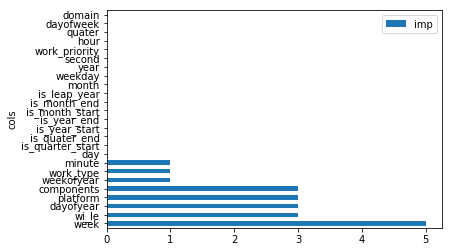

In [30]:
lfi=pd.DataFrame(data=x.columns,columns=['cols'])
lfi['imp']=t1.feature_importances_

lfi.sort_values(by='imp',ascending=False).plot(x='cols',y='imp',kind='barh',sort_columns='imp')

In [83]:
t1.feature_importances_

array([1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 5, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3])

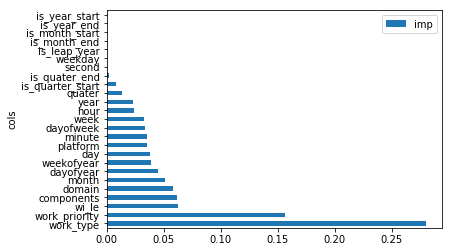

In [31]:
fi=pd.DataFrame(data=x.columns,columns=['cols'])
fi['imp']=m_test.feature_importances_

fi.sort_values(by='imp',ascending=False).plot(x='cols',y='imp',kind='barh',sort_columns='imp')

In [30]:
from sklearn.ensemble import RandomForestRegressor

def objective(space):
    #print(space)
    clf = lightgbm.LGBMRegressor(n_estimators =space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            min_samples_leaf = space['min_samples_leaf'],
                            min_samples_split = space['min_samples_split'],
                            max_features = space['max_features'],random_state=11,
                           n_jobs=-1,
                           min_impurity_decrease = space['min_impurity_decrease'],
                           bootstrap=True, oob_score=True,)

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y,
            eval_set=eval_set, eval_metric="rmse",
            #early_stopping_rounds=10,
            verbose=False)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={
        'max_depth':hp.uniform ('max_depth', 1, 100),
        'min_samples_split':hp.uniform ('min_samples_split', 1, 10),
        'min_samples_leaf':hp.uniform ('min_samples_leaf', 0, 1),
        'min_impurity_decrease':hp.uniform ('min_impurity_decrease', 0.1,1),
        'max_features':hp.choice('max_features',['auto', 'sqrt', 'log2','n_features']),
        'n_estimators':hp.choice('n_estimators',np.arange(1,500,dtype=int))
        #'n_estimators':hp.choice('n_estimators', np.arange(1,500,dtype=int)
}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1500,
            trials=trials)

print (best)

100%|███████████████████████████████████████████████| 1500/1500 [10:19<00:00,  2.55it/s, best loss: 2.1764511850640544]
{'max_depth': 2.0244521027610425, 'max_features': 2, 'min_impurity_decrease': 0.3926630533523807, 'min_samples_leaf': 0.5886361793919456, 'min_samples_split': 3.105172036526363, 'n_estimators': 6}


In [32]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(max_depth= 65.46325400582721, min_impurity_decrease= 0.1991328015974923, random_state=11,
                           n_jobs=-1,bootstrap=True, oob_score=True,
                         n_estimators= 1)

r.fit(x,y)
r.score(x,y)
print_score(r,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(r.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

#best loss: 4.58878002135408
r1=RandomForestRegressor(max_depth= 1.2871819952679822, min_impurity_decrease= 0.48639906878946765, random_state=11,
                           n_jobs=-1,bootstrap=True, oob_score=True, max_features= 'log2',
                        min_samples_split= 6,
                         n_estimators= 5)
r1.fit(x,y)
r1.score(x,y)
print_score(r1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(r1.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

#best loss: 4.58878002135408
r2=RandomForestRegressor(max_depth= 1.0221072330268068, min_impurity_decrease= 0.9533085778015424, random_state=11,
                           n_jobs=-1,bootstrap=True, oob_score=True, #max_features='none' ,
                        min_samples_split= 5,
                         n_estimators= 6)
r2.fit(x,y)
r2.score(x,y)
print_score(r2,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(r2.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[1.5511130592507434, 2.14564722019976, 0.07621125506478599, -3.932391840421859, -1.9610617722220285]
2.14564722019976


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[1.6138393519143304, 2.1785024755765696, -1.4645209909902592e-05, -4.084603002408712, -0.30635115435045535]
2.1785024755765696


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[1.6138277672355201, 2.1737450826764078, -2.883820311438967e-07, -4.062419835627718, -0.18108252138985037]
2.1737450826764078


In [110]:
?RandomForestRegressor

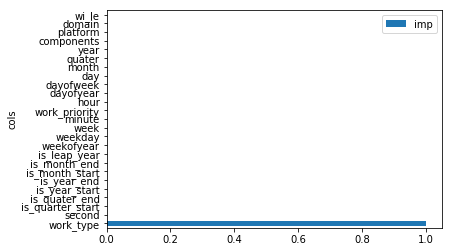

In [33]:
rfi=pd.DataFrame(data=x.columns,columns=['cols'])
rfi['imp']=r.feature_importances_

rfi.sort_values(by='imp',ascending=False).plot(x='cols',y='imp',kind='barh',sort_columns='imp')

In [35]:
from sklearn.ensemble import RandomForestRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from sklearn.model_selection import cross_val_score

def objective(space):
    #print(space)
    clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,n_estimators =space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            min_samples_leaf = space['min_samples_leaf'],
                            min_samples_split = space['min_samples_split'],
                            max_features = space['max_features'],random_state=11,
                           
                           min_impurity_decrease = space['min_impurity_decrease'],
                           oob_score=True,)

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={
    'max_depth': hp.choice('max_depth', range(1,100)),
    'max_features': hp.choice('max_features',["auto", "sqrt", "log2"]),
    'n_estimators': hp.choice('n_estimators',np.arange(1,500,dtype=int)),
    'min_samples_split':hp.choice ('min_samples_split', np.arange(2,500,dtype=int)),
    'min_samples_leaf':hp.choice ('min_samples_leaf',np.arange(1,10,dtype=int)),
    'min_impurity_decrease':hp.uniform ('min_impurity_decrease', 0.1,1),
    'criterion': hp.choice('criterion', ["mse"])}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1500,
            trials=trials)

print (best)




  1%|▍                                                | 12/1500 [00:07<12:53,  1.92it/s, best loss: 2.1588815852011796]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  3%|█▎                                               | 39/1500 [00:23<19:20,  1.26it/s, best loss: 2.1383041332699677]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  6%|██▊                                              | 87/1500 [00:55<13:53,  1.69it/s, best loss: 2.1382906913971396]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  8%|███▋                                            | 115/1500 [01:13<14:59,  1.54it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  8%|███▊                                            | 120/1500 [01:16<14:16,  1.61it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  8%|████                                            | 126/1500 [01:20<16:54,  1.35it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 10%|████▉                                           | 156/1500 [01:39<12:06,  1.85it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 11%|█████▏                                          | 161/1500 [01:41<11:21,  1.97it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 12%|█████▋                                          | 178/1500 [01:51<14:25,  1.53it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 13%|██████▎                                         | 199/1500 [02:02<10:03,  2.15it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 14%|██████▋                                         | 208/1500 [02:07<13:24,  1.61it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 15%|███████▏                                        | 225/1500 [02:18<15:18,  1.39it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 16%|███████▊                                        | 246/1500 [02:34<18:08,  1.15it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 20%|█████████▋                                      | 304/1500 [03:13<11:55,  1.67it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 24%|███████████▎                                    | 353/1500 [03:44<13:02,  1.47it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 27%|████████████▉                                   | 403/1500 [04:18<12:06,  1.51it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 27%|█████████████                                   | 407/1500 [04:21<13:30,  1.35it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 29%|█████████████▉                                  | 434/1500 [04:41<12:57,  1.37it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 32%|███████████████▍                                | 484/1500 [05:16<11:24,  1.49it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 34%|████████████████▍                               | 513/1500 [05:34<14:09,  1.16it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 38%|██████████████████▎                             | 574/1500 [06:16<11:05,  1.39it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 40%|███████████████████▎                            | 602/1500 [06:38<13:07,  1.14it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 40%|███████████████████▎                            | 604/1500 [06:39<09:13,  1.62it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 41%|███████████████████▍                            | 609/1500 [06:42<08:54,  1.67it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 43%|████████████████████▌                           | 642/1500 [07:06<11:45,  1.22it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 44%|█████████████████████                           | 657/1500 [07:14<06:31,  2.16it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 44%|█████████████████████▏                          | 664/1500 [07:19<10:06,  1.38it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 45%|█████████████████████▍                          | 669/1500 [07:21<08:55,  1.55it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 45%|█████████████████████▋                          | 678/1500 [07:27<07:55,  1.73it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 46%|█████████████████████▉                          | 685/1500 [07:30<06:17,  2.16it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 48%|███████████████████████▏                        | 723/1500 [07:55<07:55,  1.63it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 49%|███████████████████████▍                        | 731/1500 [07:59<06:09,  2.08it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 53%|█████████████████████████▋                      | 801/1500 [08:50<09:23,  1.24it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 57%|███████████████████████████▏                    | 849/1500 [09:22<05:15,  2.06it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 59%|████████████████████████████▏                   | 882/1500 [09:44<07:34,  1.36it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 63%|██████████████████████████████▎                 | 947/1500 [10:29<06:58,  1.32it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 64%|██████████████████████████████▌                 | 957/1500 [10:36<06:04,  1.49it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 64%|██████████████████████████████▉                 | 965/1500 [10:41<05:10,  1.73it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 67%|███████████████████████████████▎               | 1000/1500 [11:02<05:38,  1.48it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 69%|████████████████████████████████▍              | 1037/1500 [11:29<06:27,  1.20it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 73%|██████████████████████████████████▏            | 1091/1500 [12:09<05:46,  1.18it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 74%|██████████████████████████████████▌            | 1103/1500 [12:17<04:47,  1.38it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 74%|██████████████████████████████████▋            | 1106/1500 [12:19<04:03,  1.62it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 76%|███████████████████████████████████▊           | 1142/1500 [12:42<03:40,  1.62it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 78%|████████████████████████████████████▊          | 1175/1500 [13:02<03:46,  1.44it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 79%|█████████████████████████████████████▎         | 1189/1500 [13:12<03:49,  1.36it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 80%|█████████████████████████████████████▋         | 1202/1500 [13:21<03:52,  1.28it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 80%|█████████████████████████████████████▊         | 1206/1500 [13:23<02:55,  1.67it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 81%|█████████████████████████████████████▉         | 1209/1500 [13:26<03:34,  1.36it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 82%|██████████████████████████████████████▍        | 1226/1500 [13:36<03:14,  1.41it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 82%|██████████████████████████████████████▋        | 1233/1500 [13:41<03:10,  1.40it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 86%|████████████████████████████████████████▎      | 1287/1500 [14:19<03:02,  1.17it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 90%|██████████████████████████████████████████▎    | 1349/1500 [15:05<01:56,  1.30it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 91%|██████████████████████████████████████████▋    | 1361/1500 [15:13<01:35,  1.46it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 93%|███████████████████████████████████████████▍   | 1388/1500 [15:31<01:39,  1.13it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 93%|███████████████████████████████████████████▊   | 1398/1500 [15:38<01:17,  1.32it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 97%|█████████████████████████████████████████████▎ | 1448/1500 [16:13<00:34,  1.52it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 99%|██████████████████████████████████████████████▌| 1487/1500 [16:41<00:07,  1.66it/s, best loss: 2.1373998931340124]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



100%|███████████████████████████████████████████████| 1500/1500 [16:51<00:00,  1.67it/s, best loss: 2.1373998931340124]
{'criterion': 0, 'max_depth': 16, 'max_features': 0, 'min_impurity_decrease': 0.18362133865906843, 'min_samples_leaf': 4, 'min_samples_split': 359, 'n_estimators': 118}


In [34]:
from sklearn.ensemble import RandomForestRegressor
#best loss: 2.129540513131163

rf_base=RandomForestRegressor(criterion= "mse", max_depth= 47, max_features= "auto", min_impurity_decrease= 0.10078579050800998, 
       min_samples_leaf= 7, min_samples_split= 201, n_estimators= 6, n_jobs= -1,random_state=11)
rf_base.fit(x,y)
rf_base.score(x,y)
print_score(rf_base,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(rf_base.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) #2.129540513131163

#best loss: 2.13715133562261
rf1=RandomForestRegressor(criterion= "mse", max_depth= 47, max_features= "auto", min_impurity_decrease= 0.17943417734151224, 
       min_samples_leaf= 6, min_samples_split= 15, n_estimators= 126, n_jobs= -1,random_state=11)
rf1.fit(x,y)
rf1.score(x,y)
print_score(rf1,x,y,x_te,test.duration_lop1p)
print(rmse(test.duration_lop1p,np.clip(rf1.predict(test[cols]), y.min(), y.max()))) #2.129540513131163

#best loss: 2.1373998931340124
rf2=RandomForestRegressor(criterion= "mse", max_depth= 16, max_features= "auto", min_impurity_decrease= 0.18362133865906843, 
       min_samples_leaf= 4, min_samples_split= 359, n_estimators= 118, n_jobs= -1,random_state=11)
rf2.fit(x,y)
rf2.score(x,y)
print_score(rf2,x,y,x_te,test.duration_lop1p)
print(rmse(test.duration_lop1p,np.clip(rf2.predict(test[cols]), y.min(), y.max()))) #2.129540513131163

[1.5510905904619408, 2.139830166046694, 0.07623801812212794, -3.905683724745132]
2.139830166046694
[1.5517231860354805, 2.1373295233957617, 0.07548437174147593, -3.8942246900772117]
2.137329523395762
[1.553581826132145, 2.1375622581483635, 0.07326829230238541, -3.8952906166702945]
2.137562258148363


In [35]:
from sklearn.ensemble import ExtraTreesRegressor
#ExtraTreesRegressor

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from sklearn.model_selection import cross_val_score

def objective(space):
    #print(space)
    clf = ExtraTreesRegressor(bootstrap=True, n_jobs=-1,n_estimators =space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            min_samples_leaf = space['min_samples_leaf'],
                            min_samples_split = space['min_samples_split'],
                            max_features = space['max_features'],random_state=11,
                           
                           min_impurity_decrease = space['min_impurity_decrease'],
                           oob_score=True,)

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={
    'max_depth': hp.choice('max_depth', range(1,100)),
    'max_features': hp.choice('max_features',["auto", "sqrt", "log2"]),
    'n_estimators': hp.choice('n_estimators',np.arange(1,500,dtype=int)),
    'min_samples_split':hp.choice ('min_samples_split', np.arange(2,500,dtype=int)),
    'min_samples_leaf':hp.choice ('min_samples_leaf',np.arange(1,10,dtype=int)),
    'min_impurity_decrease':hp.uniform ('min_impurity_decrease', 0.1,1),
    'criterion': hp.choice('criterion', ["mse"])}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials)

print (best)




  0%|                                                  | 1/1000 [00:00<07:03,  2.36it/s, best loss: 2.1748688430840883]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  2%|█▎                                                 | 25/1000 [00:13<09:31,  1.71it/s, best loss: 2.16336299422083]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



  7%|███▋                                               | 73/1000 [00:41<08:58,  1.72it/s, best loss: 2.14265659109384]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 11%|█████▎                                          | 110/1000 [01:03<10:22,  1.43it/s, best loss: 2.1379146690104602]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 14%|██████▋                                          | 136/1000 [01:18<07:52,  1.83it/s, best loss: 2.137904625211631]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 14%|██████▉                                          | 142/1000 [01:21<07:29,  1.91it/s, best loss: 2.137904625211631]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 18%|████████▍                                       | 176/1000 [01:41<09:41,  1.42it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 20%|█████████▌                                      | 200/1000 [01:55<07:54,  1.69it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 24%|███████████▌                                    | 242/1000 [02:19<07:33,  1.67it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 26%|████████████▏                                   | 255/1000 [02:26<06:24,  1.94it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 30%|██████████████▍                                 | 302/1000 [02:52<05:30,  2.11it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 31%|██████████████▉                                 | 310/1000 [02:57<06:57,  1.65it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 33%|███████████████▉                                | 333/1000 [03:09<06:16,  1.77it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 34%|████████████████▌                               | 345/1000 [03:16<07:33,  1.44it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 36%|█████████████████▏                              | 357/1000 [03:23<05:16,  2.03it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 39%|██████████████████▌                             | 386/1000 [03:38<05:45,  1.78it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 39%|██████████████████▌                             | 388/1000 [03:39<05:58,  1.71it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 40%|███████████████████▎                            | 403/1000 [03:48<07:15,  1.37it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 48%|██████████████████████▊                         | 475/1000 [04:31<06:27,  1.35it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 53%|█████████████████████████▎                      | 527/1000 [05:04<05:40,  1.39it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 53%|█████████████████████████▋                      | 534/1000 [05:07<04:08,  1.87it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 55%|██████████████████████████▍                     | 551/1000 [05:17<03:59,  1.87it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 61%|█████████████████████████████▏                  | 609/1000 [05:48<03:58,  1.64it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 62%|█████████████████████████████▌                  | 615/1000 [05:51<03:01,  2.13it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 63%|██████████████████████████████▏                 | 629/1000 [05:59<03:05,  2.00it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 66%|███████████████████████████████▌                | 657/1000 [06:13<02:56,  1.95it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 66%|███████████████████████████████▊                | 662/1000 [06:16<03:09,  1.78it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 67%|████████████████████████████████                | 667/1000 [06:19<03:27,  1.60it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 69%|█████████████████████████████████               | 689/1000 [06:33<03:43,  1.39it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 69%|█████████████████████████████████               | 690/1000 [06:33<03:07,  1.65it/s, best loss: 2.1346822268595482]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 76%|█████████████████████████████████████▏           | 758/1000 [07:14<02:21,  1.71it/s, best loss: 2.134151545785265]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 80%|██████████████████████████████████████▍         | 801/1000 [07:38<01:38,  2.01it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 83%|███████████████████████████████████████▋        | 828/1000 [07:54<01:38,  1.74it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 84%|████████████████████████████████████████▏       | 836/1000 [07:57<01:17,  2.12it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 84%|████████████████████████████████████████▏       | 838/1000 [07:58<01:13,  2.19it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 84%|████████████████████████████████████████▌       | 844/1000 [08:02<01:25,  1.83it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 87%|█████████████████████████████████████████▉      | 873/1000 [08:17<01:03,  2.01it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 89%|██████████████████████████████████████████▌     | 887/1000 [08:25<01:07,  1.66it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 89%|██████████████████████████████████████████▌     | 888/1000 [08:25<00:56,  1.99it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 91%|███████████████████████████████████████████▌    | 908/1000 [08:37<00:54,  1.68it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



 94%|█████████████████████████████████████████████▎  | 943/1000 [08:56<00:36,  1.56it/s, best loss: 2.1341332150941144]

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "



100%|███████████████████████████████████████████████| 1000/1000 [09:28<00:00,  1.96it/s, best loss: 2.1341332150941144]
{'criterion': 0, 'max_depth': 94, 'max_features': 0, 'min_impurity_decrease': 0.10058132924843353, 'min_samples_leaf': 7, 'min_samples_split': 341, 'n_estimators': 57}


In [36]:
#best loss: 2.1449949733371407

et_base=RandomForestRegressor(criterion= "mse", max_depth= 17, max_features= "auto", min_impurity_decrease= 0.10067586116090317, 
       min_samples_leaf= 1, min_samples_split= 294, n_estimators= 5, n_jobs= -1,random_state=11)
et_base.fit(x,y)
et_base.score(x,y)
print_score(et_base,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(et_base.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) #2.1449949733371407

#best loss: 2.1341332150941144

et1=RandomForestRegressor(criterion= "mse", max_depth= 94, max_features= "auto", min_impurity_decrease= 0.10058132924843353, 
       min_samples_leaf= 7, min_samples_split= 341, n_estimators= 57, n_jobs= -1,random_state=11)
et1.fit(x,y)
et1.score(x,y)
print_score(et1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(et1.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) #2.1449949733371407

[1.5510794955762262, 2.144994973337141, 0.07625123333602635, -3.92939353940535]
2.144994973337141
[1.5510446998976308, 2.138618707863492, 0.0762926781552622, -3.9001306220058014]
2.138618707863492


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from sklearn.model_selection import cross_val_score

def objective(space):
    #print(space)
    clf = KNeighborsRegressor( n_jobs=-1,n_neighbors =space['n_neighbors'],
                            leaf_size = int(space['leaf_size']),
                            weights = space['weights'],
                            algorithm = space['algorithm'],
                            p = space['p'],)

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={
    'n_neighbors': hp.choice('n_neighbors', range(1,1000)),
    'weights': hp.choice('weights',["uniform", "distance"]),
    'algorithm': hp.choice('algorithm',["auto", "ball_tree", "kd_tree", "brute"]),
    'leaf_size':hp.choice ('leaf_size', np.arange(1,500,dtype=int)),
    'p':hp.choice ('p',[1,2])}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2000,
            trials=trials)

print (best)




100%|███████████████████████████████████████████████| 2000/2000 [13:13<00:00,  2.46it/s, best loss: 2.4112420921666624]
{'algorithm': 1, 'leaf_size': 421, 'n_neighbors': 996, 'p': 1, 'weights': 0}


In [37]:
from sklearn.neighbors import KNeighborsRegressor
#best loss: 2.409842302727636

knn_base=KNeighborsRegressor(n_neighbors= 982, weights= "uniform", algorithm= "auto", leaf_size= 196,p= 1, n_jobs= -1)
knn_base.fit(x,y)
knn_base.score(x,y)
print_score(knn_base,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(knn_base.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) #2.413015297944952

knn_new=KNeighborsRegressor(n_neighbors= 982, weights= "uniform", algorithm= "auto", leaf_size= 53, n_jobs= -1)
knn_new.fit(x,y)
knn_new.score(x,y)
print_score(knn_new,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(knn_new.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) 

knn=KNeighborsRegressor(n_neighbors= 996, weights= "uniform", algorithm= "auto", leaf_size= 421, n_jobs= -1,p=1)
knn.fit(x,y)
knn.score(x,y)
print_score(knn,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(knn.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

[1.5958802784949906, 2.4135512600161406, 0.022118176334266382, -5.240997203131597]
2.4135512600161406
[1.5960254352098537, 2.4115870534306127, 0.021940277565212107, -5.230843186655223]
2.4115870534306127
[1.5961829058396384, 2.4114410403229485, 0.02174726901412416, -5.23008869825007]
2.4114410403229485


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

def objective(space):
    #print(space)
    clf = DecisionTreeRegressor(#n_estimators =space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            min_samples_leaf = space['min_samples_leaf'],
                            min_samples_split = space['min_samples_split'],
                            max_features = space['max_features'],random_state=11,
                           presort=True,splitter = space['splitter'],
                           min_impurity_decrease = space['min_impurity_decrease'],
                           )

    eval_set  = [( x, y), ( x_te, test.duration_lop1p)]

    clf.fit(x, y)

    pred = clf.predict(x_te)
    mse_scr = mean_squared_error(test.duration_lop1p, pred)
    #print ("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':np.sqrt(mse_scr), 'status': STATUS_OK }


space ={
    'max_depth': hp.choice('max_depth', range(1,100)),
    'max_features': hp.choice('max_features',["auto", "sqrt", "log2"]),
    'splitter': hp.choice('splitter',["best", "random"]),
    #'n_estimators': hp.choice('n_estimators',np.arange(1,500,dtype=int)),
    'min_samples_split':hp.choice ('min_samples_split', np.arange(2,500,dtype=int)),
    'min_samples_leaf':hp.choice ('min_samples_leaf',range(1,100)),
    'min_impurity_decrease':hp.uniform ('min_impurity_decrease', 0.1,1),
    'criterion': hp.choice('criterion', ["mse"])}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5000,
            trials=trials)

print (best)

100%|███████████████████████████████████████████████| 5000/5000 [07:30<00:00,  8.29it/s, best loss: 2.1369874079884648]
{'criterion': 0, 'max_depth': 54, 'max_features': 1, 'min_impurity_decrease': 0.10183132687889442, 'min_samples_leaf': 39, 'min_samples_split': 477, 'splitter': 1}


In [39]:
from sklearn.tree import DecisionTreeRegressor
#best loss: 2.1232266668741815

dt_base=DecisionTreeRegressor(criterion= "mse", max_depth= 69, max_features= "log2", min_impurity_decrease= 0.10163085964584502, 
                            min_samples_leaf= 4, min_samples_split= 55, splitter= "random",presort=True)
dt_base.fit(x,y)
dt_base.score(x,y)
print_score(dt_base,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(dt_base.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) #2.413015297944952

dt_new=DecisionTreeRegressor(criterion= "mse", max_depth= 73, max_features= "sqrt", min_impurity_decrease= 0.10082404178869787, 
                            min_samples_leaf= 1, min_samples_split= 3, splitter= "random",presort=True)
dt_new.fit(x,y)
dt_new.score(x,y)
print_score(dt_new,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(dt_new.predict(test[cols]), y.min(), y.max()),test.duration_lop1p)) #2.413015297944952

dt=DecisionTreeRegressor(criterion= "mse", max_depth= 10, max_features= "sqrt", min_impurity_decrease= 0.10008182489364277, 
                            min_samples_leaf= 74, min_samples_split= 117, splitter= "random",presort=True)
dt.fit(x,y)
dt.score(x,y)
print_score(dt,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(dt.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

dt1=DecisionTreeRegressor(criterion= "mse", max_depth= 54, max_features= "auto", min_impurity_decrease= 0.10183132687889442, 
                            min_samples_leaf= 39, min_samples_split= 447, splitter= "random",presort=True)
dt1.fit(x,y)
dt1.score(x,y)
print_score(dt1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(dt1.predict(test[cols]), y.min(), y.max()),test.duration_lop1p))

[1.6138275345361015, 2.1729687722058704, 0.0, -4.058804593166207]
2.1729687722058704
[1.6138275345361015, 2.1729687722058704, 0.0, -4.058804593166207]
2.1729687722058704
[1.5510434382217715, 2.1385254544774193, 0.07629418090853768, -3.8997032958925457]
2.1385254544774193
[1.5510434382217695, 2.138525454477421, 0.07629418090853768, -3.8997032958925564]
2.138525454477421


In [41]:

p=pd.DataFrame()
p['lgbm_pred']=np.clip(t1.predict(x_te), y.min(), y.max())
p['xg_pred']=np.clip(m_test.predict(x_te),  y.min(), y.max())
#p['lgbm_pred1']=np.clip(r.predict(x_te),  y.min(), y.max())
#p['rf1']=np.clip(rf1.predict(x_te),  y.min(), y.max())
#p['et_base']=np.clip(et1.predict(x_te),  y.min(), y.max())
p['knn_base']=np.clip(knn.predict(x_te),  y.min(), y.max())
#p['dt_base']=np.clip(dt.predict(x_te),  y.min(), y.max())
#p['lgbm_pred']=t1.predict(x_te)
#p['xg_pred']=m_test.predict(x_te)
#p['lgbm_pred1']=r.predict(x_te)
#p['rf_base']=rf_base.predict(x_te)
ydata=np.array(test['duration_lop1p'])

#from scipy.optimize import curve_fit
#def func(x,  y, t):
     #return x*p.lgbm_pred+y*p.xg_pred+z*p.lgbm_pred1+t*p.rf_pred
    #return x*p.lgbm_pred+y*p.xg_pred+t*p.rf_pred

#popt, pcov = curve_fit(func, xdata, ydata)
#print(popt, pcov)

from scipy.optimize import lsq_linear
res = lsq_linear(p, ydata, bounds=(0, 1), lsmr_tol='auto', verbose=1)
res

The first-order optimality measure is less than `tol`.
Number of iterations 9, initial cost 4.8802e+02, final cost 9.6004e+01, first-order optimality 5.41e-13.


 active_mask: array([0, 0, 1])
        cost: 96.00418969744857
         fun: array([-8.99826137e-01, -1.54286200e+00, -1.71536619e+00, -1.24057526e+00,
       -1.02993464e+00, -1.16495469e+00, -1.75715653e+00, -1.27025044e+00,
       -1.23404358e+00, -9.88251104e-01, -9.62711883e-01, -1.67567300e+00,
       -1.39070418e+00, -1.30565773e+00, -9.21388399e-01, -1.02347189e+00,
       -1.16187433e+00, -6.28827059e-01, -1.37515463e+00, -1.48682929e+00,
       -1.48289125e+00, -1.91791271e+00, -1.42626957e+00, -1.33982280e+00,
       -1.39727655e+00, -9.57518597e-01, -9.20122995e-01, -8.52198437e-01,
       -9.44352427e-01, -1.26400897e+00, -1.38020515e+00, -6.74936666e-01,
       -9.95456694e-01, -4.42409320e-01, -5.61624644e-01, -6.34516972e-01,
       -6.64181714e-01, -8.02649064e-01, -6.72459488e-01, -8.85755369e-01,
       -7.73009364e-01, -5.93080452e-01, -3.35946613e-01, -6.13626511e-01,
       -1.15542075e+00, -6.09319092e-01, -8.23656434e-01, -1.08615118e+00,
       -6.21265107e-01,

In [42]:

#p['pred']= (0.62092695*p.lgbm_pred+0.4094173*p.xg_pred+0.75659268*p.lgbm_pred1) #use t2
p['test']=np.array(test['duration_lop1p'])
#p['diff']=p.test-p.pred
#rmse(p.pred,p.test) #with t2 :- 0.9140488227997242
#p[p['diff']<1]

#p['pred2']= (1.00000000e+00*p.lgbm_pred+6.64294133e-01*p.xg_pred+5.43242160e-25*p.rf_pred) #use original all
#rmse(p.pred2,p.test) #with original :- 0.7842942214982984 difference from t1 is little bit

#p['pred1']= (1.00000000e+00*p.lgbm_pred+6.64329042e-01*p.xg_pred+3.94831529e-24*p.rf_base) #use t1
#p['pred1']= (3.59377267e-01*p.lgbm_pred+4.82184318e-01*p.xg_pred +1.18169975e-19*p.rf1
           # +1.83347116e-19*p.et_base+1.00000000e+00*p.knn_base) #0.5855586787178918 with xgboost & without xgboost 0.723722464224821
#p['pred1']= (0.15263883*p.lgbm_pred+0.46558145*p.xg_pred#+1.31836025e-13*p.rf1+2.16971820e-13*p.et_base
             #+1*p.knn_base+0.24348561*p.dt_base) #0.5803672638556288 with all & 0.5803672638556127 without rf1,et_base
#p['pred1']= (2.99447346e-01*p.lgbm_pred+5.47467669e-01*p.xg_pred+
             #1.00000000e+00*p.knn_base+1.31349168e-18*p.dt_base)#0.5656375525564459 used for 1st submit

p['pred1']= (0.29772863*p.lgbm_pred+
             0.54630132*p.xg_pred#+3.88611943e-14*p.rf1+1.73446198e-13*p.et_base
             +1*p.knn_base)#+2.62674770e-13*p.dt_base)#0.5648202005549053
rmse(p.test,p.pred1) #0.5742445224034817

#p['diff']=p.test-p.pred1
#p[(p['diff']>1) ]
#p

0.5919292636759689

In [110]:
p.to_csv(path_or_buf=r'C:\Users\Abhishek\Downloads\p.csv',index=False)

In [45]:
#open_times[cols]

In [48]:
#for 2nd submission & optimising using keras linear model
#submit_df=open_times[cols]
open_times = df[pd.isnull(df.duration_in_days)]
open_times['lgbm_pred']=np.clip(t1.predict(open_times[cols]), y.min(), y.max())
open_times['xg_pred']=np.clip(m_test.predict(open_times[cols]),  y.min(), y.max())
open_times['knn_base']=np.clip(knn.predict(open_times[cols]),  y.min(), y.max())
#open_times['dt_base']=np.clip(dt_base.predict(open_times[cols]),  y.min(), y.max())
open_times['pred']= np.array(0.30142548*open_times.lgbm_pred+0.54510105*open_times.xg_pred+1*open_times.knn_base)
#cols_to_submit=['work_item','pred']
#submit_df=open_times[cols_to_submit]
c=['work_item','lgbm_pred','xg_pred','knn_base','pred']
p2=open_times[c]

p2.to_csv(path_or_buf=r'C:\Users\Abhishek\Downloads\open_times_submission2_for_keras.csv',index=False)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

In [34]:
full_train=df[~pd.isnull(df.duration_in_days)]
full_train

start  work_item  work_type  work_priority  domain  \
0     2015-01-02 14:39:00  WI_000001          0              2       0   
1     2015-01-02 15:04:00  WI_000002          1              3       1   
2     2015-01-02 15:28:00  WI_000003          1              3       1   
3     2015-01-02 15:33:00  WI_000004          1              3       1   
4     2015-01-02 16:32:00  WI_000005          1              2       2   
5     2015-01-02 16:56:00  WI_000006          1              2       2   
6     2015-01-03 14:33:00  WI_000007          1              2       0   
7     2015-01-04 20:57:00  WI_000008          1              2       2   
8     2015-01-04 21:28:00  WI_000009          1              2       3   
9     2015-01-05 08:56:00  WI_000010          1              2       2   
10    2015-01-05 09:34:00  WI_000011          0              2       2   
11    2015-01-05 10:52:00  WI_000012          1              2       2   
12    2015-01-05 11:08:00  WI_000013          1              1       4   
13    2015-01-05 11:10:00  WI_000014          0              1       3   
14    2015-01-05 11:29:00  WI_000015          1              2       2   
15    2015-01-05 11:38:00  WI_000016          1              3       2   
16    2015-01-05 12:05:00  WI_000017          0              3       2   
17    2015-01-05 12:18:00  WI_000018          0              3       2   
18    2015-01-05 12:21:00  WI_000019          0              3       2   
19    2015-01-05 12:30:00  WI_000020          0              3       2   
20    2015-01-05 12:39:00  WI_000021          0              3       2   
21    2015-01-05 12:42:00  WI_000022          1              3       2   
22    2015-01-05 12:44:00  WI_000023          1              2       1   
23    2015-01-05 12:47:00  WI_000024          1              2       1   
24    2015-01-05 12:53:00  WI_000025          1              3       1   
25    2015-01-05 13:06:00  WI_000026          1              2       1   
26    2015-01-05 15:17:00  WI_000027          1              2       2   
27    2015-01-05 15:26:00  WI_000028          1              3       2   
28    2015-01-05 15:33:00  WI_000029          0              3       2   
29    2015-01-05 15:44:00  WI_000030          0              2       5   
...                   ...        ...        ...            ...     ...   
11447 2018-03-22 11:08:00  WI_011448          1              2       4   
11448 2018-03-22 11:14:00  WI_011449          1              1       1   
11449 2018-03-22 11:42:00  WI_011450          1              2       0   
11450 2018-03-22 12:01:00  WI_011451          0              2       0   
11452 2018-03-22 13:58:00  WI_011453          2              1       5   
11459 2018-03-22 17:00:00  WI_011460          0              2       0   
11460 2018-03-23 09:19:00  WI_011461          1              2       4   
11461 2018-03-23 09:56:00  WI_011462          0              1       9   
11462 2018-03-23 10:21:00  WI_011463          1              2       4   
11464 2018-03-23 12:04:00  WI_011465          0              1       9   
11469 2018-03-23 17:34:00  WI_011470          0              1       9   
11473 2018-03-26 09:09:00  WI_011474          0              3       7   
11474 2018-03-26 09:35:00  WI_011475          1              4       4   
11477 2018-03-26 10:50:00  WI_011478          2              0       4   
11480 2018-03-26 11:31:00  WI_011481          2              1       4   
11481 2018-03-26 11:49:00  WI_011482          0              2       7   
11482 2018-03-26 11:52:00  WI_011483          2              0       2   
11488 2018-03-27 09:06:00  WI_011489          1              2       2   
11490 2018-03-27 10:15:00  WI_011491          0              2       5   
11491 2018-03-27 10:16:00  WI_011492          2              2       4   
11494 2018-03-27 10:58:00  WI_011495          1              2       2   
11495 2018-03-27 11:14:00  WI_011496          1              2       9   
11496 2018-03-27 11:30:0

In [36]:
full_train['duration_log1p']=np.log(full_train.duration_in_days+1)
cols=[ 'work_type', 'work_priority', 'domain',
       'platform', 'components', 'year', 'quater', 'month', 'day', 'dayofweek',
       'dayofyear', 'hour', 'minute', 'second', 'week', 'weekday',
       'weekofyear', 'is_leap_year', 'is_month_end', 'is_month_start',
       'is_year_end', 'is_year_start', 'is_quater_end', 'is_quarter_start',
       'wi_le']
x_ft=full_train[cols]
y_ft=full_train['duration_log1p']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
len(x_ft),len(y_ft)

(10522, 10522)

In [52]:
knn_ft=KNeighborsRegressor(n_neighbors= 996, weights= "uniform", algorithm= "auto", leaf_size= 421, n_jobs= -1,p=1)
knn_ft.fit(x_ft,y_ft)
knn_ft.score(x_ft,y_ft)
#print_score(knn,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(knn_ft.predict(x_ft), y_ft.min(), y_ft.max()),y_ft))

t1_ft=lightgbm.LGBMRegressor(bagging_fraction= 0.004469771275824031, bagging_freq= 14,
                          colsample_bytree= 0.20443962334898225, feature_fraction= 0.41652105503368325,
                          gamma= 0.2033798501862344,learning_rate= 0.14963613580321716, 
                          max_depth= 46, min_child= 4, min_gain_to_split= 0.881647918364827, 
                          n_estimators= 350, num_iterations= 27, num_leaves= 99, 
                          reg_alpha= 0.7266394398769693, reg_lambda= 0.7481405181403645, subsample= 0.6197010743760046)
t1_ft.fit(x_ft,y_ft)
t1_ft.score(x_ft,y_ft)
#print_score(t1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(t1_ft.predict(x_ft), y_ft.min(), y_ft.max()),y_ft))


m_test_ft=xgboost.XGBRegressor(colsample_bytree= 0.14585163163923548, gamma= 0.6279594032677607, learning_rate= 0.8656735127452687, 
                            max_depth= 1, min_child= 6.0, n_estimators= 66, reg_alpha= 0.8198384760871134,
                            reg_lambda= 0.20199923860297095, subsample= 0.15488818995177778,
                            booster='dart',grow_policy='depthwise',num_round=14)
m_test_ft.fit(x_ft,y_ft)
m_test_ft.score(x_ft,y_ft)
#print_score(m_test,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(m_test_ft.predict(x_ft), y_ft.min(), y_ft.max()),y_ft))

et1_ft=RandomForestRegressor(criterion= "mse", max_depth= 94, max_features= "auto", min_impurity_decrease= 0.10058132924843353, 
       min_samples_leaf= 7, min_samples_split= 341, n_estimators= 57, n_jobs= -1,random_state=11)
et1_ft.fit(x_ft,y_ft)
et1_ft.score(x_ft,y_ft)
#print_score(et1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(et1_ft.predict(x_ft), y_ft.min(), y_ft.max()),y_ft))

rf1_ft=RandomForestRegressor(criterion= "mse", max_depth= 47, max_features= "auto", min_impurity_decrease= 0.17943417734151224, 
       min_samples_leaf= 6, min_samples_split= 15, n_estimators= 126, n_jobs= -1,random_state=11)
rf1_ft.fit(x_ft,y_ft)
rf1_ft.score(x_ft,y_ft)
#print_score(rf1,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(rf1_ft.predict(x_ft), y_ft.min(), y_ft.max()),y_ft))

dt_ft=DecisionTreeRegressor(criterion= "mse", max_depth= 10, max_features= "sqrt", min_impurity_decrease= 0.10008182489364277, 
                            min_samples_leaf= 74, min_samples_split= 117, splitter= "random",presort=True)
dt_ft.fit(x_ft,y_ft)
dt_ft.score(x_ft,y_ft)
#print_score(dt,x,y,x_te,test.duration_lop1p)
print(rmse(np.clip(dt_ft.predict(x_ft), y_ft.min(), y_ft.max()),y_ft))

1.6264215370431225


D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.625894756123558
1.5082199849914972
1.5797379512720984
1.5807266851979973
1.6404363478780393


In [58]:
ft=pd.DataFrame()
#ft['lgbm_pred']=np.clip(t1_ft.predict(x_ft), y_ft.min(), y_ft.max())
ft['xg_pred']=np.clip(m_test_ft.predict(x_ft),  y_ft.min(), y_ft.max())
#ft['knn_base']=np.clip(knn_ft.predict(x_ft),  y_ft.min(), y_ft.max())
#ft['rf1']=np.clip(rf1.predict(x_ft),  y_ft.min(), y_ft.max())
ft['et_base']=np.clip(et1_ft.predict(x_ft),  y_ft.min(), y_ft.max())
#ft['dt_base']=np.clip(dt_ft.predict(x_ft),  y_ft.min(), y_ft.max())
y_ft=np.array(y_ft)

from scipy.optimize import lsq_linear
res = lsq_linear(ft, y_ft, bounds=(0, 1), lsmr_tol='auto', verbose=1)
res



The unconstrained solution is optimal.
Final cost 1.1894e+04, first-order optimality 2.68e-10


 active_mask: array([0., 0.])
        cost: 11893.864565339665
         fun: array([ 0.03063615, -0.04773924, -1.52252732, ...,  1.18675145,
        1.54140269,  1.5137562 ])
     message: 'The unconstrained solution is optimal.'
         nit: 0
  optimality: 2.6786395324052137e-10
      status: 3
     success: True
           x: array([0.80415083, 0.1943926 ])

In [59]:
#ft['pred1']= (7.00644108e-14*ft.lgbm_pred+8.04150833e-01*ft.xg_pred+7.13833963e-19*ft.rf1+1.94392598e-01*ft.et_base
            # +1.00638019e-17*ft.knn_base+2.40546179e-18*ft.dt_base)#0.5648202005549053

ft['pred1']= 0.80415083*ft.xg_pred+0.1943926*ft.et_base
rmse(ft.pred1,y_ft) 

1.5035827810593339

In [60]:
ft['y']=y_ft
ft

xg_pred   et_base     pred1         y
0      3.238851  3.493937  3.283720  3.253084
1      2.488181  2.568354  2.500142  2.547881
2      2.488181  2.568354  2.500142  4.022670
3      2.383324  2.568354  2.415821  3.285787
4      2.023234  2.568354  2.126254  3.521939
5      1.949381  2.568354  2.066866  3.521348
6      1.712183  2.568354  1.876123  2.823163
7      2.213837  2.568354  2.279528  2.251292
8      2.602092  2.568354  2.591744  1.004302
9      1.310562  2.568354  1.553158  3.950667
10     2.303625  3.493937  2.531657  2.193886
11     1.666525  2.568354  1.839406  2.188296
12     1.531814  2.568354  1.731079  0.652325
13     2.523926  3.493937  2.708812  6.233116
14     1.740377  2.568354  1.898795  2.186051
15     2.275280  2.568354  2.328938  2.184927
16     2.996813  3.493937  3.089085  2.095561
17     2.996813  3.493937  3.089085  2.181547
18     2.996813  3.493937  3.089085  2.093098
19     2.891956  3.493937  3.004764  4.531093
20     3.059999  3.493937  3.139897  2.180417
21     2.221972  2.568354  2.286069  2.179287
22     1.848341  2.568354  1.985614  3.171784
23     1.848341  2.568354  1.985614  3.171784
24     1.973306  2.568354  2.086105  2.776332
25     1.785155  2.568354  1.934803  3.171365
26     1.991068  2.568354  2.100388  2.167910
27     2.357929  2.568354  2.395399  2.166765
28     3.091100  3.493937  3.164906  2.165619
29     3.528838  3.493937  3.516913  6.322386
...         ...       ...       ...       ...
10492  1.910297  2.568354  2.035436  1.593309
10493  1.565917  2.568354  1.758503  0.173953
10494  1.763937  2.568354  1.917741  2.073172
10495  2.478701  3.493937  2.672445  0.000000
10496  2.232939  2.568354  2.294889  0.582216
10497  2.677844  3.493937  2.832586  0.000000
10498  1.425971  2.568354  1.645965  0.139762
10499  2.174090  3.493937  2.427492  0.000000
10500  1.908401  2.568354  2.033911  1.371181
10501  2.574270  3.493937  2.749297  0.019803
10502  2.668556  3.493937  2.825117  1.286474
10503  2.502362  3.493937  2.691472  0.678034
10504  1.544183  2.568354  1.741025  0.717840
10505  1.399038  2.568354  1.624307  0.774727
10506  1.796069  2.568354  1.943580  0.667829
10507  2.582329  3.493937  2.755777  0.641854
10508  1.423541  2.568354  1.644011  1.619388
10509  1.288949  2.568354  1.535779  0.076961
10510  2.821996  3.493937  2.948506  0.165514
10511  2.269809  2.568354  2.324538  1.095273
10512  1.385020  2.568354  1.613034  0.009950
10513  2.021411  2.568354  2.124788  1.078410
10514  2.506446  3.493937  2.694756  1.085189
10515  1.719966  2.568354  1.882381  0.009950
10516  2.652281  3.493937  2.812029  0.048790
10517  2.123449  2.568354  2.206843  0.039221
10518  1.415118  2.568354  1.637238  1.101940
10519  1.091963  2.568354  1.377372  0.190620
10520  1.447926  2.568354  1.663620  0.122218
10521  1.286189  2.568354  1.533559  0.019803

[10522 rows x 4 columns]

In [106]:
open_times

start  work_item  work_type  work_priority  domain  \
164   2015-01-21 13:04:00  WI_000165          1              3       7   
195   2015-01-23 15:11:00  WI_000196          0              1       6   
263   2015-01-30 17:00:00  WI_000264          2              2       7   
272   2015-02-02 19:58:00  WI_000273          2              1       6   
277   2015-02-03 10:29:00  WI_000278          0              2       6   
297   2015-02-03 17:29:00  WI_000298          0              3       6   
395   2015-02-13 10:24:00  WI_000396          0              2       6   
468   2015-02-23 14:12:00  WI_000469          0              1       6   
491   2015-02-25 18:00:00  WI_000492          0              2       6   
501   2015-02-26 15:29:00  WI_000502          2              2       3   
511   2015-02-27 11:33:00  WI_000512          0              2       6   
582   2015-03-10 16:41:00  WI_000583          0              2       3   
613   2015-03-13 13:51:00  WI_000614          0              2       3   
640   2015-03-17 13:58:00  WI_000641          1              1       2   
770   2015-03-31 15:35:00  WI_000771          0              2       3   
824   2015-04-03 17:08:00  WI_000825          0              2       3   
846   2015-04-08 08:57:00  WI_000847          2              2       3   
870   2015-04-09 13:41:00  WI_000871          0              2       6   
871   2015-04-09 13:53:00  WI_000872          0              2       6   
872   2015-04-09 14:04:00  WI_000873          0              2       6   
890   2015-04-10 18:05:00  WI_000891          1              2       4   
930   2015-04-17 18:06:00  WI_000931          0              1       6   
962   2015-04-22 16:44:00  WI_000963          0              4       5   
1017  2015-04-30 14:54:00  WI_001018          0              2       6   
1021  2015-04-30 18:21:00  WI_001022          0              2       6   
1030  2015-05-04 11:27:00  WI_001031          0              2       3   
1036  2015-05-04 17:42:00  WI_001037          1              2       7   
1042  2015-05-05 17:40:00  WI_001043          0              2       3   
1067  2015-05-08 11:01:00  WI_001068          0              2       3   
1080  2015-05-11 16:15:00  WI_001081          1              2       7   
...                   ...        ...        ...            ...     ...   
11533 2018-03-29 11:18:00  WI_011534          1              2       0   
11534 2018-03-29 11:21:00  WI_011535          1              2       0   
11535 2018-03-29 14:48:00  WI_011536          1              2       0   
11536 2018-03-29 15:10:00  WI_011537          2              1       1   
11537 2018-03-29 15:15:00  WI_011538          2              1       1   
11538 2018-03-29 15:59:00  WI_011539          0              2       2   
11539 2018-03-29 16:28:00  WI_011540          2              1       1   
11540 2018-03-29 17:04:00  WI_011541          0              2       1   
11541 2018-03-29 20:11:00  WI_011542          0              3       7   
11542 2018-03-30 08:22:00  WI_011543          0              2       0   
11544 2018-03-30 08:59:00  WI_011545          1              2       7   
11545 2018-03-30 10:46:00  WI_011546          2              2       5   
11546 2018-03-30 11:18:00  WI_011547          2              2       3   
11547 2018-03-30 11:37:00  WI_011548          0              1       3   
11548 2018-03-30 12:03:00  WI_011549          0              1       8   
11549 2018-03-30 13:18:00  WI_011550          2              2       4   
11550 2018-03-30 13:33:00  WI_011551          2              2       3   
11551 2018-03-30 14:59:00  WI_011552          0              4       2   
11552 2018-03-30 15:18:00  WI_011553          1              3       7   
11553 2018-03-30 15:20:00  WI_011554          2              0       5   
11554 2018-03-30 15:29:00  WI_011555          0              0       5   
11555 2018-03-30 15:30:00  WI_011556          0              2       1   
11556 2018-03-30 15:31:0

In [55]:
#submit_df=open_times[cols]
open_times['lgbm_pred']=np.clip(t1.predict(open_times[cols]), y.min(), y.max())
open_times['xg_pred']=np.clip(m_test.predict(open_times[cols]),  y.min(), y.max())
open_times['knn_base']=np.clip(knn_new.predict(open_times[cols]),  y.min(), y.max())
open_times['dt_base']=np.clip(dt_base.predict(open_times[cols]),  y.min(), y.max())
open_times['pred']= (2.99447346e-01*open_times.lgbm_pred+5.47467669e-01*open_times.xg_pred+
             1.00000000e+00*open_times.knn_base+1.31349168e-18*open_times.dt_base)
cols_to_submit=['work_item','pred']
submit_df=open_times[cols_to_submit]
submit_df.to_csv(path_or_buf=r'C:\Users\Abhishek\Downloads\sub_base_line.csv',index=False)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [19]:
def split_times(times, sep_date_str):
    """
    Splits the times DataFrame into three different DataFrames
    - train: closed before the sep_date
    - test:  closed after the sep_date and started before the sep_date
    - closed: tickets that are closed
    - open:  tickets that arent't closed yet
    :param times: DataFrames containing the start and end times for each work items.
    :param sep_date_str: Separation date as string in the format DD.MM.YYYY
    :return: A tuple of (train, test, open) as defined above
    """
    open_times = times[pd.isnull(times.duration)]
    closed_times = times[~pd.isnull(times.duration)]
    sep_date = dt.datetime.strptime(sep_date_str, '%d.%m.%Y')
    train_times = closed_times[closed_times.end <= sep_date]
    test_times = closed_times[(closed_times.end > sep_date) & (closed_times.start <= sep_date)]
    return train_times, test_times, closed_times, open_times


In [23]:
df1[df1.work_item=='WI_000264']

work_item             start  end duration  duration_in_days
263  WI_000264  30-01-2015 17:00  NaN      NaT               NaN

In [24]:
print(min(times_closed.end))
print(max(times_closed.end))

01-02-2016 09:32
31-10-2017 16:37


In [25]:
df1.dtypes

work_item                    object
start                        object
end                          object
duration            timedelta64[ns]
duration_in_days            float64
dtype: object

In [27]:
times_closed.dtypes

work_item                    object
start                        object
end                          object
duration            timedelta64[ns]
duration_in_days            float64
dtype: object

In [28]:
train.head(5)

work_item             start               end         duration  \
0  WI_000001  02-01-2015 14:39  27-01-2015 11:36 24 days 20:57:00   
1  WI_000002  02-01-2015 15:04  14-01-2015 09:46 11 days 18:42:00   
2  WI_000003  02-01-2015 15:28  26-02-2015 11:50 54 days 20:22:00   
3  WI_000004  02-01-2015 15:33  28-01-2015 09:11 25 days 17:38:00   
4  WI_000005  02-01-2015 16:32  04-02-2015 12:57 32 days 20:25:00   

   duration_in_days  
0             24.87  
1             11.78  
2             54.85  
3             25.73  
4             32.85

In [29]:
train[train.duration=='NaT']

Empty DataFrame
Columns: [work_item, start, end, duration, duration_in_days]
Index: []

In [31]:
test.head(5)

work_item             start               end           duration  \
196   WI_000197  23-01-2015 15:45  09-02-2018 13:54 1112 days 22:09:00   
435   WI_000436  18-02-2015 13:11  01-02-2018 16:53 1079 days 03:42:00   
518   WI_000519  02-03-2015 15:32  09-01-2018 11:37 1043 days 20:05:00   
910   WI_000911  14-04-2015 17:36  12-02-2018 07:21 1034 days 13:45:00   
1121  WI_001122  19-05-2015 10:23  16-03-2018 14:47 1032 days 04:24:00   

      duration_in_days  
196            1112.92  
435            1079.15  
518            1043.84  
910            1034.57  
1121           1032.18

In [32]:
print(len(train),len(test))

9290 548


In [33]:
data[data.work_item=='WI_000197']

timestamp  work_item work_type work_priority    domain  \
762   2015-01-23 15:45:00  WI_000197  WT_00001      WP_00004  BD_00002   
1150  2015-02-02 15:36:00  WI_000197  WT_00001      WP_00004  BD_00002   
67991 2018-09-02 13:54:00  WI_000197  WT_00001      WP_00004  BD_00002   

       platform         components from_phase to_phase from_resource  \
762    PL_00002  CO_00037/CO_00071      Start  Analyze           NaN   
1150   PL_00002  CO_00037/CO_00071    Analyze   Design      ER_00061   
67991  PL_00002  CO_00037/CO_00071     Design      End      ER_00239   

      to_resource  
762      ER_00061  
1150     ER_00239  
67991         NaN

In [34]:
cols=['work_item','work_priority','work_type','domain','platform','components']
data.groupby(cols)['work_priority'].count()

work_item  work_type  domain    platform  components       
WI_000002  WT_00002   BD_00002  PL_00002  CO_00037/CO_00071     4
WI_000003  WT_00002   BD_00002  PL_00002  CO_00037/CO_00071     8
WI_000004  WT_00002   BD_00002  PL_00002  CO_00037/CO_00071     8
WI_000005  WT_00002   BD_00003  PL_00003  CO_00113              8
WI_000006  WT_00002   BD_00003  PL_00003  CO_00113              8
WI_000008  WT_00002   BD_00003  PL_00003  CO_00113              8
WI_000010  WT_00002   BD_00003  PL_00003  CO_00113              6
WI_000011  WT_00001   BD_00003  PL_00003  CO_00113              8
WI_000012  WT_00002   BD_00003  PL_00003  CO_00113              8
WI_000013  WT_00002   BD_00005  PL_00005  CO_00141              2
WI_000015  WT_00002   BD_00003  PL_00003  CO_00113              8
WI_000016  WT_00002   BD_00003  PL_00003  CO_00113              8
WI_000017  WT_00001   BD_00003  PL_00003  CO_00113             12
WI_000018  WT_00001   BD_00003  PL_00003  CO_00113              8
WI_000019  WT_00

In [45]:
#temp=col_encoder(t1)

In [70]:
wi_le=le.fit(data.work_item)

In [71]:
x.work_item=wi_le.transform(x.work_item)

In [72]:
x.head(5)

work_item  s_year  s_month  s_day  s_dayofweek  s_dayofyear  s_hour  \
0          0    2015        1      2            4            2      14   
1          1    2015        1      2            4            2      15   
2          2    2015        1      2            4            2      15   
3          3    2015        1      2            4            2      15   
4          4    2015        1      2            4            2      16   

   s_minute  s_second  s_week         ...          e_hour  e_minute  e_second  \
0        39         0       1         ...              11        36         0   
1         4         0       1         ...               9        46         0   
2        28         0       1         ...              11        50         0   
3        33         0       1         ...               9        11         0   
4        32         0       1         ...              12        57         0   

   e_week  e_weekday  e_weekofyear  s_is_leap_year_cat  s_is_month_end_cat  \
0       5          1             5                   0                   0   
1       3          2             3                   0                   0   
2       9          3             9                   0                   0   
3       5          2             5                   0                   0   
4       6          2             6                   0                   0   

   e_is_leap_year_cat  e_is_month_end_cat  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 27 columns]

In [73]:
base_model.fit(x,y)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [74]:
base_model.score(x,y)

0.7833819423352095

In [81]:
from hyperopt import hp

In [96]:
cols=['work_item','work_priority','work_type','domain','platform','components']
some_test=pd.DataFrame(data.groupby(cols)['work_priority'].count())

In [106]:
t=some_test.unstack(level=0)

In [117]:
data_test = pd.merge(train, data[cols], on='work_item', how='inner')

In [168]:
components=list(components)

In [176]:
data.components = data.components.str.replace('/','-')